# Problem 1:
You are an analyst in the IJK shoe company and you are expected to forecast the sales of the pairs of shoes for the upcoming 12 months from where the data ends. The data for the pair of shoe sales have been given to you from January 1980 to July 1995.
# Problem 2:
You are an analyst in the RST soft drink company and you are expected to forecast the sales of the production of the soft drink for the upcoming 12 months from where the data ends. The data for the production of soft drinks has been given to you from January 1980 to July 1995.


# Q1) Read the data as an appropriate Time Series data and plot the data.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

In [3]:
df1=pd.read_csv("Shoe-Sales.csv")
df1.head()

YearMonth  Shoe_Sales
0   1980-01          85
1   1980-02          89
2   1980-03         109
3   1980-04          95
4   1980-05          91

In [4]:
df2=pd.read_csv('SoftDrink.csv')
df2.head()

YearMonth  SoftDrinkProduction
0   1980-01                 1954
1   1980-02                 2302
2   1980-03                 3054
3   1980-04                 2414
4   1980-05                 2226

In [5]:
df1.dtypes

YearMonth     object
Shoe_Sales     int64
dtype: object

In [6]:
df2.dtypes

YearMonth              object
SoftDrinkProduction     int64
dtype: object

In [7]:
df_shoe_sales = pd.read_csv("Shoe-Sales.csv",parse_dates = ['YearMonth'],index_col = 'YearMonth')
df_shoe_sales.head()

Shoe_Sales
YearMonth             
1980-01-01          85
1980-02-01          89
1980-03-01         109
1980-04-01          95
1980-05-01          91

In [8]:
df_softdrink = pd.read_csv("SoftDrink.csv",parse_dates=True,index_col=0)
df_softdrink.head()

SoftDrinkProduction
YearMonth                      
1980-01-01                 1954
1980-02-01                 2302
1980-03-01                 3054
1980-04-01                 2414
1980-05-01                 2226

In [9]:
print(df_shoe_sales.shape)
print(df_softdrink.shape)

(187, 1)
(187, 1)


In [10]:
df_softdrink.dtypes

SoftDrinkProduction    int64
dtype: object

In [11]:
df_shoe_sales.dtypes

Shoe_Sales    int64
dtype: object

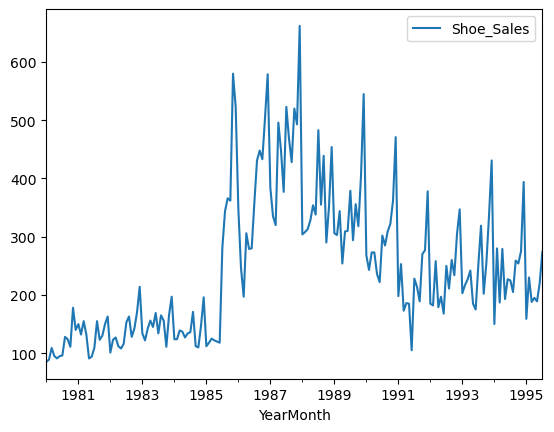

In [12]:
df_shoe_sales.plot()
plt.show()

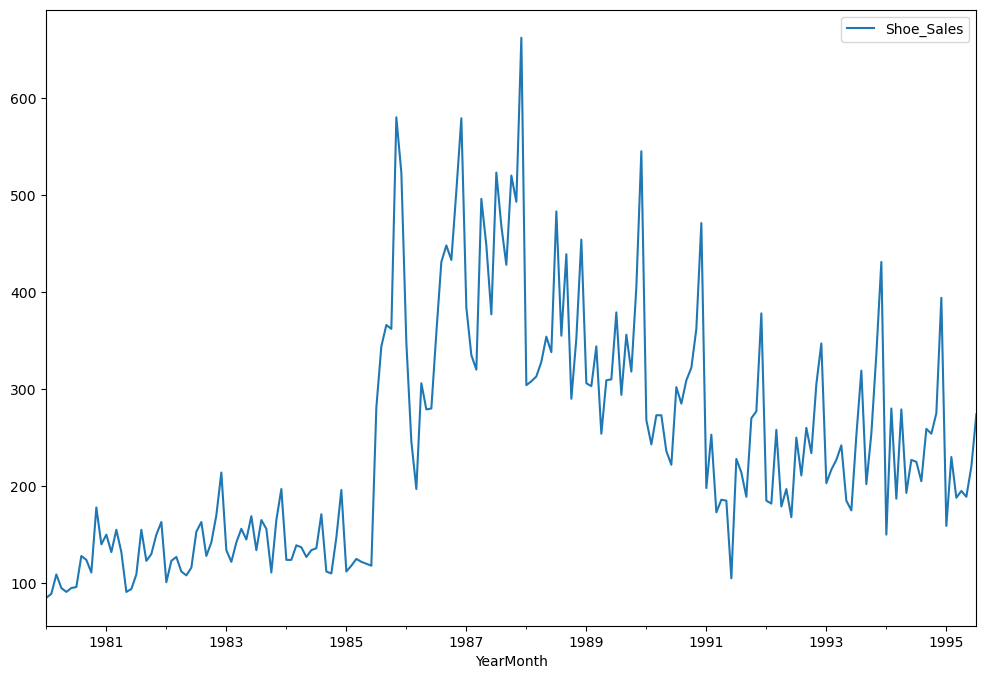

In [13]:
#Increase the figure size
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
df_shoe_sales.plot()
plt.show()

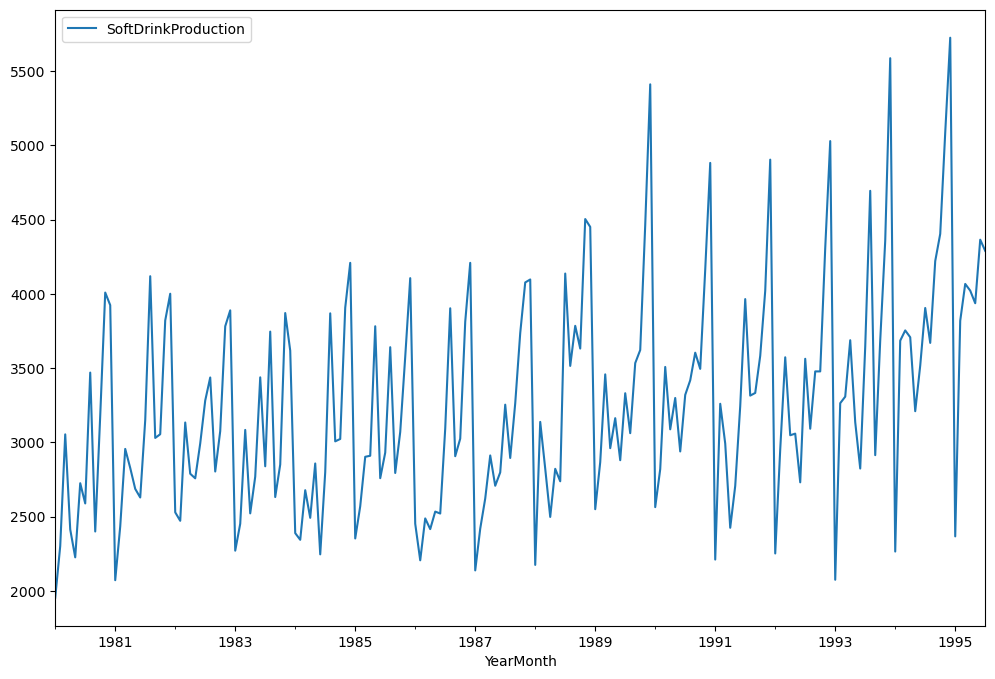

In [14]:
df_softdrink.plot()
plt.show()

# Q2) Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

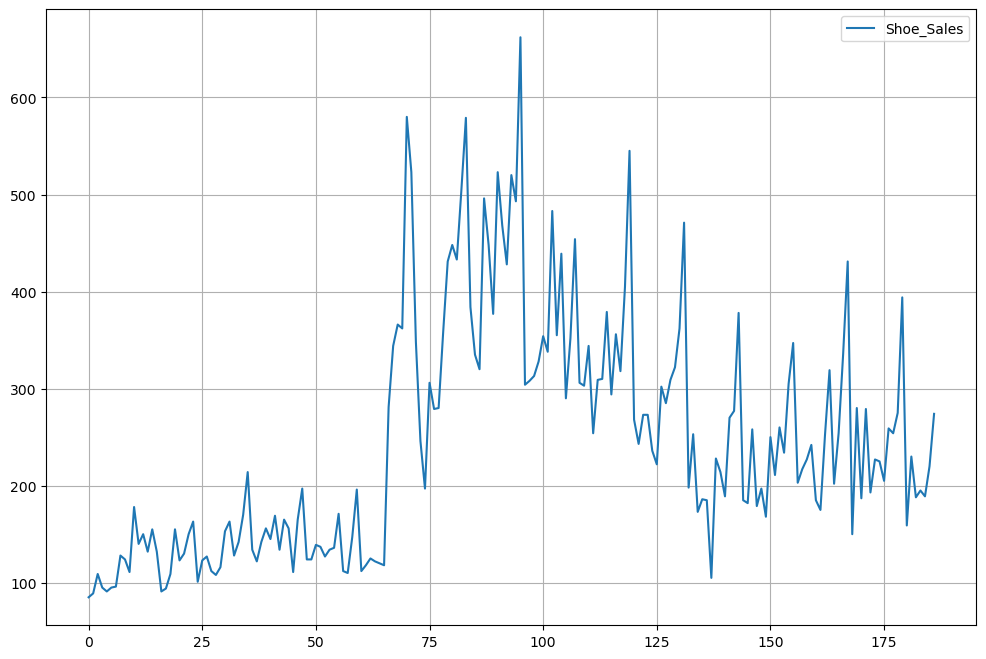

In [16]:
df1.plot();
plt.grid()

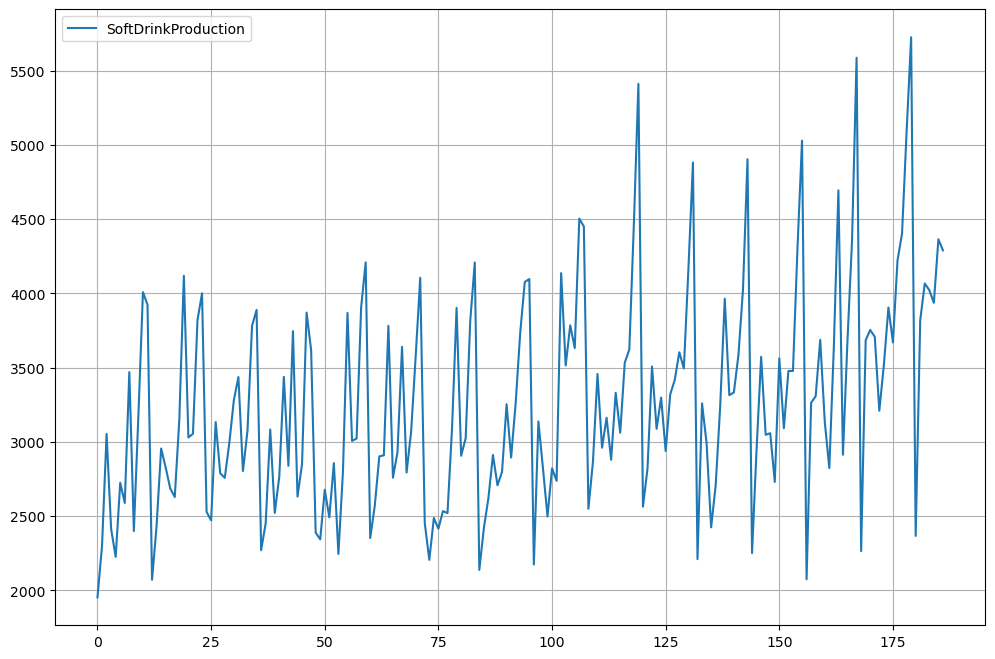

In [17]:
df2.plot()
plt.grid()

In [18]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')

In [19]:
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [20]:
df1['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df1.head()

YearMonth  Shoe_Sales Time_Stamp
0   1980-01          85 1980-01-31
1   1980-02          89 1980-02-29
2   1980-03         109 1980-03-31
3   1980-04          95 1980-04-30
4   1980-05          91 1980-05-31

In [21]:
df2['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df2.head()

YearMonth  SoftDrinkProduction Time_Stamp
0   1980-01                 1954 1980-01-31
1   1980-02                 2302 1980-02-29
2   1980-03                 3054 1980-03-31
3   1980-04                 2414 1980-04-30
4   1980-05                 2226 1980-05-31

In [23]:
df1.dtypes

YearMonth             object
Shoe_Sales             int64
Time_Stamp    datetime64[ns]
dtype: object

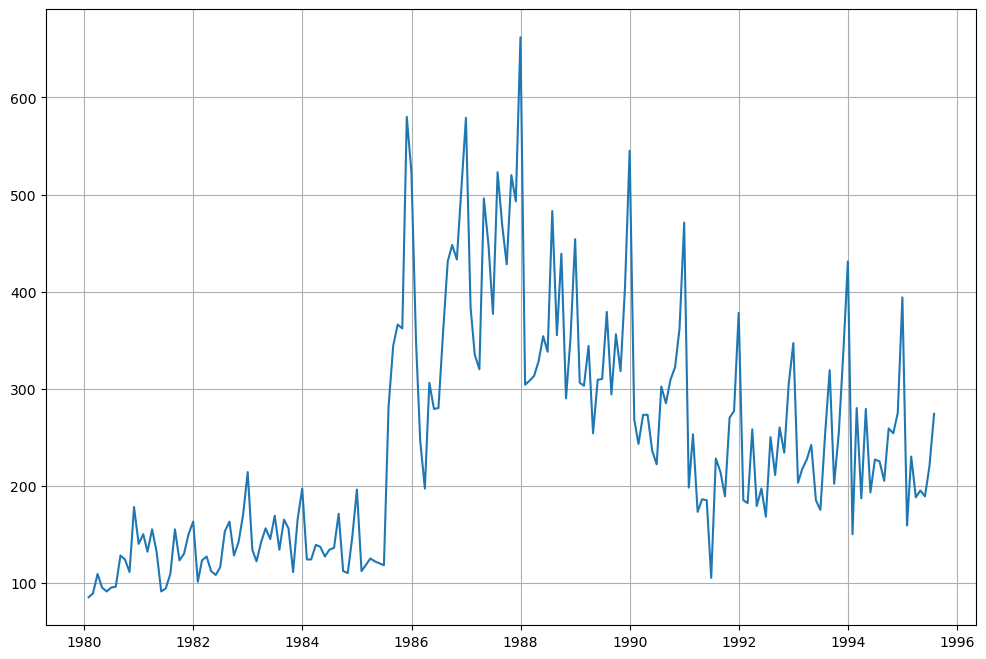

In [24]:
plt.plot(df1['Time_Stamp'],df1['Shoe_Sales']);
plt.grid()

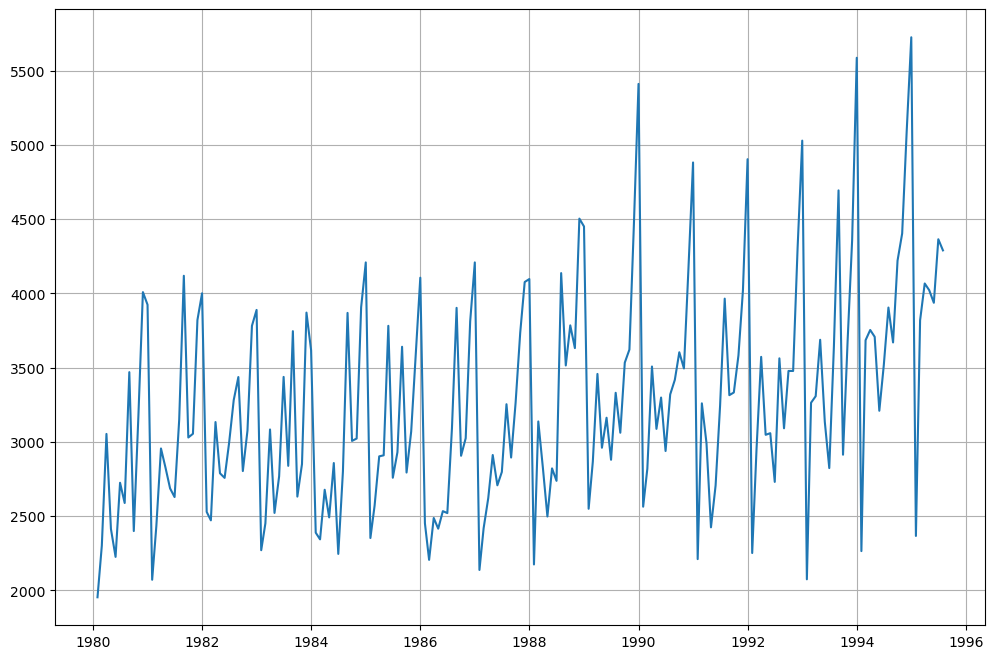

In [25]:
plt.plot(df2['Time_Stamp'],df2['SoftDrinkProduction']);
plt.grid()

Find the mean and median of the monthly Shoe Sales and SoftDrinkProduction

In [26]:
df_shoe_sales.describe()

Shoe_Sales
count  187.000000
mean   245.636364
std    121.390804
min     85.000000
25%    143.500000
50%    220.000000
75%    315.500000
max    662.000000

In [27]:
df_softdrink.describe()

SoftDrinkProduction
count           187.000000
mean           3262.609626
std             728.357367
min            1954.000000
25%            2748.000000
50%            3134.000000
75%            3741.000000
max            5725.000000

Plot a year on year boxplot

C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


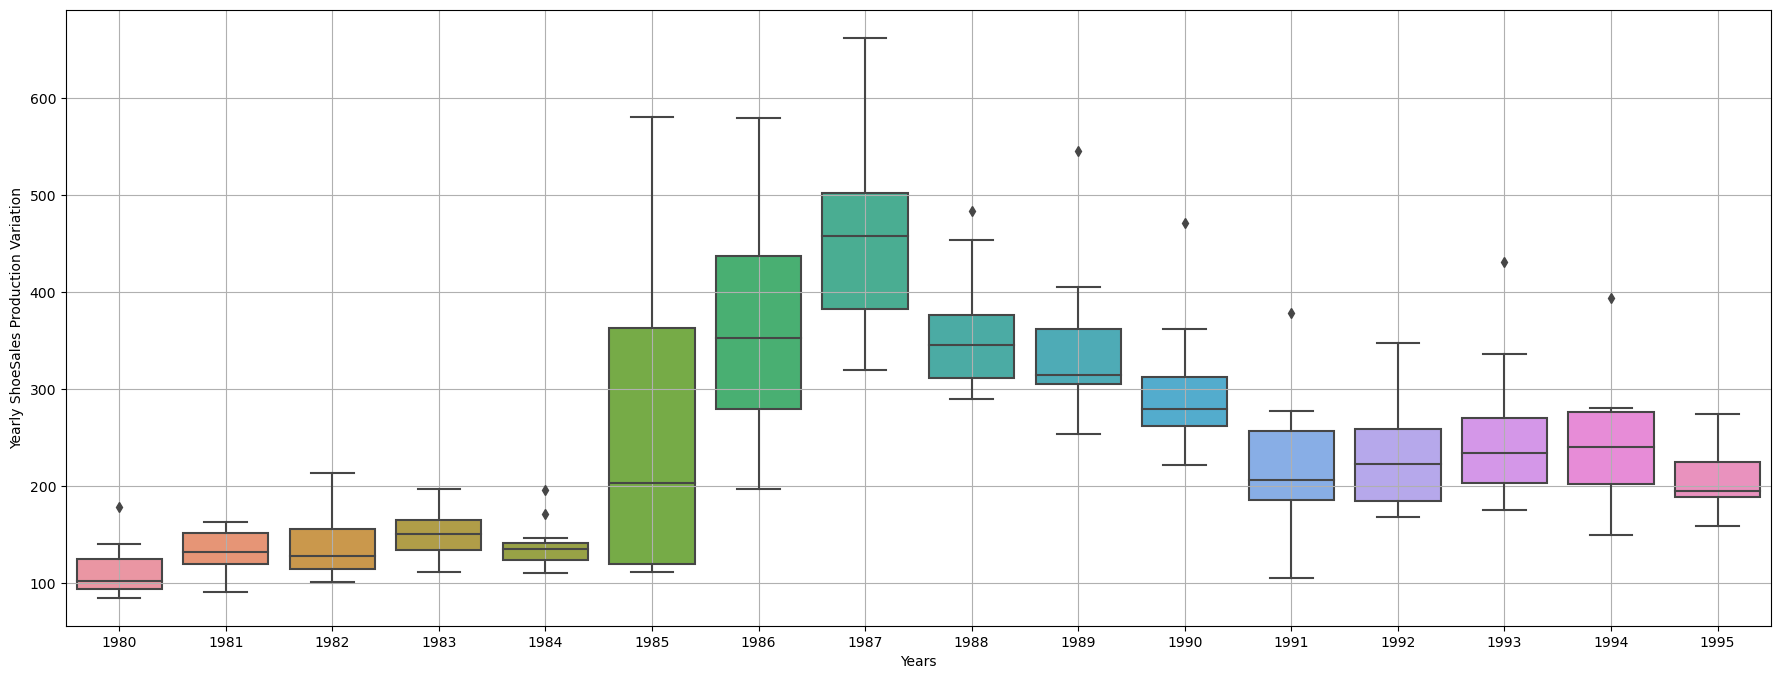

In [28]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_shoe_sales.index.year, df_shoe_sales['Shoe_Sales'],ax=ax, whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly ShoeSales Production Variation');

C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


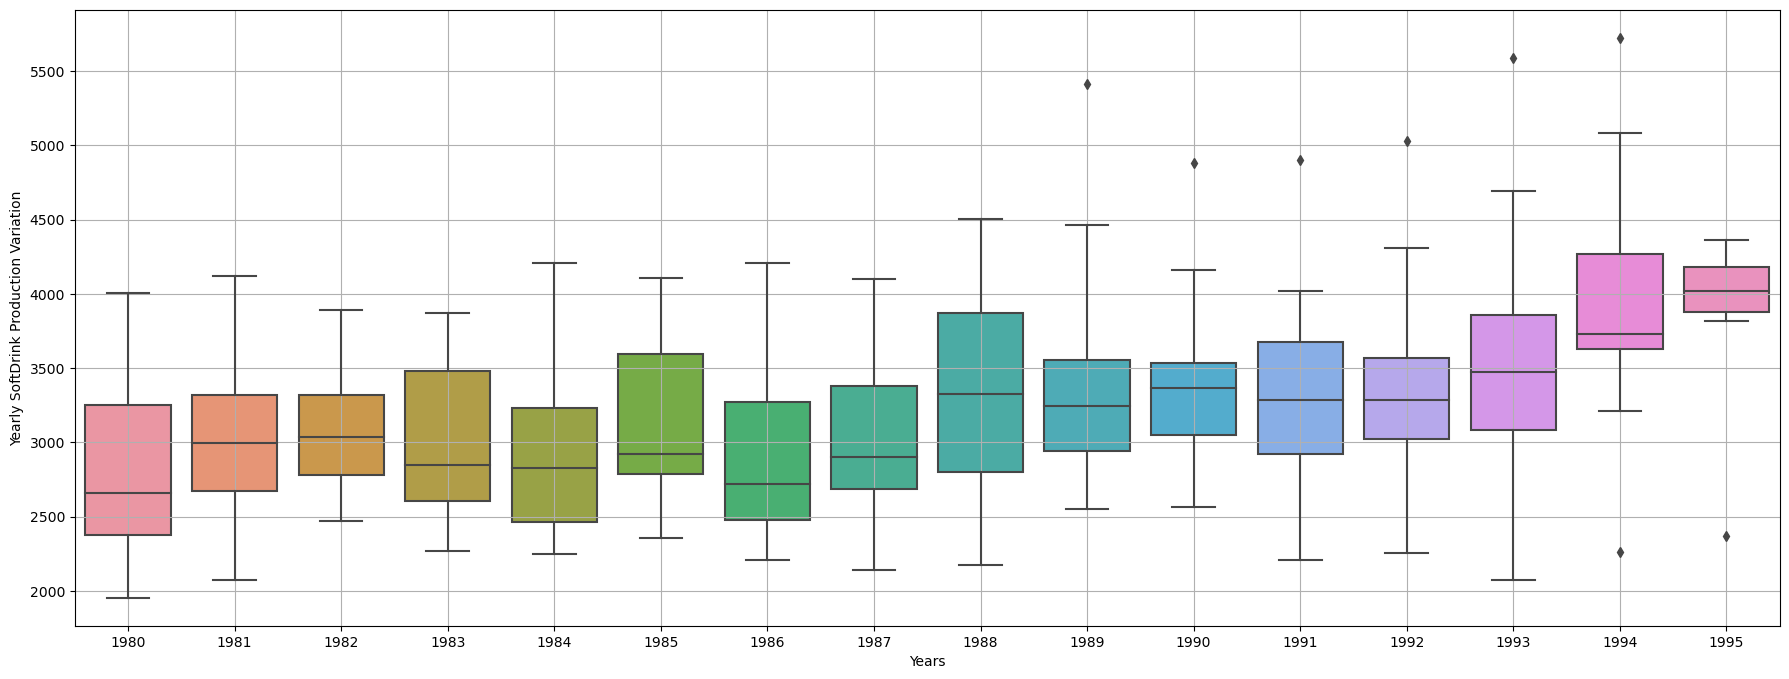

In [29]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_softdrink.index.year, df_softdrink['SoftDrinkProduction'],ax=ax, whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly SoftDrink Production Variation');

C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


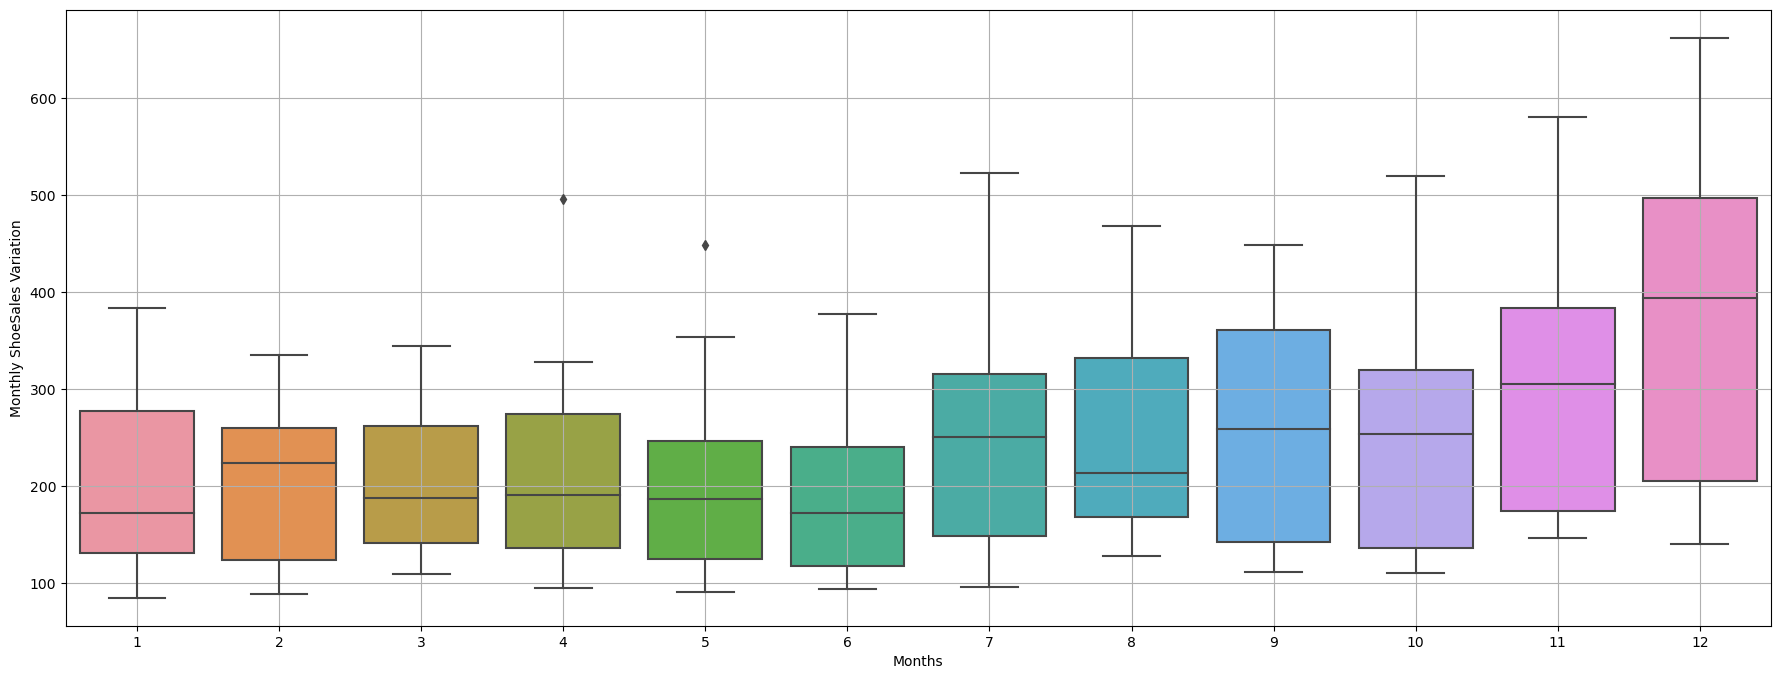

In [30]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_shoe_sales.index.month, df_shoe_sales['Shoe_Sales'],ax=ax, whis=1.5)
plt.grid();
plt.xlabel('Months');
plt.ylabel('Monthly ShoeSales Variation');

C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


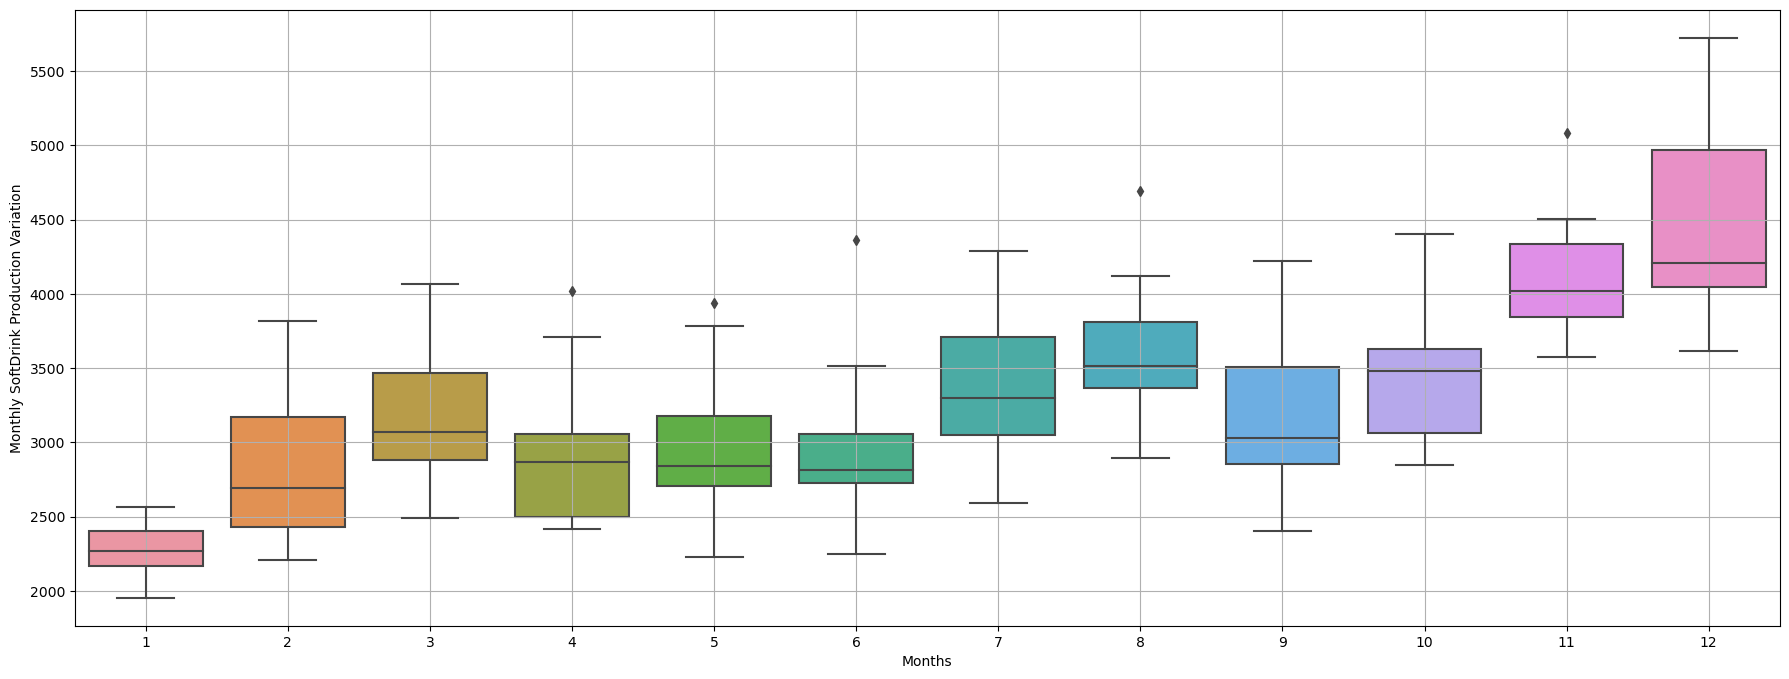

In [31]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_softdrink.index.month, df_softdrink['SoftDrinkProduction'],ax=ax, whis=1.5)
plt.grid();
plt.xlabel('Months');
plt.ylabel('Monthly SoftDrink Production Variation');

# Resampling
Let us try to resample or aggregate the Time Series from an annual perspective and sum up the observations of each month.

## Yearly Plot

In [32]:
df_ShoeSales_yearly_sum = df_shoe_sales.resample('A').sum()
df_ShoeSales_yearly_sum.head()

Shoe_Sales
YearMonth             
1980-12-31        1341
1981-12-31        1584
1982-12-31        1657
1983-12-31        1796
1984-12-31        1657

In [33]:
df_SoftDrink_yearly_sum = df_softdrink.resample('A').sum()
df_SoftDrink_yearly_sum.head()

SoftDrinkProduction
YearMonth                      
1980-12-31                34247
1981-12-31                36782
1982-12-31                36945
1983-12-31                36093
1984-12-31                35822

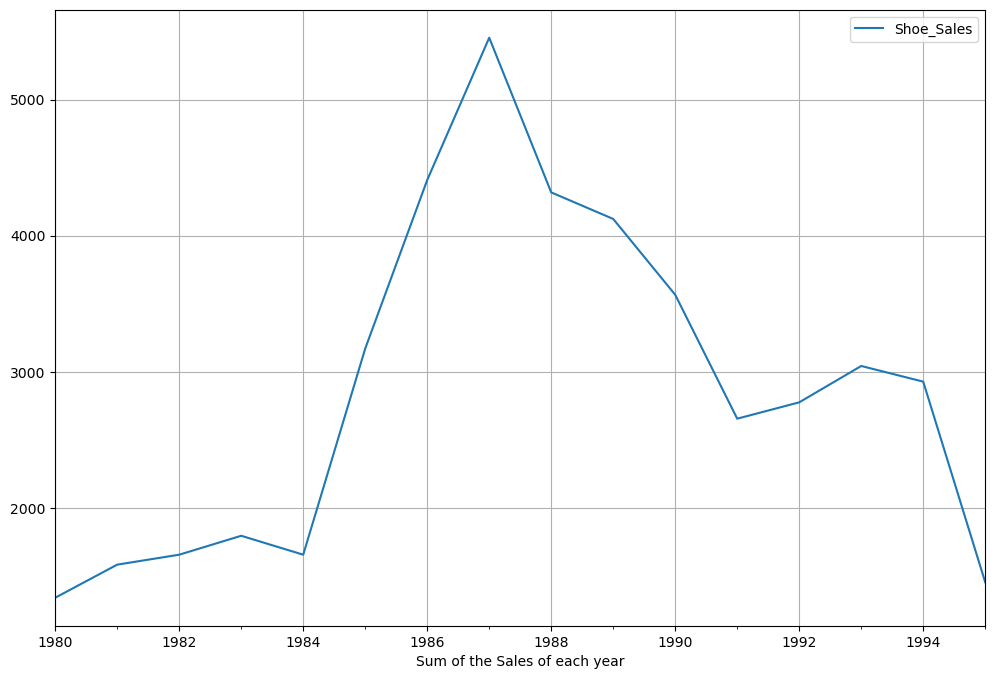

In [34]:
df_ShoeSales_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Sales of each year');

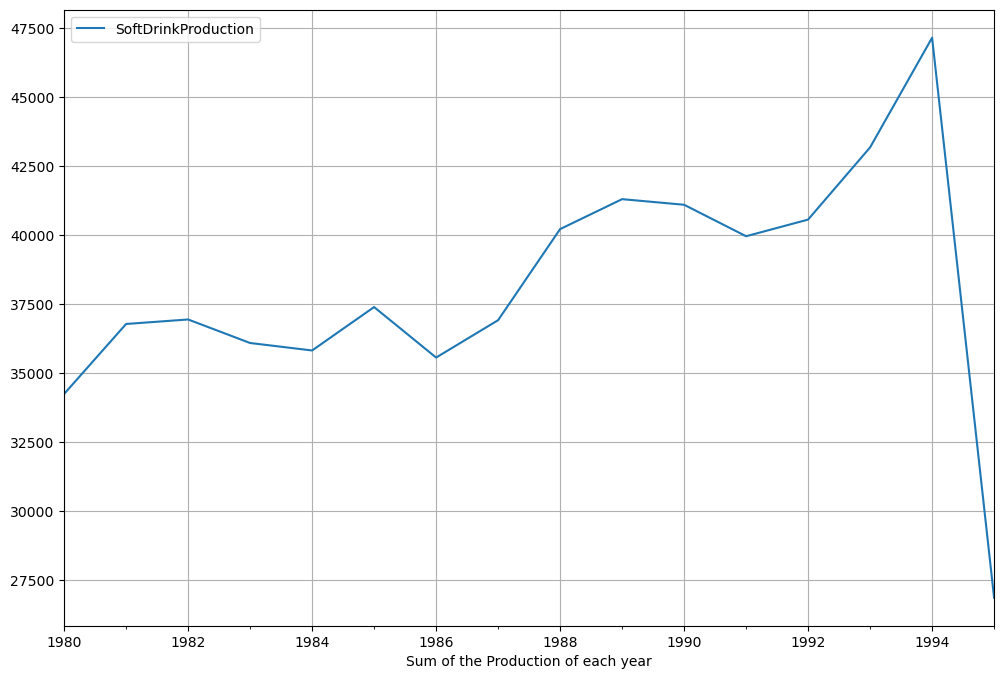

In [35]:
df_SoftDrink_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Production of each year');

In [36]:
df_ShoeSales_yearly_mean = df_shoe_sales.resample('Y').mean()
df_ShoeSales_yearly_mean.head()

Shoe_Sales
YearMonth             
1980-12-31  111.750000
1981-12-31  132.000000
1982-12-31  138.083333
1983-12-31  149.666667
1984-12-31  138.083333

In [37]:
df_SoftDrink_yearly_mean = df_softdrink.resample('Y').mean()
df_SoftDrink_yearly_mean.head()

SoftDrinkProduction
YearMonth                      
1980-12-31          2853.916667
1981-12-31          3065.166667
1982-12-31          3078.750000
1983-12-31          3007.750000
1984-12-31          2985.166667

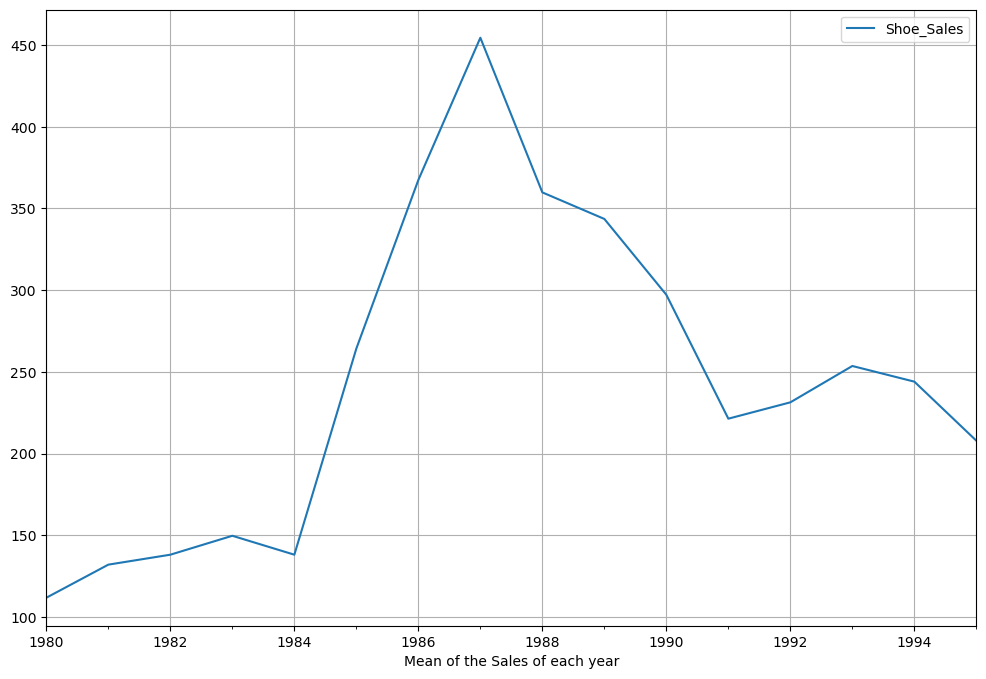

In [38]:
df_ShoeSales_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Sales of each year');

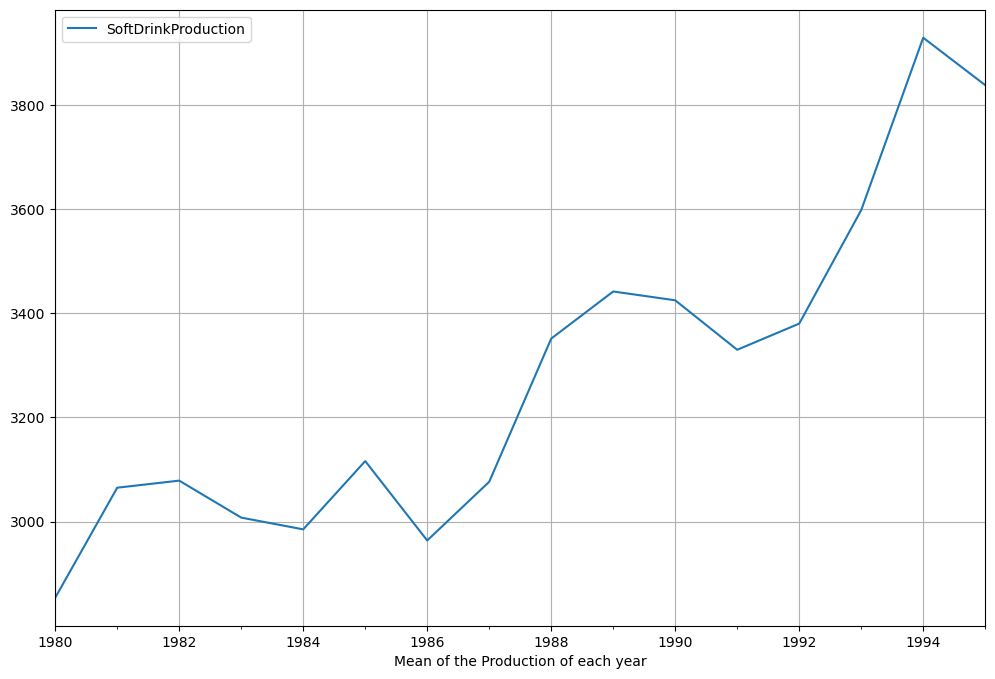

In [39]:
df_SoftDrink_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Production of each year');

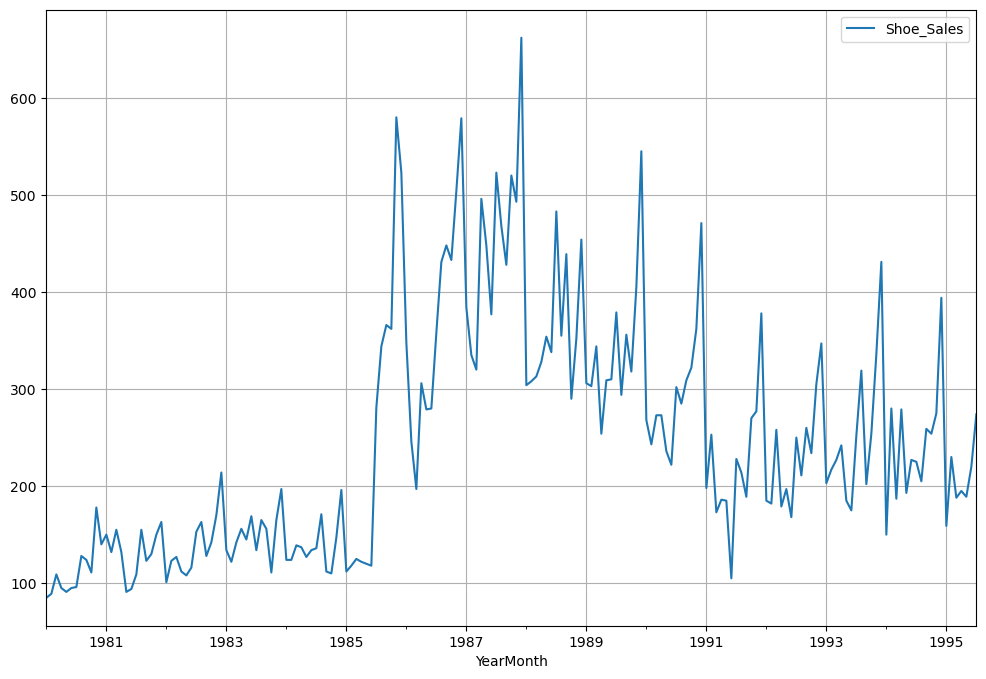

In [40]:
df_shoe_sales.plot()
plt.grid()

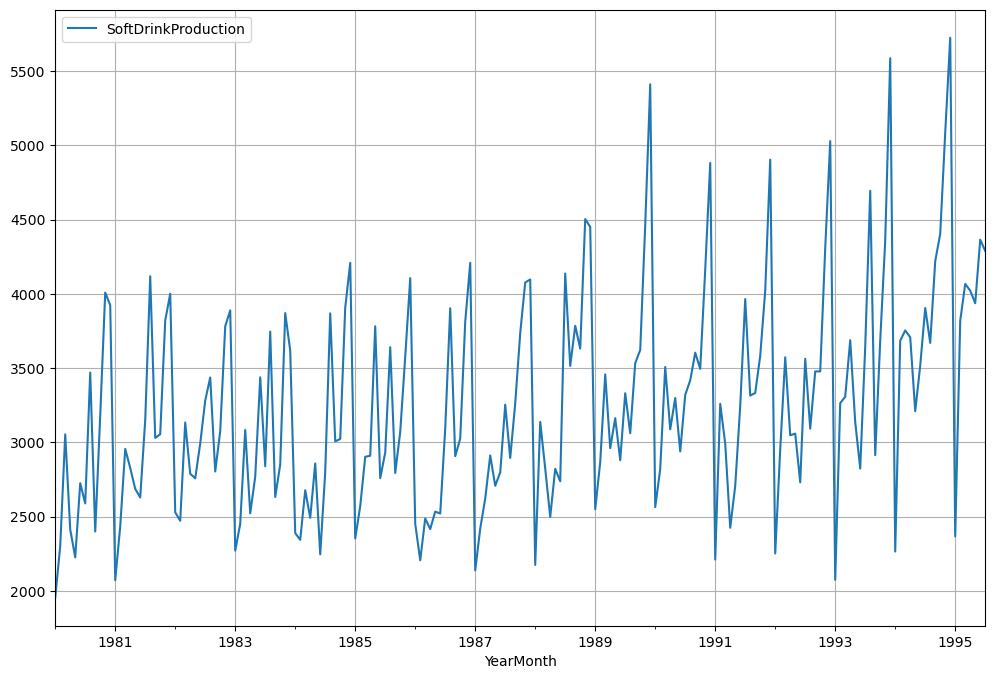

In [41]:
df_softdrink.plot()
plt.grid()

## Quarterly Plot

In [42]:
df_ShoeSales_quarterly_sum = df_shoe_sales.resample('Q').sum()
df_ShoeSales_quarterly_sum.head()

Shoe_Sales
YearMonth             
1980-03-31         283
1980-06-30         281
1980-09-30         348
1980-12-31         429
1981-03-31         437

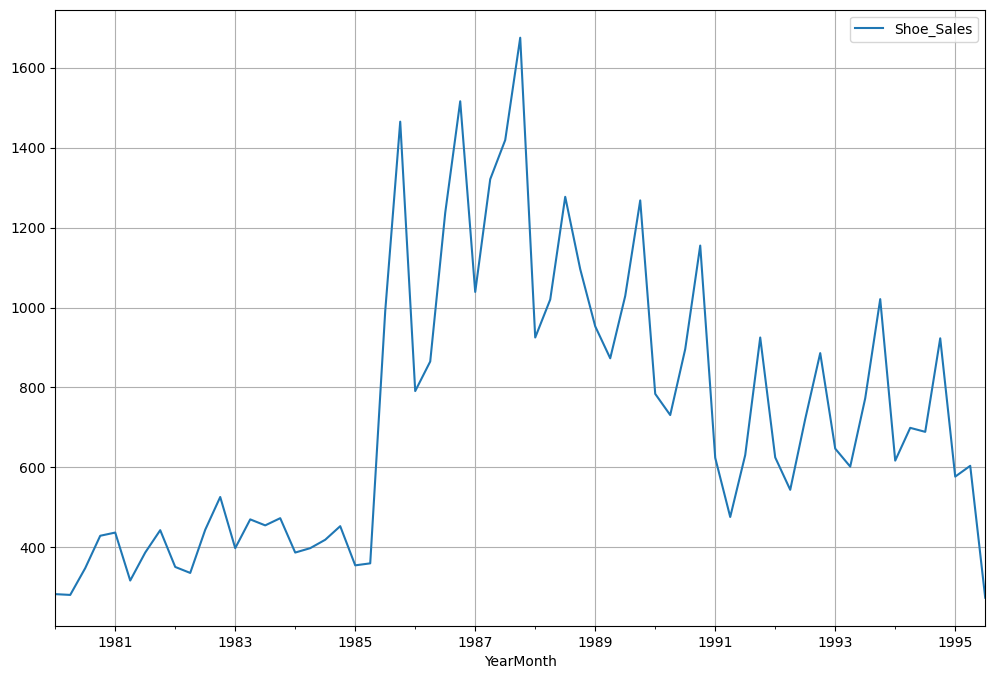

In [43]:
df_ShoeSales_quarterly_sum.plot();
plt.grid()

In [44]:
df_SoftDrink_quarterly_sum = df_softdrink.resample('Q').sum()
df_SoftDrink_quarterly_sum.head()

SoftDrinkProduction
YearMonth                      
1980-03-31                 7310
1980-06-30                 7365
1980-09-30                 8459
1980-12-31                11113
1981-03-31                 7462

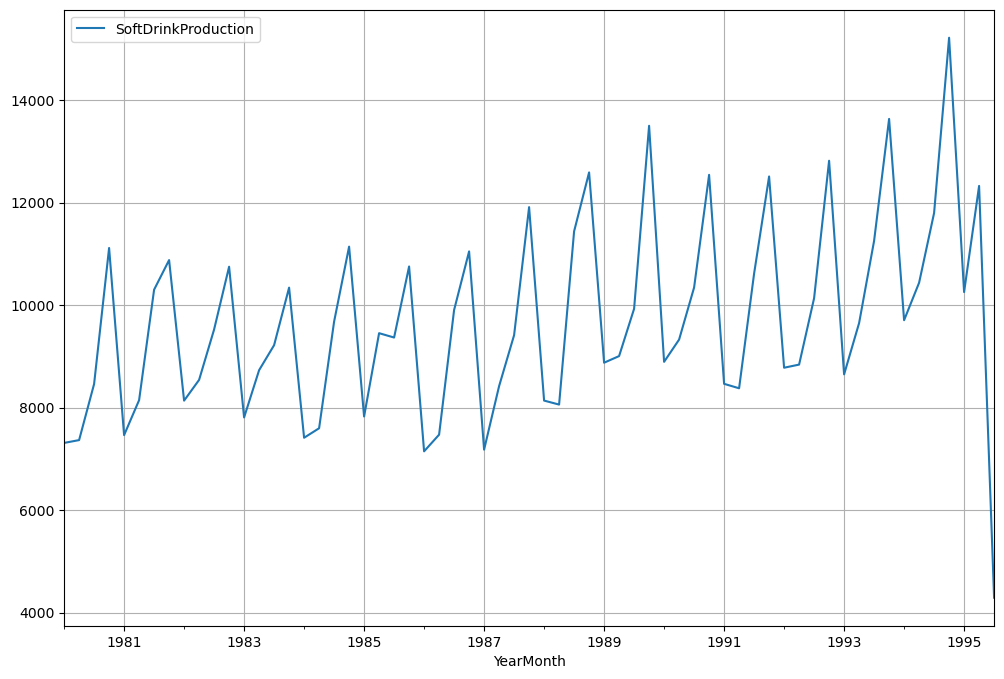

In [45]:
df_SoftDrink_quarterly_sum.plot()
plt.grid()

In [46]:
df_ShoeSales_quarterly_mean = df_shoe_sales.resample('Q').mean()
df_ShoeSales_quarterly_mean.head()

Shoe_Sales
YearMonth             
1980-03-31   94.333333
1980-06-30   93.666667
1980-09-30  116.000000
1980-12-31  143.000000
1981-03-31  145.666667

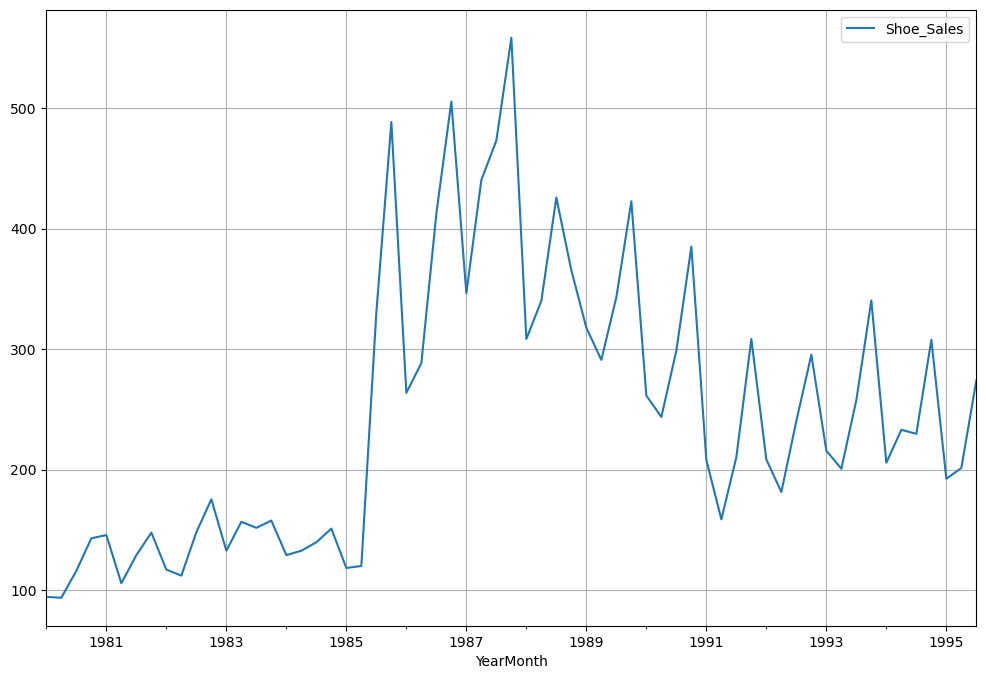

In [47]:
df_ShoeSales_quarterly_mean.plot()
plt.grid()

In [48]:
df_SoftDrink_quarterly_mean = df_softdrink.resample('Q').mean()
df_SoftDrink_quarterly_mean.head()

SoftDrinkProduction
YearMonth                      
1980-03-31          2436.666667
1980-06-30          2455.000000
1980-09-30          2819.666667
1980-12-31          3704.333333
1981-03-31          2487.333333

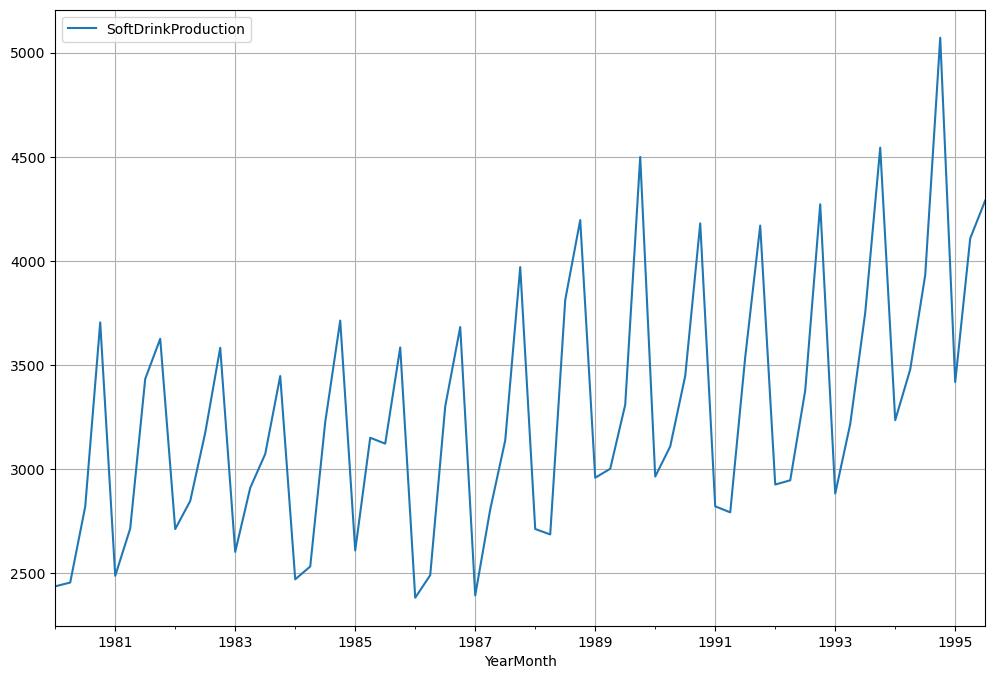

In [49]:
df_SoftDrink_quarterly_mean.plot()
plt.grid()

## Daily Plot

In [50]:
df_ShoeSales_daily_sum = df_shoe_sales.resample('D').sum()
df_ShoeSales_daily_sum

Shoe_Sales
YearMonth             
1980-01-01          85
1980-01-02           0
1980-01-03           0
1980-01-04           0
1980-01-05           0
...                ...
1995-06-27           0
1995-06-28           0
1995-06-29           0
1995-06-30           0
1995-07-01         274

[5661 rows x 1 columns]

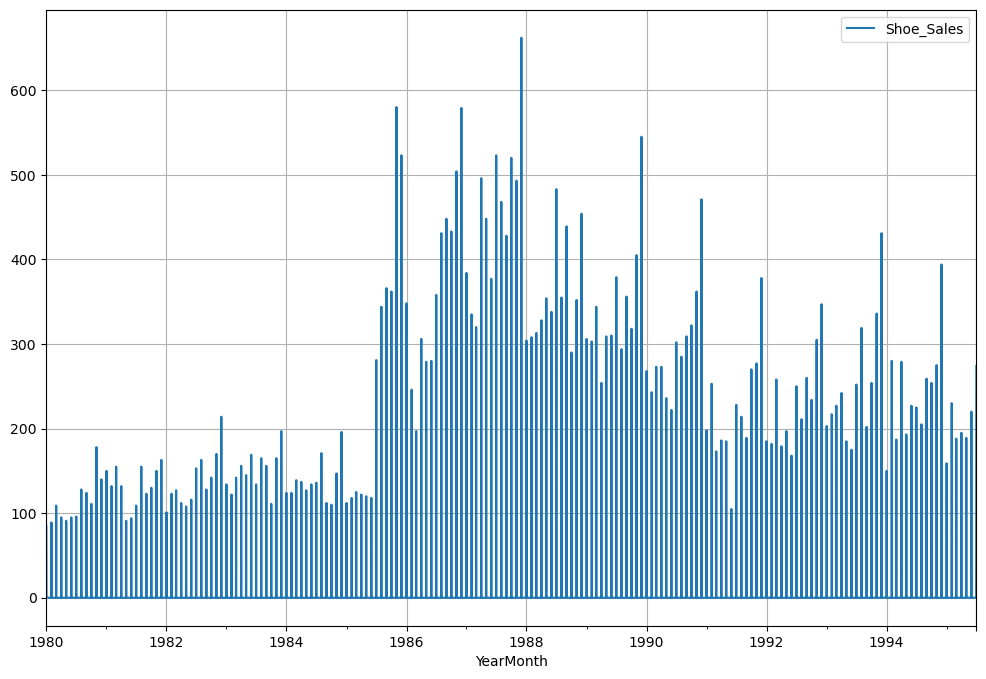

In [51]:
df_ShoeSales_daily_sum.plot()
plt.grid()

In [52]:
df_SoftDrink_daily_sum = df_softdrink.resample('D').sum()
df_SoftDrink_daily_sum

SoftDrinkProduction
YearMonth                      
1980-01-01                 1954
1980-01-02                    0
1980-01-03                    0
1980-01-04                    0
1980-01-05                    0
...                         ...
1995-06-27                    0
1995-06-28                    0
1995-06-29                    0
1995-06-30                    0
1995-07-01                 4290

[5661 rows x 1 columns]

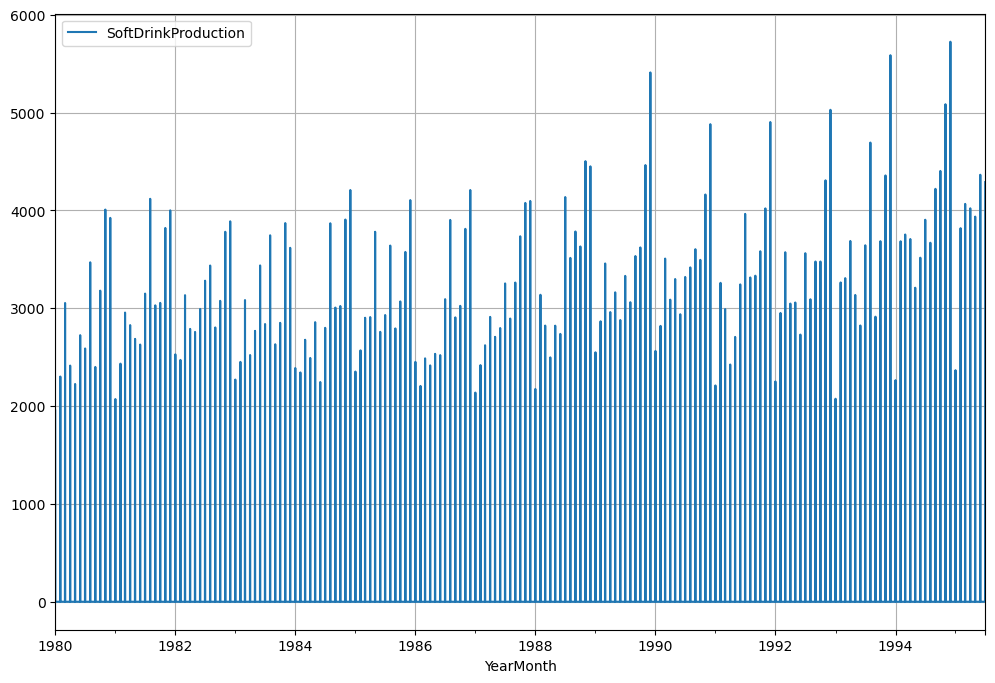

In [53]:
df_SoftDrink_daily_sum.plot()
plt.grid()

# Decompose the Time Series

## Additive Model

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose

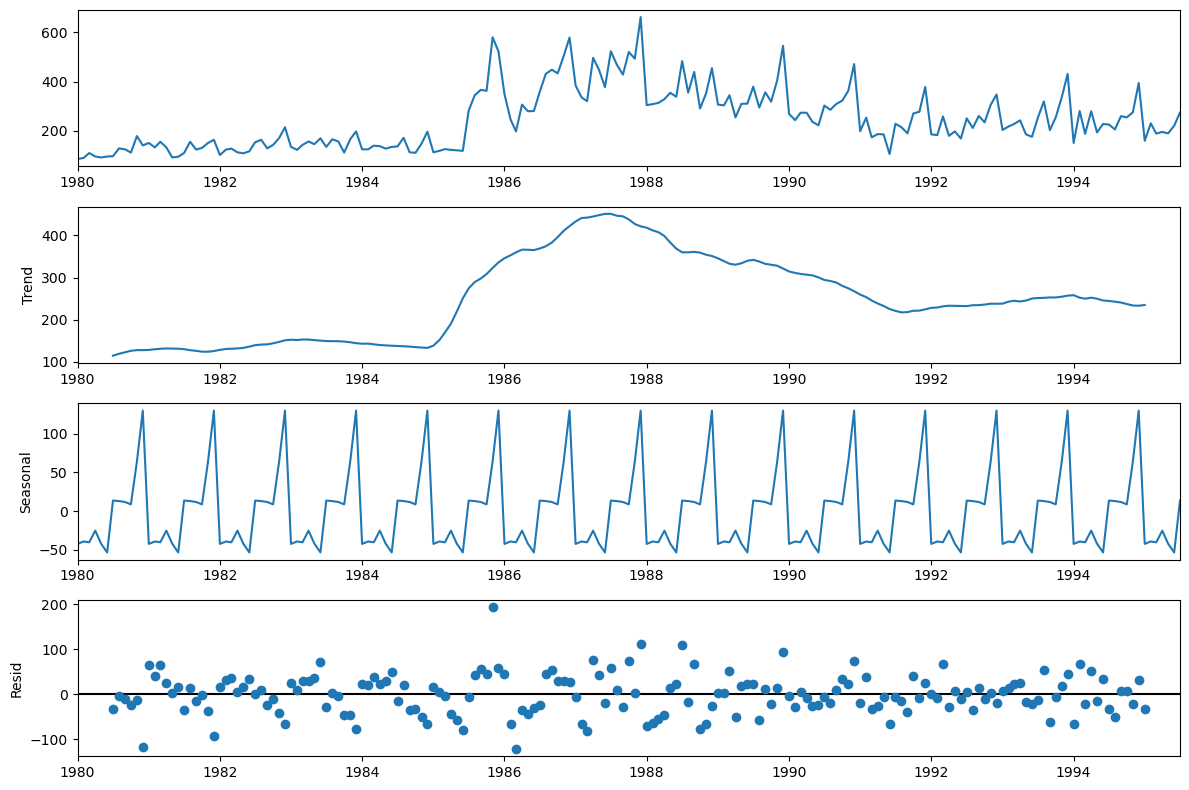

In [55]:
shoe_add_decomposition = seasonal_decompose(df_shoe_sales,model='additive')
shoe_add_decomposition.plot();

## Multiplicative Model

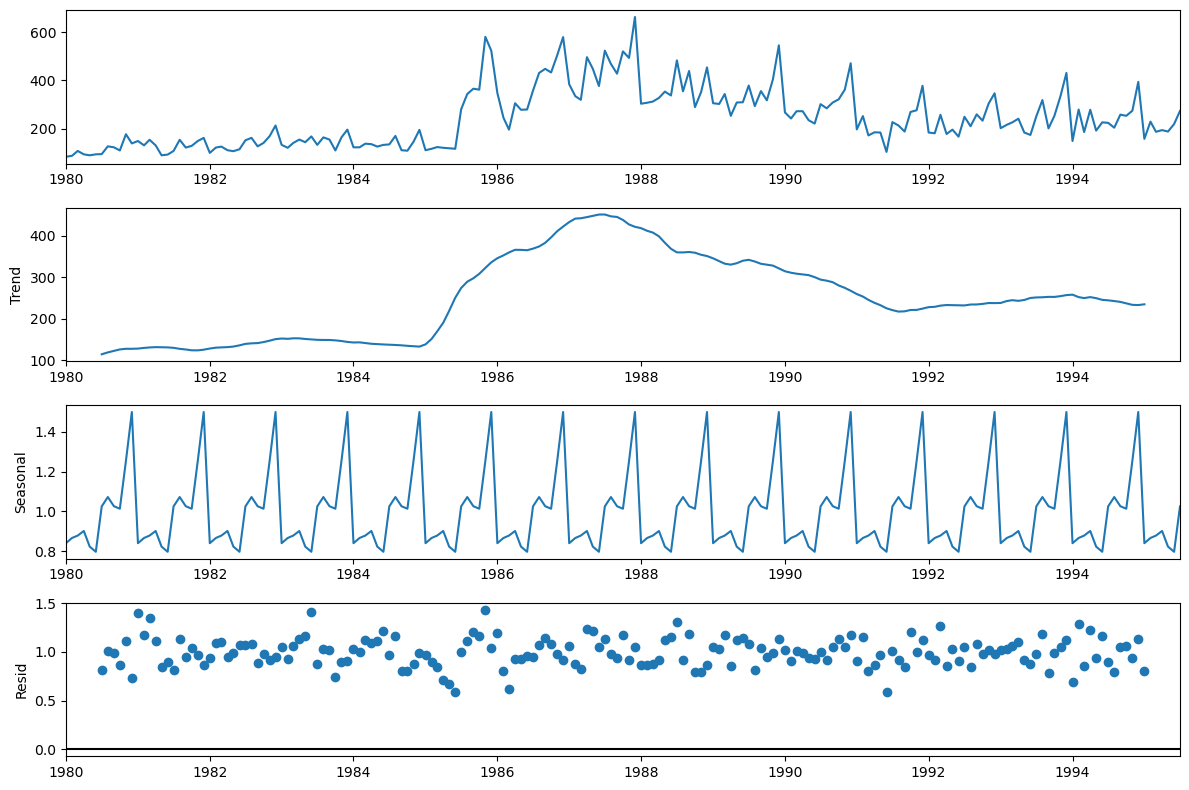

In [56]:
shoe_mul_decomposition = seasonal_decompose(df_shoe_sales,model='multiplicative')
shoe_mul_decomposition.plot();

In [57]:
shoe_trend = shoe_mul_decomposition.trend
shoe_seasonality = shoe_mul_decomposition.seasonal
shoe_residual = shoe_mul_decomposition.resid

In [59]:
print('Trend','\n',shoe_trend.head(12),'\n')
print('Seasonality','\n',shoe_seasonality.head(12),'\n')
print('Residual','\n',shoe_residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    114.458333
1980-08-01    118.958333
1980-09-01    122.666667
1980-10-01    126.125000
1980-11-01    127.666667
1980-12-01    127.625000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.840405
1980-02-01    0.866682
1980-03-01    0.878675
1980-04-01    0.901826
1980-05-01    0.823141
1980-06-01    0.797254
1980-07-01    1.025527
1980-08-01    1.072445
1980-09-01    1.026307
1980-10-01    1.013557
1980-11-01    1.254223
1980-12-01    1.499958
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.817856
1980-08-01    1.003322
1980-09-01    0.984958
1980-10-01    0.868308
1980-11-01    1.111649
1980-12-01    0.731330
Name: resid, dtype: fl

In [60]:
shoe_deaseasonalized_ts = shoe_trend + shoe_residual
shoe_deaseasonalized_ts.head(12)

YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    115.276189
1980-08-01    119.961655
1980-09-01    123.651625
1980-10-01    126.993308
1980-11-01    128.778315
1980-12-01    128.356330
dtype: float64

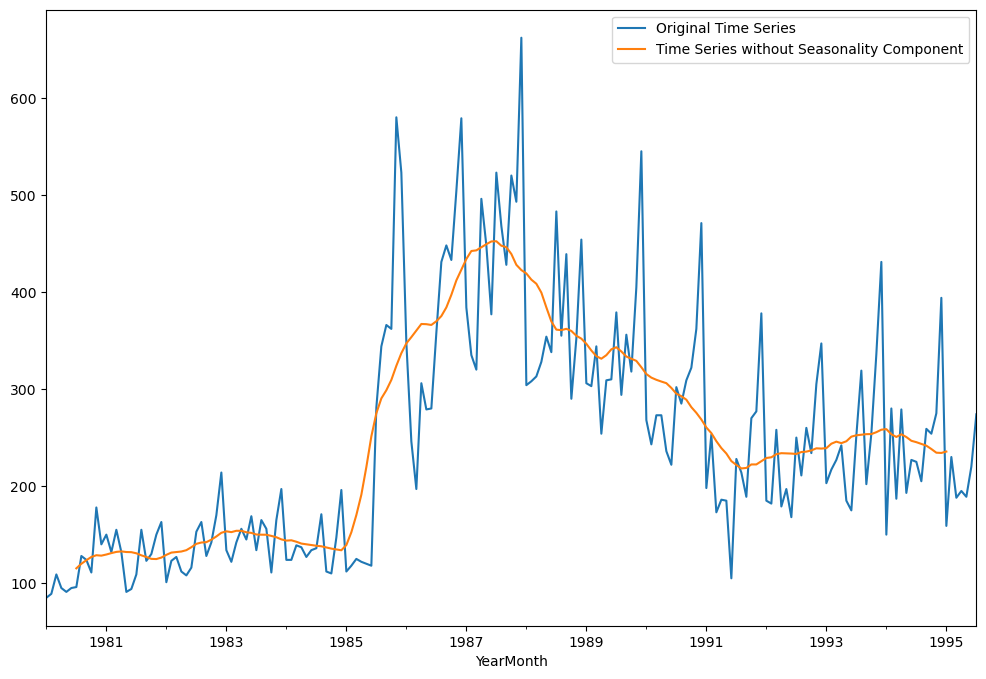

In [61]:
df_shoe_sales.plot()
shoe_deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

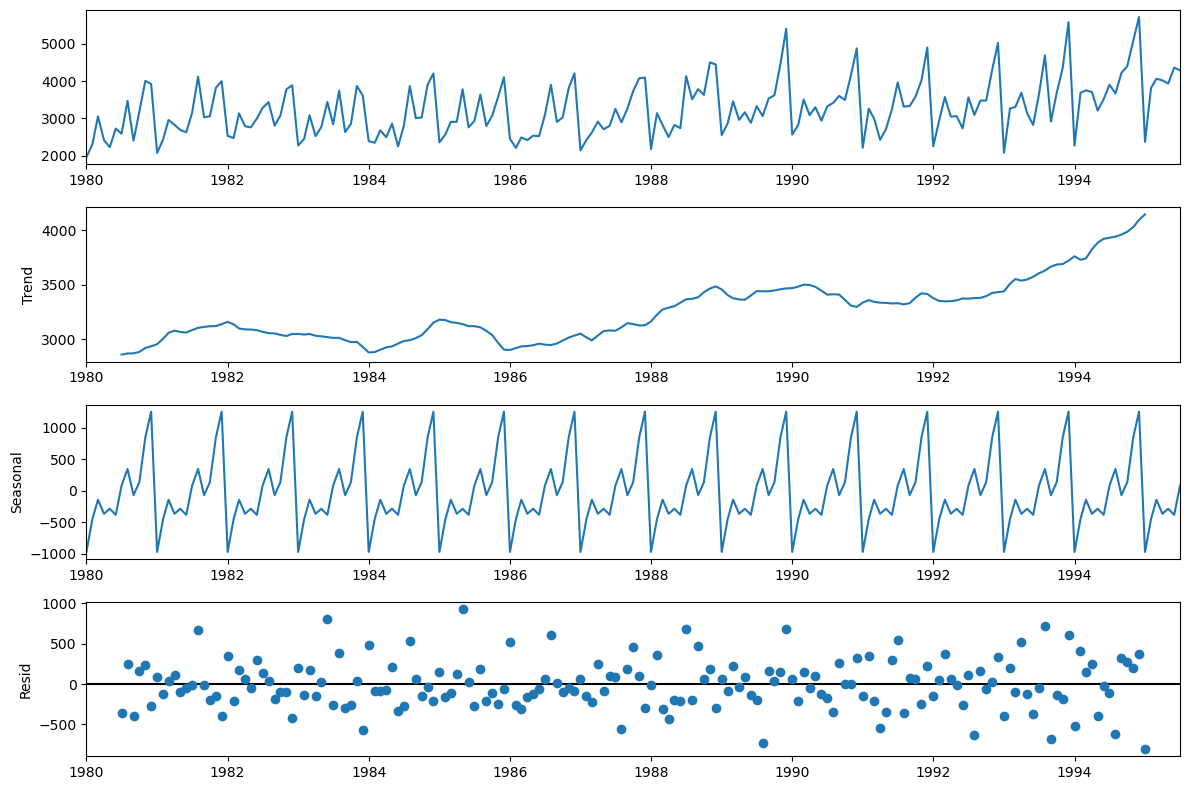

In [62]:
soft_add_decomposition = seasonal_decompose(df_softdrink,model='additive')
soft_add_decomposition.plot();

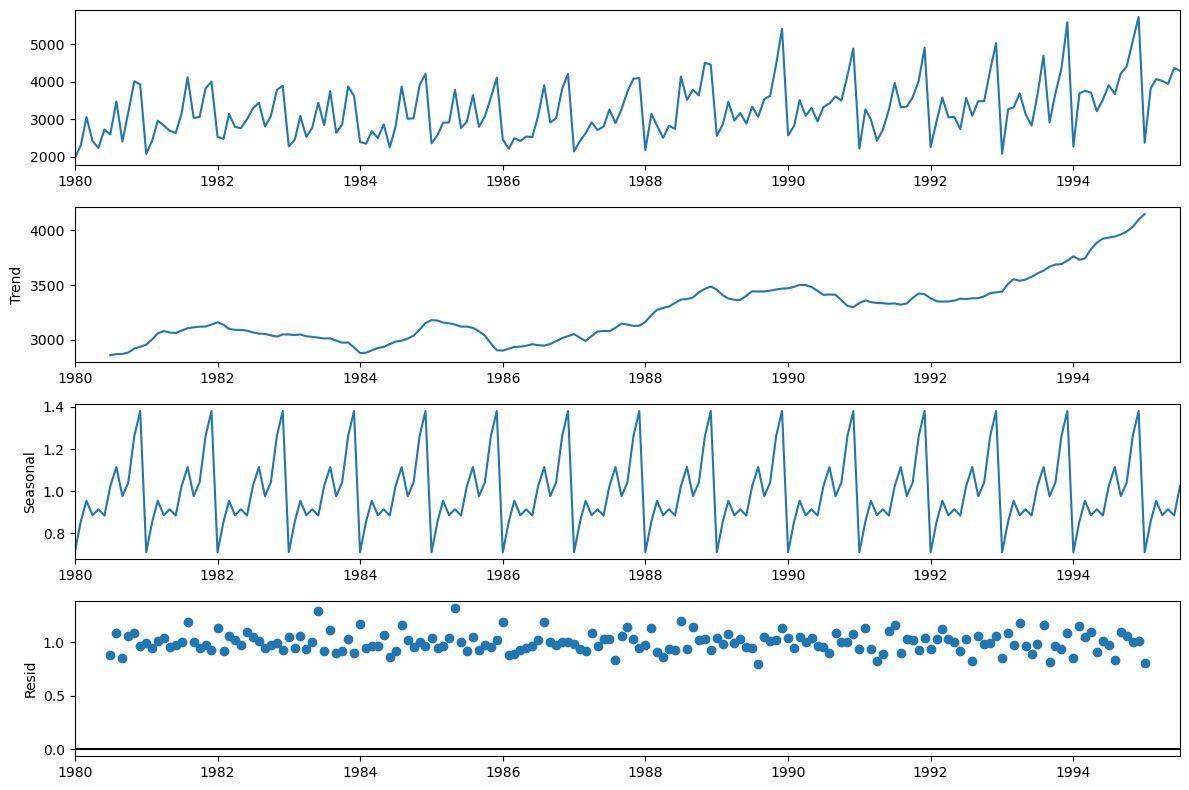

In [63]:
soft_mul_decomposition = seasonal_decompose(df_softdrink,model='multiplicative')
soft_mul_decomposition.plot();

In [64]:
soft_trend = soft_mul_decomposition.trend
soft_seasonality = soft_mul_decomposition.seasonal
soft_residual = soft_mul_decomposition.resid

In [65]:
print('Trend','\n',soft_trend.head(12),'\n')
print('Seasonality','\n',soft_seasonality.head(12),'\n')
print('Residual','\n',soft_residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2858.833333
1980-08-01    2869.250000
1980-09-01    2870.666667
1980-10-01    2883.833333
1980-11-01    2920.291667
1980-12-01    2935.500000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.709526
1980-02-01    0.856420
1980-03-01    0.953935
1980-04-01    0.885217
1980-05-01    0.913735
1980-06-01    0.883890
1980-07-01    1.023936
1980-08-01    1.114195
1980-09-01    0.975955
1980-10-01    1.040944
1980-11-01    1.261792
1980-12-01    1.380456
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.884444
1980-08-01    1.085425
1980-09-01    0.856641
1980-10-01    1.059326
1980-11-01    1.087983
1980-12-01    0.968332
Name: resi

In [66]:
soft_deaseasonalized_ts = soft_trend + soft_residual
soft_deaseasonalized_ts.head(12)

YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2859.717778
1980-08-01    2870.335425
1980-09-01    2871.523308
1980-10-01    2884.892659
1980-11-01    2921.379650
1980-12-01    2936.468332
dtype: float64

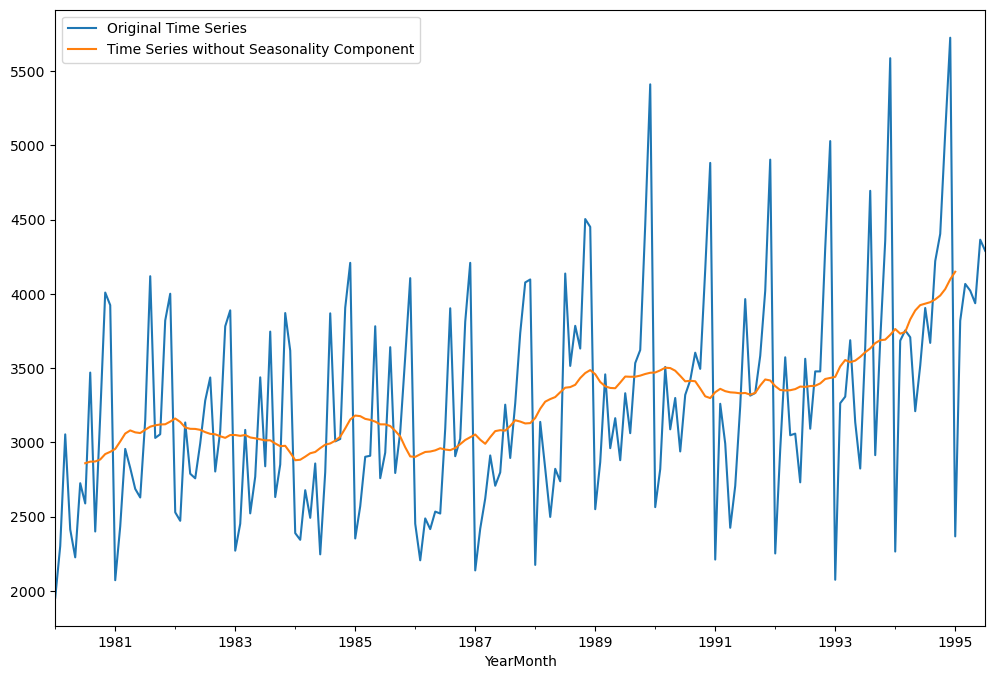

In [67]:
df_softdrink.plot()
soft_deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

# Q3) Split the data into training and test. The test data should start in 1991.

In [64]:
df_shoe_sales.head()

Shoe_Sales
YearMonth             
1980-01-01          85
1980-02-01          89
1980-03-01         109
1980-04-01          95
1980-05-01          91

In [65]:
df_softdrink.head()

SoftDrinkProduction
YearMonth                      
1980-01-01                 1954
1980-02-01                 2302
1980-03-01                 3054
1980-04-01                 2414
1980-05-01                 2226

In [66]:
train_shoe = df_shoe_sales[df_shoe_sales.index<'1991'] 
test_shoe = df_shoe_sales[df_shoe_sales.index>='1991']

In [67]:
train_shoe.head()

Shoe_Sales
YearMonth             
1980-01-01          85
1980-02-01          89
1980-03-01         109
1980-04-01          95
1980-05-01          91

In [68]:
train_shoe.tail()

Shoe_Sales
YearMonth             
1990-08-01         285
1990-09-01         309
1990-10-01         322
1990-11-01         362
1990-12-01         471

In [69]:
test_shoe.head()

Shoe_Sales
YearMonth             
1991-01-01         198
1991-02-01         253
1991-03-01         173
1991-04-01         186
1991-05-01         185

In [70]:
test_shoe.tail()

Shoe_Sales
YearMonth             
1995-03-01         188
1995-04-01         195
1995-05-01         189
1995-06-01         220
1995-07-01         274

In [71]:
print('Training Data of Shoe Sales')
display(train_shoe)
print('Test Data of Shoe Sales')
display(test_shoe)

Training Data of Shoe Sales


Shoe_Sales
YearMonth             
1980-01-01          85
1980-02-01          89
1980-03-01         109
1980-04-01          95
1980-05-01          91
...                ...
1990-08-01         285
1990-09-01         309
1990-10-01         322
1990-11-01         362
1990-12-01         471

[132 rows x 1 columns]

Test Data of Shoe Sales


Shoe_Sales
YearMonth             
1991-01-01         198
1991-02-01         253
1991-03-01         173
1991-04-01         186
1991-05-01         185
1991-06-01         105
1991-07-01         228
1991-08-01         214
1991-09-01         189
1991-10-01         270
1991-11-01         277
1991-12-01         378
1992-01-01         185
1992-02-01         182
1992-03-01         258
1992-04-01         179
1992-05-01         197
1992-06-01         168
1992-07-01         250
1992-08-01         211
1992-09-01         260
1992-10-01         234
1992-11-01         305
1992-12-01         347
1993-01-01         203
1993-02-01         217
1993-03-01         227
1993-04-01         242
1993-05-01         185
1993-06-01         175
1993-07-01         252
1993-08-01         319
1993-09-01         202
1993-10-01         254
1993-11-01         336
1993-12-01         431
1994-01-01         150
1994-02-01         280
1994-03-01         187
1994-04-01         279
1994-05-01         193
1994-06-01         227
1994-07-01         225
1994-08-01         205
1994-09-01         259
1994-10-01         254
1994-11-01         275
1994-12-01         394
1995-01-01         159
1995-02-01         230
1995-03-01         188
1995-04-01         195
1995-05-01         189
1995-06-01         220
1995-07-01         274

In [72]:
train_softdrink = df_softdrink[df_softdrink.index<'1991'] 
test_softdrink = df_softdrink[df_softdrink.index>='1991']

In [73]:
train_softdrink.head()

SoftDrinkProduction
YearMonth                      
1980-01-01                 1954
1980-02-01                 2302
1980-03-01                 3054
1980-04-01                 2414
1980-05-01                 2226

In [74]:
train_softdrink.tail()

SoftDrinkProduction
YearMonth                      
1990-08-01                 3418
1990-09-01                 3604
1990-10-01                 3495
1990-11-01                 4163
1990-12-01                 4882

In [75]:
test_softdrink.head()

SoftDrinkProduction
YearMonth                      
1991-01-01                 2211
1991-02-01                 3260
1991-03-01                 2992
1991-04-01                 2425
1991-05-01                 2707

In [76]:
test_softdrink.tail()

SoftDrinkProduction
YearMonth                      
1995-03-01                 4067
1995-04-01                 4022
1995-05-01                 3937
1995-06-01                 4365
1995-07-01                 4290

In [77]:
print('Training Data of Softdrinks')
print(train_softdrink)
print('Test Data of Softdrinks')
print(test_softdrink)

Training Data of Softdrinks
            SoftDrinkProduction
YearMonth                      
1980-01-01                 1954
1980-02-01                 2302
1980-03-01                 3054
1980-04-01                 2414
1980-05-01                 2226
...                         ...
1990-08-01                 3418
1990-09-01                 3604
1990-10-01                 3495
1990-11-01                 4163
1990-12-01                 4882

[132 rows x 1 columns]
Test Data of Softdrinks
            SoftDrinkProduction
YearMonth                      
1991-01-01                 2211
1991-02-01                 3260
1991-03-01                 2992
1991-04-01                 2425
1991-05-01                 2707
1991-06-01                 3244
1991-07-01                 3965
1991-08-01                 3315
1991-09-01                 3333
1991-10-01                 3583
1991-11-01                 4021
1991-12-01                 4904
1992-01-01                 2252
1992-02-01                 2

In [78]:
print(f"{train_shoe.shape[0]} rows and {train_shoe.shape[1]} columns and in train data of shoe sales")
print(f"{test_shoe.shape[0]} rows and {test_shoe.shape[1]} columns and in test data of shoe sales")
print(f"{train_softdrink.shape[0]} rows and {train_softdrink.shape[1]} columns and in train data of softdrinks production")
print(f"{test_softdrink.shape[0]} rows and {test_softdrink.shape[1]} columns and in test data of softdrinks production")

132 rows and 1 columns and in train data of shoe sales
55 rows and 1 columns and in test data of shoe sales
132 rows and 1 columns and in train data of softdrinks production
55 rows and 1 columns and in test data of softdrinks production


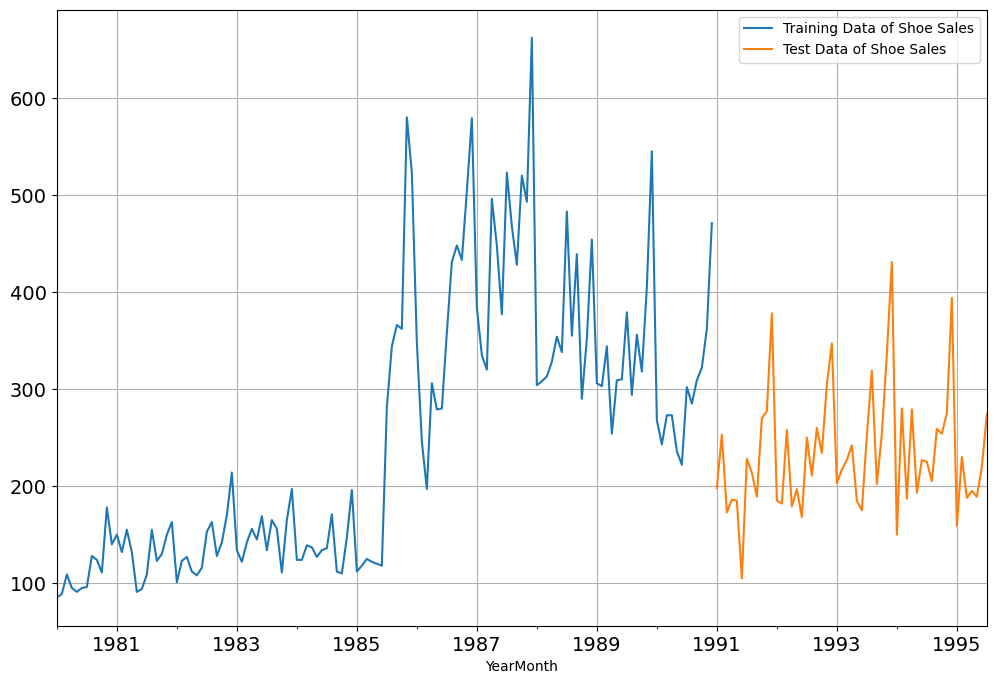

In [79]:
train_shoe['Shoe_Sales'].plot(fontsize=14)
test_shoe['Shoe_Sales'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data of Shoe Sales','Test Data of Shoe Sales'])
plt.show()

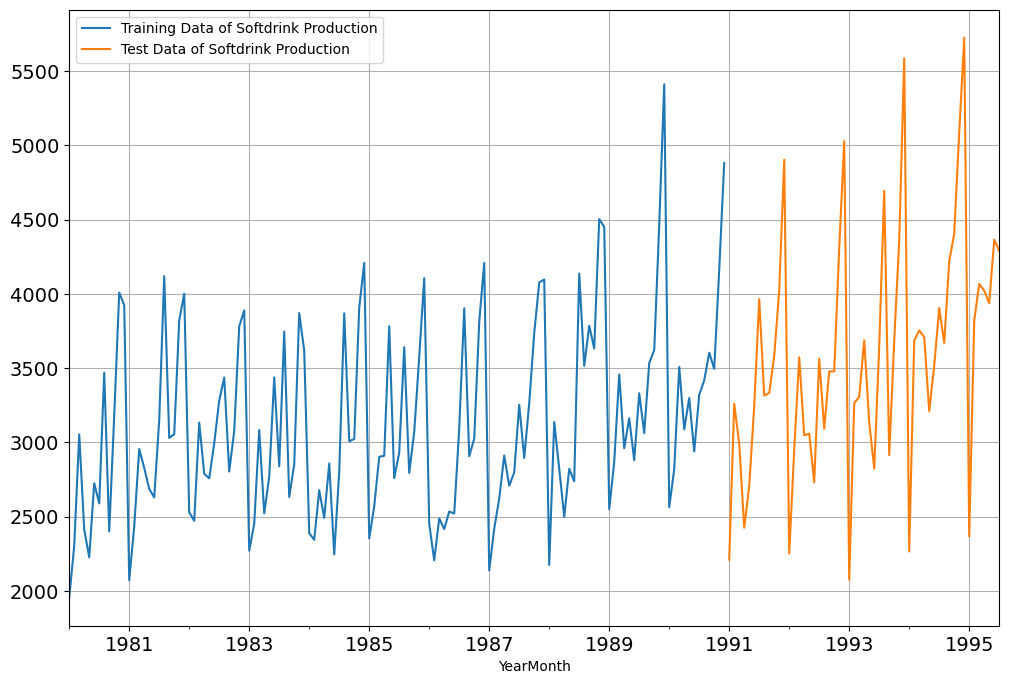

In [80]:
train_softdrink['SoftDrinkProduction'].plot(fontsize=14)
test_softdrink['SoftDrinkProduction'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data of Softdrink Production','Test Data of Softdrink Production'])
plt.show()

# Q4) Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data.
Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.


### Exponential Smoothing Methods : 

### Simple Exponential Smoothing

In [81]:
# create class
model_SES_shoe = SimpleExpSmoothing(train_shoe,initialization_method='estimated')
model_SES_softdrink = SimpleExpSmoothing(train_softdrink,initialization_method='estimated')

C:\Users\priya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\priya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [82]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit_shoe = model_SES_shoe.fit(optimized=True)
model_SES_autofit_softdrink = model_SES_softdrink.fit(optimized=True)

In [83]:
## Let us check the parameters for Shoe Sales

model_SES_autofit_shoe.params

{'smoothing_level': 0.605049221658923,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 88.83028430097019,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [84]:
## Let us check the parameters for Softdrink Production

model_SES_autofit_softdrink.params

{'smoothing_level': 0.11907309094689855,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2573.0166666666655,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [85]:
# Using the fitted model on the training set to forecast on the test set
SES_predict_shoe = model_SES_autofit_shoe.forecast(steps=len(test_shoe))
SES_predict_shoe

1991-01-01    420.229857
1991-02-01    420.229857
1991-03-01    420.229857
1991-04-01    420.229857
1991-05-01    420.229857
1991-06-01    420.229857
1991-07-01    420.229857
1991-08-01    420.229857
1991-09-01    420.229857
1991-10-01    420.229857
1991-11-01    420.229857
1991-12-01    420.229857
1992-01-01    420.229857
1992-02-01    420.229857
1992-03-01    420.229857
1992-04-01    420.229857
1992-05-01    420.229857
1992-06-01    420.229857
1992-07-01    420.229857
1992-08-01    420.229857
1992-09-01    420.229857
1992-10-01    420.229857
1992-11-01    420.229857
1992-12-01    420.229857
1993-01-01    420.229857
1993-02-01    420.229857
1993-03-01    420.229857
1993-04-01    420.229857
1993-05-01    420.229857
1993-06-01    420.229857
1993-07-01    420.229857
1993-08-01    420.229857
1993-09-01    420.229857
1993-10-01    420.229857
1993-11-01    420.229857
1993-12-01    420.229857
1994-01-01    420.229857
1994-02-01    420.229857
1994-03-01    420.229857
1994-04-01    420.229857


In [86]:
# Using the fitted model on the training set to forecast on the test set
SES_predict_softdrink = model_SES_autofit_softdrink.forecast(steps=len(test_softdrink))
SES_predict_softdrink

1991-01-01    3656.847753
1991-02-01    3656.847753
1991-03-01    3656.847753
1991-04-01    3656.847753
1991-05-01    3656.847753
1991-06-01    3656.847753
1991-07-01    3656.847753
1991-08-01    3656.847753
1991-09-01    3656.847753
1991-10-01    3656.847753
1991-11-01    3656.847753
1991-12-01    3656.847753
1992-01-01    3656.847753
1992-02-01    3656.847753
1992-03-01    3656.847753
1992-04-01    3656.847753
1992-05-01    3656.847753
1992-06-01    3656.847753
1992-07-01    3656.847753
1992-08-01    3656.847753
1992-09-01    3656.847753
1992-10-01    3656.847753
1992-11-01    3656.847753
1992-12-01    3656.847753
1993-01-01    3656.847753
1993-02-01    3656.847753
1993-03-01    3656.847753
1993-04-01    3656.847753
1993-05-01    3656.847753
1993-06-01    3656.847753
1993-07-01    3656.847753
1993-08-01    3656.847753
1993-09-01    3656.847753
1993-10-01    3656.847753
1993-11-01    3656.847753
1993-12-01    3656.847753
1994-01-01    3656.847753
1994-02-01    3656.847753
1994-03-01  

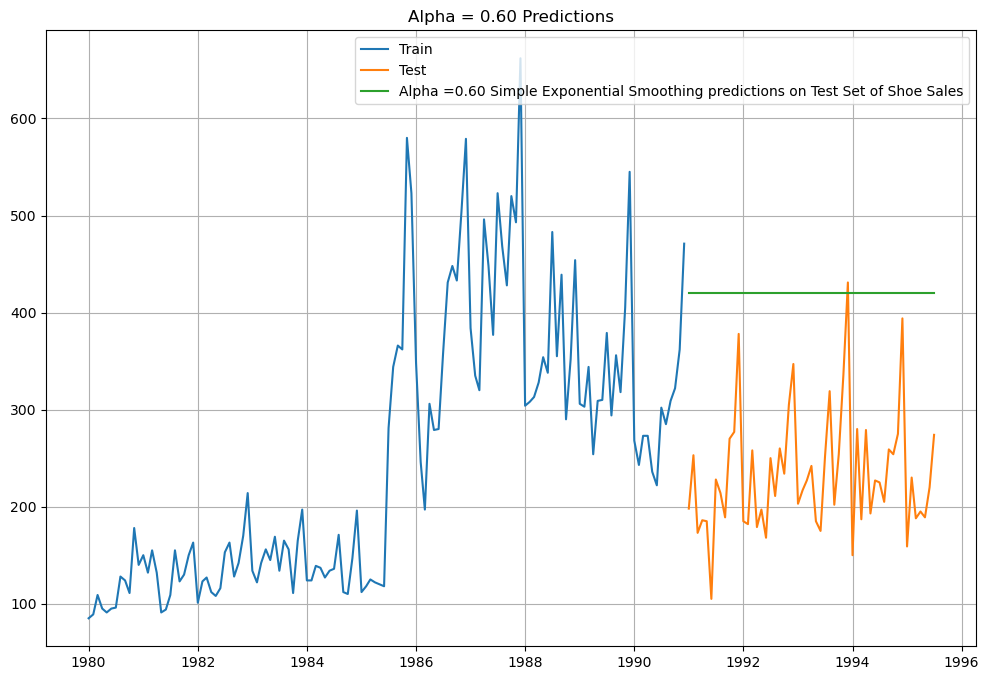

In [87]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train_shoe, label='Train')
plt.plot(test_shoe, label='Test')

plt.plot(SES_predict_shoe, label='Alpha =0.60 Simple Exponential Smoothing predictions on Test Set of Shoe Sales')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.60 Predictions');

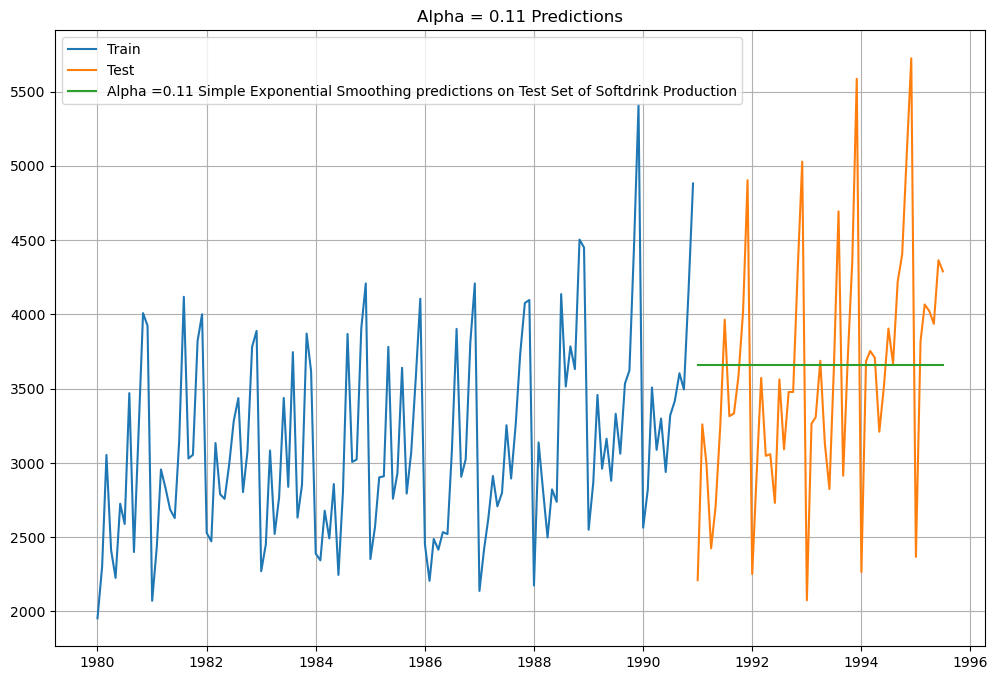

In [88]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train_softdrink, label='Train')
plt.plot(test_softdrink, label='Test')

plt.plot(SES_predict_softdrink, label='Alpha =0.11 Simple Exponential Smoothing predictions on Test Set of Softdrink Production')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.11 Predictions');

In [89]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [90]:
rmse_model01_test_shoe = mean_squared_error(test_shoe.values,SES_predict_shoe.values,squared=False)
print('SES RMSE:',rmse_model01_test_shoe)
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test_shoe.values,SES_predict_shoe.values)[0])

SES RMSE: 196.404836419672
SES RMSE (calculated using statsmodels): 196.404836419672


In [91]:
resultsDf = pd.DataFrame({'Test RMSE': rmse_model01_test_shoe},index=['Alpha=0.60,SES on Shoe Sales'])
resultsDf

Test RMSE
Alpha=0.60,SES on Shoe Sales  196.404836

In [92]:
rmse_model01_test_softdrink = mean_squared_error(test_softdrink.values,SES_predict_softdrink.values,squared=False)
print('SES RMSE:',rmse_model01_test_softdrink)
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test_softdrink.values,SES_predict_softdrink.values)[0])

SES RMSE: 809.5016403931278
SES RMSE (calculated using statsmodels): 809.5016403931279


In [93]:
resultsDf01 = pd.DataFrame({'Test RMSE': rmse_model01_test_softdrink},index=['Alpha=0.11,SES on Softdrink Production'])
resultsDf01

Test RMSE
Alpha=0.11,SES on Softdrink Production  809.50164

In [94]:
resultsDf = pd.concat([resultsDf,resultsDf01])
resultsDf

Test RMSE
Alpha=0.60,SES on Shoe Sales            196.404836
Alpha=0.11,SES on Softdrink Production  809.501640

## Holt - ETS (Double Exponential Smoothing)

In [95]:
# Initializing the Double Exponential Smoothing Model
model_DES_shoe = Holt(train_shoe,initialization_method='estimated')
# Fitting the model
model_DES_shoe = model_DES_shoe.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters on Shoe Sales==')
print('')
print(model_DES_shoe.params)


==Holt model Exponential Smoothing Estimated Parameters on Shoe Sales==

{'smoothing_level': 0.5948061323729839, 'smoothing_trend': 0.000279646480657923, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 82.93815017865691, 'initial_trend': 2.5254544148321547, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\priya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [96]:
# Initializing the Double Exponential Smoothing Model
model_DES_softdrink = Holt(train_softdrink,initialization_method='estimated')
# Fitting the model
model_DES_softdrink = model_DES_softdrink.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters on Softdrink Production==')
print('')
print(model_DES_softdrink.params)


==Holt model Exponential Smoothing Estimated Parameters on Softdrink Production==

{'smoothing_level': 0.1242286864966588, 'smoothing_trend': 0.10769076164072929, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 2142.9200400852947, 'initial_trend': 42.27465415028941, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\priya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [97]:
# Forecasting using this model for the duration of the test set
DES_predict_shoe =  model_DES_shoe.forecast(len(test_shoe))
DES_predict_shoe

1991-01-01    422.870987
1991-02-01    425.397576
1991-03-01    427.924166
1991-04-01    430.450755
1991-05-01    432.977344
1991-06-01    435.503934
1991-07-01    438.030523
1991-08-01    440.557112
1991-09-01    443.083702
1991-10-01    445.610291
1991-11-01    448.136881
1991-12-01    450.663470
1992-01-01    453.190059
1992-02-01    455.716649
1992-03-01    458.243238
1992-04-01    460.769827
1992-05-01    463.296417
1992-06-01    465.823006
1992-07-01    468.349596
1992-08-01    470.876185
1992-09-01    473.402774
1992-10-01    475.929364
1992-11-01    478.455953
1992-12-01    480.982543
1993-01-01    483.509132
1993-02-01    486.035721
1993-03-01    488.562311
1993-04-01    491.088900
1993-05-01    493.615489
1993-06-01    496.142079
1993-07-01    498.668668
1993-08-01    501.195258
1993-09-01    503.721847
1993-10-01    506.248436
1993-11-01    508.775026
1993-12-01    511.301615
1994-01-01    513.828204
1994-02-01    516.354794
1994-03-01    518.881383
1994-04-01    521.407973


In [98]:
# Forecasting using this model for the duration of the test set
DES_predict_softdrink =  model_DES_softdrink.forecast(len(test_softdrink))
DES_predict_softdrink

1991-01-01    3727.184397
1991-02-01    3751.450885
1991-03-01    3775.717372
1991-04-01    3799.983860
1991-05-01    3824.250348
1991-06-01    3848.516836
1991-07-01    3872.783323
1991-08-01    3897.049811
1991-09-01    3921.316299
1991-10-01    3945.582787
1991-11-01    3969.849274
1991-12-01    3994.115762
1992-01-01    4018.382250
1992-02-01    4042.648738
1992-03-01    4066.915225
1992-04-01    4091.181713
1992-05-01    4115.448201
1992-06-01    4139.714689
1992-07-01    4163.981176
1992-08-01    4188.247664
1992-09-01    4212.514152
1992-10-01    4236.780640
1992-11-01    4261.047127
1992-12-01    4285.313615
1993-01-01    4309.580103
1993-02-01    4333.846591
1993-03-01    4358.113078
1993-04-01    4382.379566
1993-05-01    4406.646054
1993-06-01    4430.912541
1993-07-01    4455.179029
1993-08-01    4479.445517
1993-09-01    4503.712005
1993-10-01    4527.978492
1993-11-01    4552.244980
1993-12-01    4576.511468
1994-01-01    4600.777956
1994-02-01    4625.044443
1994-03-01  

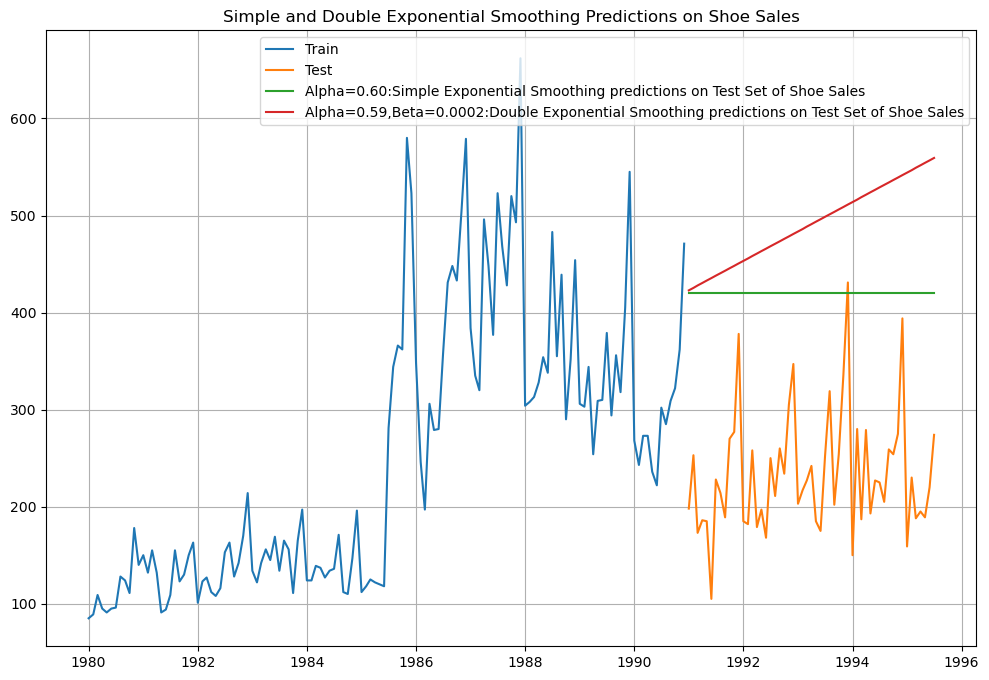

In [99]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train_shoe, label='Train')
plt.plot(test_shoe, label='Test')

plt.plot(SES_predict_shoe, label='Alpha=0.60:Simple Exponential Smoothing predictions on Test Set of Shoe Sales')
plt.plot(DES_predict_shoe, label='Alpha=0.59,Beta=0.0002:Double Exponential Smoothing predictions on Test Set of Shoe Sales')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions on Shoe Sales');

Text(0.5, 1.0, 'Simple and Double Exponential Smoothing Predictions on Softdrink Production')

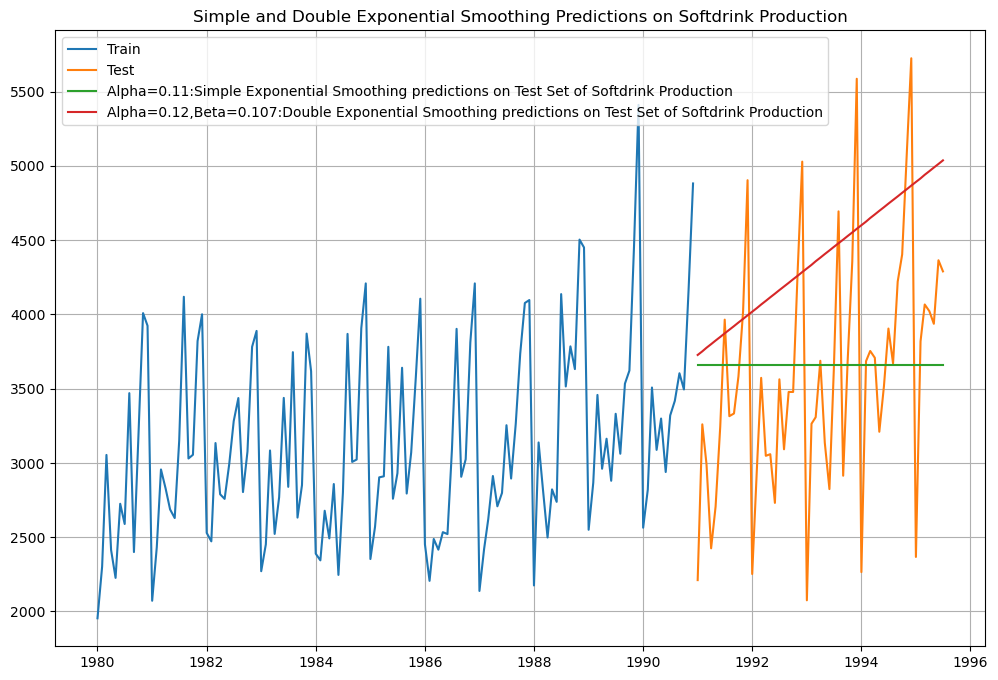

In [100]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train_softdrink, label='Train')
plt.plot(test_softdrink, label='Test')

plt.plot(SES_predict_softdrink, label='Alpha=0.11:Simple Exponential Smoothing predictions on Test Set of Softdrink Production')
plt.plot(DES_predict_softdrink, label='Alpha=0.12,Beta=0.107:Double Exponential Smoothing predictions on Test Set of Softdrink Production')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions on Softdrink Production')

In [101]:
rmse_model02_test_shoe = mean_squared_error(test_shoe.values,DES_predict_shoe.values,squared=False)
print('DES RMSE:',rmse_model02_test_shoe)

DES RMSE: 266.16120808183047


In [102]:
rmse_model02_test_softdrink = mean_squared_error(test_softdrink.values,DES_predict_softdrink.values,squared=False)
print('DES RMSE:',rmse_model02_test_softdrink)

DES RMSE: 1074.3291531501832


In [103]:
resultsDf02 = pd.DataFrame({'Test RMSE': rmse_model02_test_shoe},index=['Alpha=0.11,Beta = 0.0002,DES on Shoe Sales'])
resultsDf02

Test RMSE
Alpha=0.11,Beta = 0.0002,DES on Shoe Sales  266.161208

In [104]:
resultsDf03 = pd.DataFrame({'Test RMSE': rmse_model02_test_softdrink},index=['Alpha=0.59,Beta = 0.107,DES on Softdrink Production'])
resultsDf03

Test RMSE
Alpha=0.59,Beta = 0.107,DES on Softdrink Produc...  1074.329153

In [105]:
resultsDf = pd.concat([resultsDf,resultsDf02, resultsDf03])
resultsDf

Test RMSE
Alpha=0.60,SES on Shoe Sales                         196.404836
Alpha=0.11,SES on Softdrink Production               809.501640
Alpha=0.11,Beta = 0.0002,DES on Shoe Sales           266.161208
Alpha=0.59,Beta = 0.107,DES on Softdrink Produc...  1074.329153

# Holt - Winters ETS (Triple Exponential Smoothing with Additive Seasonality)

In [106]:
# Initializing the Triple Exponential Smoothing Model
model_TES_shoe = ExponentialSmoothing(train_shoe,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES_shoe = model_TES_shoe.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters on Shoe Sales==')
print('')
print(model_TES_shoe.params)

C:\Users\priya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



==Holt Winters model Exponential Smoothing Estimated Parameters on Shoe Sales==

{'smoothing_level': 0.5707142857142857, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.29372180451127816, 'damping_trend': nan, 'initial_level': 116.47499999999994, 'initial_trend': 1.6939393939394016, 'initial_seasons': array([-11.20138889, -14.06597222,   1.11111111,  -5.25347222,
       -21.42013889, -11.18055556, -10.83680556,  18.14236111,
        -2.53472222, -12.53472222,  28.90277778,  40.87152778]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [107]:
# Initializing the Triple Exponential Smoothing Model
model_TES_softdrink = ExponentialSmoothing(train_softdrink,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES_softdrink = model_TES_softdrink.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters on Softdrink Production==')
print('')
print(model_TES_softdrink.params)

C:\Users\priya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



==Holt Winters model Exponential Smoothing Estimated Parameters on Softdrink Production==

{'smoothing_level': 0.14628214287204402, 'smoothing_trend': 0.03985523474431963, 'smoothing_seasonal': 0.2624197351602548, 'damping_trend': nan, 'initial_level': 2803.214611111109, 'initial_trend': 7.179638888889087, 'initial_seasons': array([-687.29896528, -582.87175694,  -55.66104861, -365.74079861,
       -253.26738194, -196.41738194,  -32.54725694,  690.31611806,
       -282.20021528,   44.75545139,  867.40386806,  853.53236806]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [108]:
# Forecasting using this model for the duration of the test set
TES_predict_shoe =  model_TES_shoe.forecast(len(test_shoe))
TES_predict_shoe

1991-01-01    219.083658
1991-02-01    213.816321
1991-03-01    246.658224
1991-04-01    267.260236
1991-05-01    287.719744
1991-06-01    286.532259
1991-07-01    380.493545
1991-08-01    339.555860
1991-09-01    372.342545
1991-10-01    344.012031
1991-11-01    392.660570
1991-12-01    483.619562
1992-01-01    239.374793
1992-02-01    234.107456
1992-03-01    266.949358
1992-04-01    287.551371
1992-05-01    308.010879
1992-06-01    306.823393
1992-07-01    400.784679
1992-08-01    359.846995
1992-09-01    392.633680
1992-10-01    364.303165
1992-11-01    412.951705
1992-12-01    503.910697
1993-01-01    259.665928
1993-02-01    254.398590
1993-03-01    287.240493
1993-04-01    307.842506
1993-05-01    328.302014
1993-06-01    327.114528
1993-07-01    421.075814
1993-08-01    380.138129
1993-09-01    412.924815
1993-10-01    384.594300
1993-11-01    433.242840
1993-12-01    524.201832
1994-01-01    279.957063
1994-02-01    274.689725
1994-03-01    307.531628
1994-04-01    328.133640


In [109]:
# Forecasting using this model for the duration of the test set
TES_predict_softdrink =  model_TES_softdrink.forecast(len(test_softdrink))
TES_predict_softdrink

1991-01-01    2573.415543
1991-02-01    2891.897210
1991-03-01    3287.593195
1991-04-01    2999.142548
1991-05-01    3206.039305
1991-06-01    3006.265950
1991-07-01    3541.746047
1991-08-01    3623.036399
1991-09-01    3615.247075
1991-10-01    3664.034781
1991-11-01    4383.017533
1991-12-01    4761.313125
1992-01-01    2626.715237
1992-02-01    2945.196904
1992-03-01    3340.892889
1992-04-01    3052.442242
1992-05-01    3259.338999
1992-06-01    3059.565644
1992-07-01    3595.045740
1992-08-01    3676.336093
1992-09-01    3668.546769
1992-10-01    3717.334475
1992-11-01    4436.317227
1992-12-01    4814.612818
1993-01-01    2680.014931
1993-02-01    2998.496597
1993-03-01    3394.192583
1993-04-01    3105.741935
1993-05-01    3312.638693
1993-06-01    3112.865338
1993-07-01    3648.345434
1993-08-01    3729.635787
1993-09-01    3721.846463
1993-10-01    3770.634169
1993-11-01    4489.616921
1993-12-01    4867.912512
1994-01-01    2733.314625
1994-02-01    3051.796291
1994-03-01  

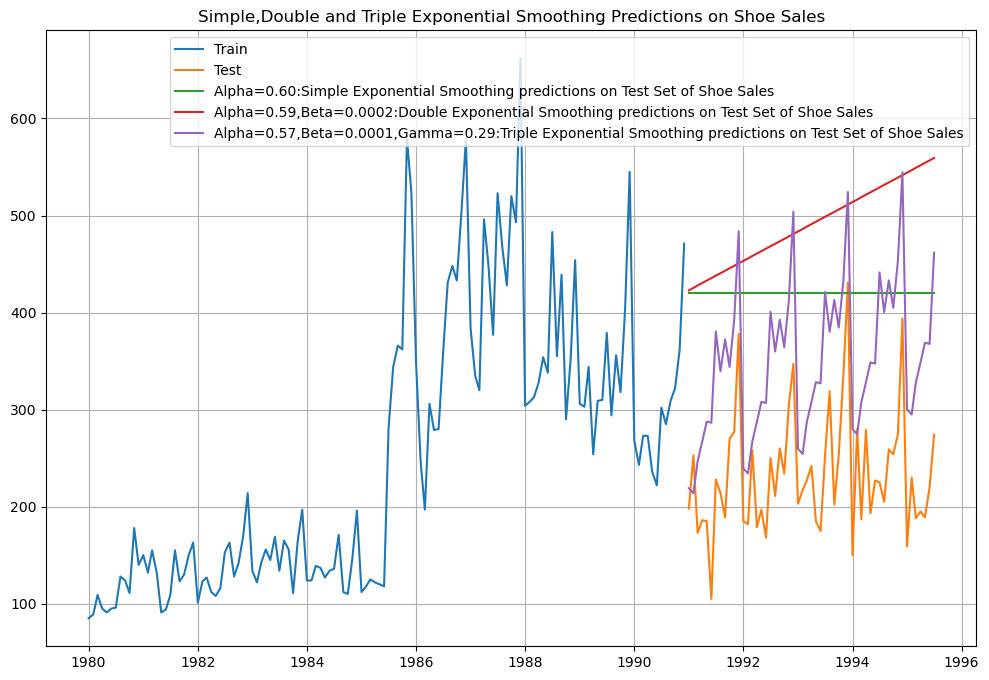

In [110]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train_shoe, label='Train')
plt.plot(test_shoe, label='Test')

plt.plot(SES_predict_shoe, label='Alpha=0.60:Simple Exponential Smoothing predictions on Test Set of Shoe Sales')
plt.plot(DES_predict_shoe, label='Alpha=0.59,Beta=0.0002:Double Exponential Smoothing predictions on Test Set of Shoe Sales')
plt.plot(TES_predict_shoe, label='Alpha=0.57,Beta=0.0001,Gamma=0.29:Triple Exponential Smoothing predictions on Test Set of Shoe Sales')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions on Shoe Sales');

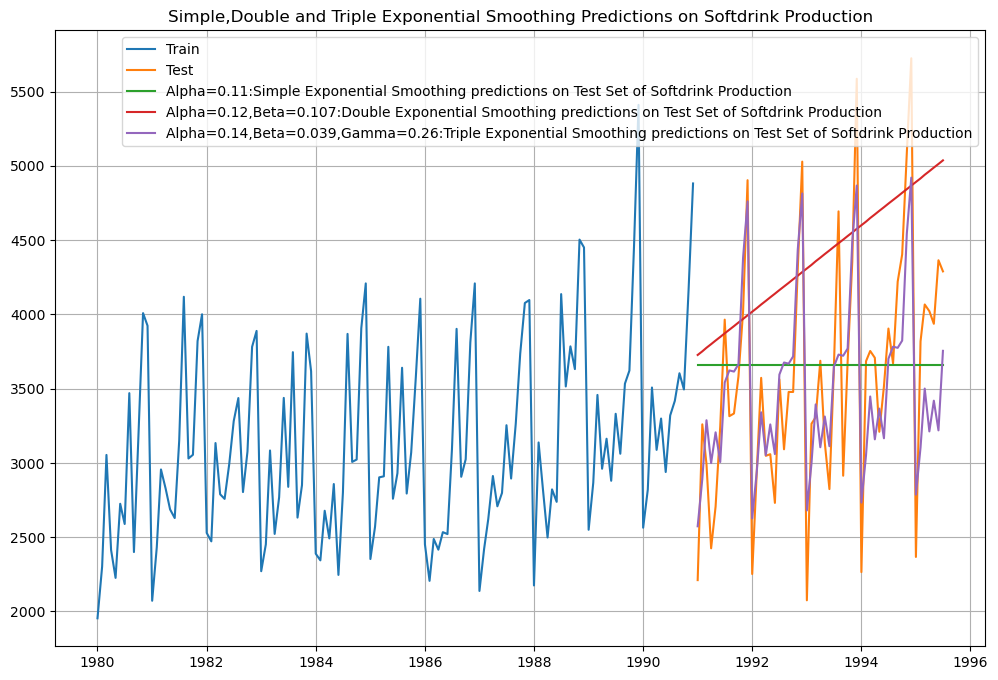

In [111]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train_softdrink, label='Train')
plt.plot(test_softdrink, label='Test')

plt.plot(SES_predict_softdrink, label='Alpha=0.11:Simple Exponential Smoothing predictions on Test Set of Softdrink Production')
plt.plot(DES_predict_softdrink, label='Alpha=0.12,Beta=0.107:Double Exponential Smoothing predictions on Test Set of Softdrink Production')
plt.plot(TES_predict_softdrink, label='Alpha=0.14,Beta=0.039,Gamma=0.26:Triple Exponential Smoothing predictions on Test Set of Softdrink Production')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions on Softdrink Production');

In [112]:
rmse_model03_test_shoe = mean_squared_error(test_shoe.values,TES_predict_shoe.values,squared=False)
print('TES RMSE:',rmse_model03_test_shoe)
resultsDf04 = pd.DataFrame({'Test RMSE': rmse_model03_test_shoe},index=['Alpha=0.57,Beta = 0.0001,Gamma = 0.29,TES with Additive Seasonlity on Shoe Sales'])
resultsDf04

TES RMSE: 128.99252592312354


Test RMSE
Alpha=0.57,Beta = 0.0001,Gamma = 0.29,TES with ...  128.992526

In [113]:
rmse_model03_test_softdrink = mean_squared_error(test_softdrink.values,TES_predict_softdrink.values,squared=False)
print('TES RMSE:',rmse_model03_test_softdrink)
resultsDf05 = pd.DataFrame({'Test RMSE': rmse_model03_test_softdrink},index=['Alpha=0.14,Beta = 0.039,Gamma = 0.26,TES with Additive Seasonlity on Softdrink Production'])
resultsDf05

TES RMSE: 458.9653920540907


Test RMSE
Alpha=0.14,Beta = 0.039,Gamma = 0.26,TES with A...  458.965392

In [114]:
resultsDf = pd.concat([resultsDf,resultsDf04,resultsDf05])
resultsDf

Test RMSE
Alpha=0.60,SES on Shoe Sales                         196.404836
Alpha=0.11,SES on Softdrink Production               809.501640
Alpha=0.11,Beta = 0.0002,DES on Shoe Sales           266.161208
Alpha=0.59,Beta = 0.107,DES on Softdrink Produc...  1074.329153
Alpha=0.57,Beta = 0.0001,Gamma = 0.29,TES with ...   128.992526
Alpha=0.14,Beta = 0.039,Gamma = 0.26,TES with A...   458.965392

## Holt - Winters ETS (Triple Exponential Smoothing with Multiplicative Seasonality)

In [115]:
# Initializing the Triple Exponential Smoothing Mhttp://localhost:8888/notebooks/TimeSeries%20-%20Jupyter.ipynb#Holt---Winters-ETS-(Triple-Exponential-Smoothing-with-Multiplicative-Seasonality)odel
model_TES_am_shoe = ExponentialSmoothing(train_shoe,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am_shoe = model_TES_am_shoe.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters on Shoe Sales ==')
print('')
print(model_TES_am_shoe.params)

C:\Users\priya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



==Holt Winters model Exponential Smoothing Estimated Parameters on Shoe Sales ==

{'smoothing_level': 0.5711286329525818, 'smoothing_trend': 0.00014781930867568429, 'smoothing_seasonal': 0.20294733706077994, 'damping_trend': nan, 'initial_level': 116.35529208070726, 'initial_trend': 0.11219854465675648, 'initial_seasons': array([1.05679343, 1.01130311, 1.2337466 , 1.40663129, 1.32162715,
       1.07936886, 1.18018187, 1.50183082, 1.72369093, 1.4704132 ,
       1.75485304, 1.92101444]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [116]:
# Initializing the Triple Exponential Smoothing Model
model_TES_am_softdrink = ExponentialSmoothing(train_softdrink,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am_softdrink = model_TES_am_softdrink.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters on Softdrink Production ==')
print('')
print(model_TES_am_softdrink.params)

C:\Users\priya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



==Holt Winters model Exponential Smoothing Estimated Parameters on Softdrink Production ==

{'smoothing_level': 0.11128429736328378, 'smoothing_trend': 0.04947326762762311, 'smoothing_seasonal': 0.23037194388521623, 'damping_trend': nan, 'initial_level': 2803.0168193984414, 'initial_trend': 10.486286228443715, 'initial_seasons': array([0.80284001, 0.86968748, 1.08266033, 0.93954787, 0.96331944,
       0.98854326, 1.0654188 , 1.28504436, 1.0083707 , 1.0929922 ,
       1.36460606, 1.41709466]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [117]:
# Forecasting using this model for the duration of the test set
TES_predict_am_shoe =  model_TES_am_shoe.forecast(len(test_shoe))
TES_predict_am_shoe

1991-01-01    261.342543
1991-02-01    243.085370
1991-03-01    256.996702
1991-04-01    270.198135
1991-05-01    267.375606
1991-06-01    256.946321
1991-07-01    339.585163
1991-08-01    315.726553
1991-09-01    340.179286
1991-10-01    314.977543
1991-11-01    376.103895
1991-12-01    466.476288
1992-01-01    263.151144
1992-02-01    244.766655
1992-03-01    258.773180
1992-04-01    272.064791
1992-05-01    269.221701
1992-06-01    258.719386
1992-07-01    341.927133
1992-08-01    317.902729
1992-09-01    342.522659
1992-10-01    317.146066
1992-11-01    378.691770
1992-12-01    469.684153
1993-01-01    264.959745
1993-02-01    246.447939
1993-03-01    260.549657
1993-04-01    273.931448
1993-05-01    271.067795
1993-06-01    260.492451
1993-07-01    344.269103
1993-08-01    320.078906
1993-09-01    344.866033
1993-10-01    319.314589
1993-11-01    381.279644
1993-12-01    472.892017
1994-01-01    266.768347
1994-02-01    248.129224
1994-03-01    262.326135
1994-04-01    275.798104


In [118]:
# Forecasting using this model for the duration of the test set
TES_predict_am_softdrink =  model_TES_am_softdrink.forecast(len(test_softdrink))
TES_predict_am_softdrink

1991-01-01    2564.869242
1991-02-01    2887.850537
1991-03-01    3300.056912
1991-04-01    3007.348662
1991-05-01    3213.743610
1991-06-01    3020.085798
1991-07-01    3573.891809
1991-08-01    3716.166910
1991-09-01    3598.070539
1991-10-01    3680.517441
1991-11-01    4458.769326
1991-12-01    4868.950881
1992-01-01    2605.675007
1992-02-01    2933.733938
1992-03-01    3352.420293
1992-04-01    3055.004505
1992-05-01    3264.602921
1992-06-01    3067.817416
1992-07-01    3630.301883
1992-08-01    3774.745594
1992-09-01    3654.713240
1992-10-01    3738.382153
1992-11-01    4528.777911
1992-12-01    4945.299961
1993-01-01    2646.480772
1993-02-01    2979.617340
1993-03-01    3404.783674
1993-04-01    3102.660348
1993-05-01    3315.462232
1993-06-01    3115.549035
1993-07-01    3686.711956
1993-08-01    3833.324277
1993-09-01    3711.355941
1993-10-01    3796.246865
1993-11-01    4598.786495
1993-12-01    5021.649041
1994-01-01    2687.286537
1994-02-01    3025.500741
1994-03-01  

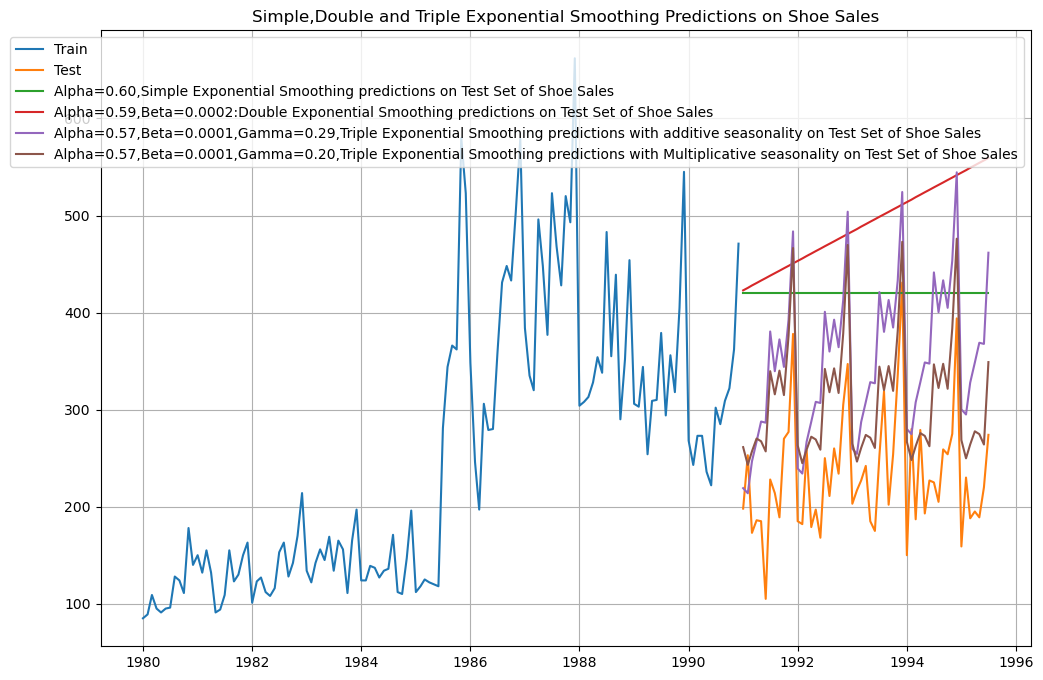

In [119]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train_shoe, label='Train')
plt.plot(test_shoe, label='Test')

plt.plot(SES_predict_shoe, label='Alpha=0.60,Simple Exponential Smoothing predictions on Test Set of Shoe Sales')
plt.plot(DES_predict_shoe, label='Alpha=0.59,Beta=0.0002:Double Exponential Smoothing predictions on Test Set of Shoe Sales')
plt.plot(TES_predict_shoe, label='Alpha=0.57,Beta=0.0001,Gamma=0.29,Triple Exponential Smoothing predictions with additive seasonality on Test Set of Shoe Sales')
plt.plot(TES_predict_am_shoe, label='Alpha=0.57,Beta=0.0001,Gamma=0.20,Triple Exponential Smoothing predictions with Multiplicative seasonality on Test Set of Shoe Sales')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions on Shoe Sales');

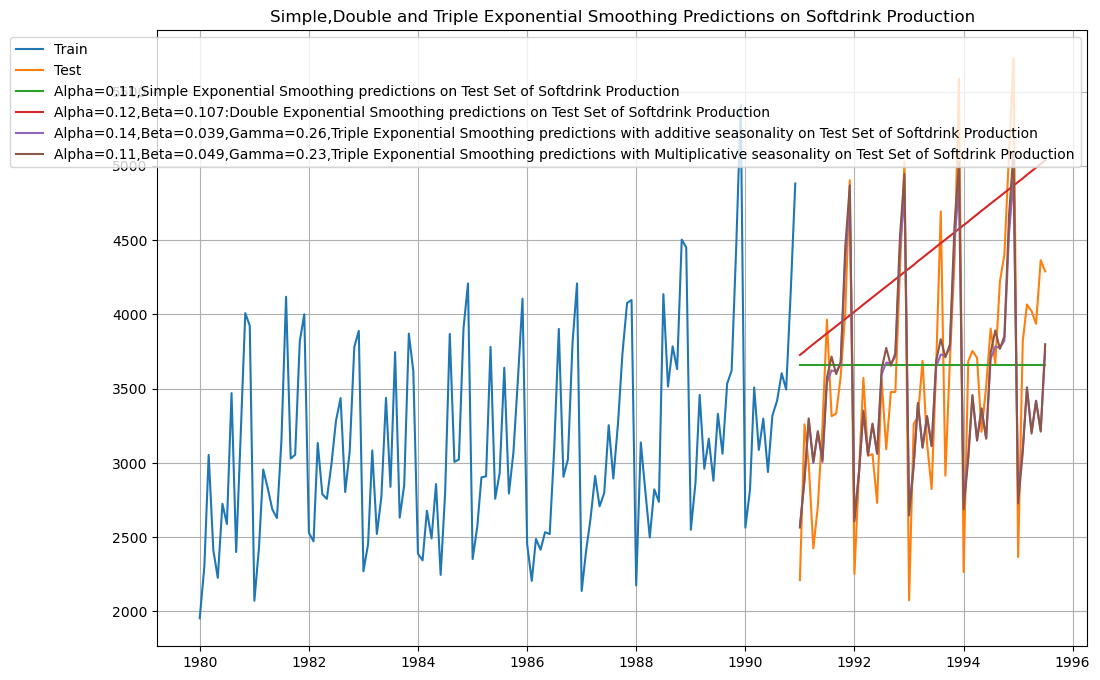

In [120]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train_softdrink, label='Train')
plt.plot(test_softdrink, label='Test')

plt.plot(SES_predict_softdrink, label='Alpha=0.11,Simple Exponential Smoothing predictions on Test Set of Softdrink Production')
plt.plot(DES_predict_softdrink, label='Alpha=0.12,Beta=0.107:Double Exponential Smoothing predictions on Test Set of Softdrink Production')
plt.plot(TES_predict_softdrink, label='Alpha=0.14,Beta=0.039,Gamma=0.26,Triple Exponential Smoothing predictions with additive seasonality on Test Set of Softdrink Production')
plt.plot(TES_predict_am_softdrink, label='Alpha=0.11,Beta=0.049,Gamma=0.23,Triple Exponential Smoothing predictions with Multiplicative seasonality on Test Set of Softdrink Production')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions on Softdrink Production');

In [121]:
rmse_model04_test_shoe = mean_squared_error(test_shoe.values,TES_predict_am_shoe.values,squared=False)
print('TES RMSE:',rmse_model04_test_shoe)
resultsDf06 = pd.DataFrame({'Test RMSE': rmse_model04_test_shoe},index=['Alpha=0.57,Beta = 0.0001,Gamma = 0.20,TES with Multiplicative Seasonality on Shoe Sales'])
resultsDf06

TES RMSE: 83.734048494837


Test RMSE
Alpha=0.57,Beta = 0.0001,Gamma = 0.20,TES with ...  83.734048

In [122]:
rmse_model04_test_softdrink = mean_squared_error(test_softdrink.values,TES_predict_am_softdrink.values,squared=False)
print('TES RMSE:',rmse_model04_test_softdrink)
resultsDf07 = pd.DataFrame({'Test RMSE': rmse_model04_test_softdrink},index=['Alpha=0.11,Beta = 0.049,Gamma = 0.23,TES with Multiplicative Seasonality on Softdrink Production'])
resultsDf07

TES RMSE: 447.7225807439294


Test RMSE
Alpha=0.11,Beta = 0.049,Gamma = 0.23,TES with M...  447.722581

In [123]:
resultsDf = pd.concat([resultsDf,resultsDf06,resultsDf07])
resultsDf

Test RMSE
Alpha=0.60,SES on Shoe Sales                         196.404836
Alpha=0.11,SES on Softdrink Production               809.501640
Alpha=0.11,Beta = 0.0002,DES on Shoe Sales           266.161208
Alpha=0.59,Beta = 0.107,DES on Softdrink Produc...  1074.329153
Alpha=0.57,Beta = 0.0001,Gamma = 0.29,TES with ...   128.992526
Alpha=0.14,Beta = 0.039,Gamma = 0.26,TES with A...   458.965392
Alpha=0.57,Beta = 0.0001,Gamma = 0.20,TES with ...    83.734048
Alpha=0.11,Beta = 0.049,Gamma = 0.23,TES with M...   447.722581

### Building different models and comparing the accuracy metrics

#### Model 1: Linear Regression

In [124]:
train_shoe_time = [i+1 for i in range(len(train_shoe))]
test_shoe_time = [i+133 for i in range(len(test_shoe))]
print('Training Time instance','\n',train_shoe_time)
print('Test Time instance','\n',test_shoe_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [125]:
train_softdrink_time = [k+1 for k in range(len(train_softdrink))]
test_softdrink_time = [k+133 for k in range(len(test_softdrink))]
print('Training Time instance','\n',train_softdrink_time)
print('Test Time instance','\n',test_softdrink_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [126]:
LinearRegression_train_shoe = train_shoe.copy()
LinearRegression_test_shoe = test_shoe.copy()

In [127]:
LinearRegression_train_softdrink = train_softdrink.copy()
LinearRegression_test_softdrink = test_softdrink.copy()

In [128]:
LinearRegression_train_shoe['time'] = train_shoe_time
LinearRegression_test_shoe['time'] = test_shoe_time

print('First few rows of Shoe Sales Training Data')
display(LinearRegression_train_shoe.head())
print('Last few rows of Shoe Sales Training Data')
display(LinearRegression_train_shoe.tail())
print('First few rows of Shoe Sales Test Data')
display(LinearRegression_test_shoe.head())
print('Last few rows of Shoe Sales Test Data')
display(LinearRegression_test_shoe.tail())

First few rows of Shoe Sales Training Data


Shoe_Sales  time
YearMonth                   
1980-01-01          85     1
1980-02-01          89     2
1980-03-01         109     3
1980-04-01          95     4
1980-05-01          91     5

Last few rows of Shoe Sales Training Data


Shoe_Sales  time
YearMonth                   
1990-08-01         285   128
1990-09-01         309   129
1990-10-01         322   130
1990-11-01         362   131
1990-12-01         471   132

First few rows of Shoe Sales Test Data


Shoe_Sales  time
YearMonth                   
1991-01-01         198   133
1991-02-01         253   134
1991-03-01         173   135
1991-04-01         186   136
1991-05-01         185   137

Last few rows of Shoe Sales Test Data


Shoe_Sales  time
YearMonth                   
1995-03-01         188   183
1995-04-01         195   184
1995-05-01         189   185
1995-06-01         220   186
1995-07-01         274   187

In [129]:
LinearRegression_train_softdrink['time'] = train_softdrink_time
LinearRegression_test_softdrink['time'] = test_softdrink_time

print('First few rows of Softdrink production Training Data')
display(LinearRegression_train_softdrink.head())
print('Last few rows of Softdrink production Training Data')
display(LinearRegression_train_softdrink.tail())
print('First few rows of Softdrink production Test Data')
display(LinearRegression_test_softdrink.head())
print('Last few rows of Softdrink production Test Data')
display(LinearRegression_test_softdrink.tail())

First few rows of Softdrink production Training Data


SoftDrinkProduction  time
YearMonth                            
1980-01-01                 1954     1
1980-02-01                 2302     2
1980-03-01                 3054     3
1980-04-01                 2414     4
1980-05-01                 2226     5

Last few rows of Softdrink production Training Data


SoftDrinkProduction  time
YearMonth                            
1990-08-01                 3418   128
1990-09-01                 3604   129
1990-10-01                 3495   130
1990-11-01                 4163   131
1990-12-01                 4882   132

First few rows of Softdrink production Test Data


SoftDrinkProduction  time
YearMonth                            
1991-01-01                 2211   133
1991-02-01                 3260   134
1991-03-01                 2992   135
1991-04-01                 2425   136
1991-05-01                 2707   137

Last few rows of Softdrink production Test Data


SoftDrinkProduction  time
YearMonth                            
1995-03-01                 4067   183
1995-04-01                 4022   184
1995-05-01                 3937   185
1995-06-01                 4365   186
1995-07-01                 4290   187

In [130]:
from sklearn.linear_model import LinearRegression

In [131]:
lr1 = LinearRegression()

In [132]:
lr1.fit(LinearRegression_train_shoe[['time']],LinearRegression_train_shoe['Shoe_Sales'])

LinearRegression()

In [133]:
lr2 = LinearRegression()

In [134]:
lr2.fit(LinearRegression_train_softdrink[['time']],LinearRegression_train_softdrink['SoftDrinkProduction'])

LinearRegression()

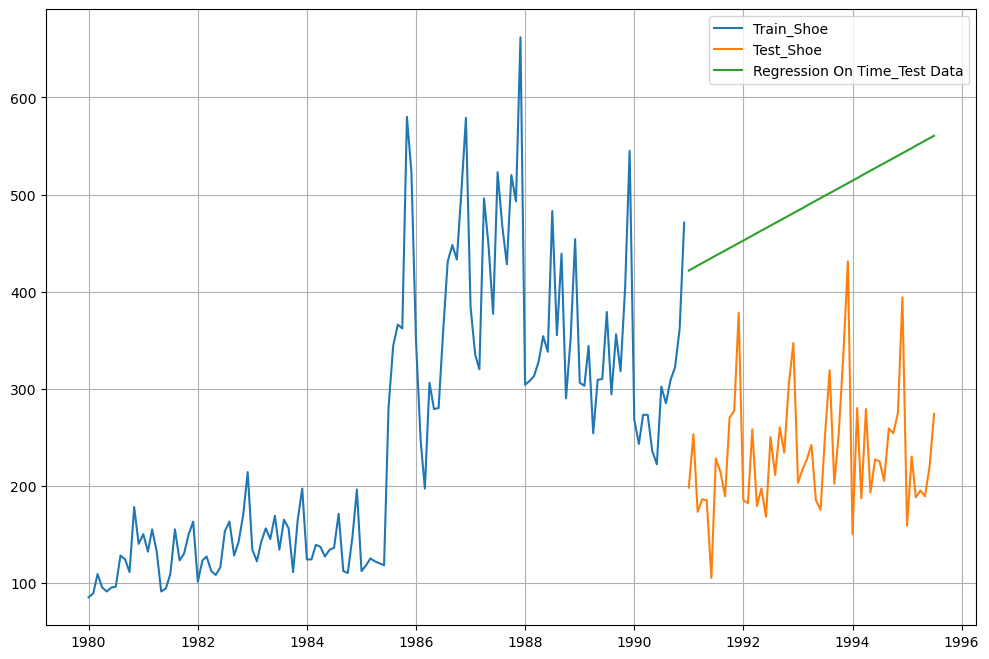

In [135]:
train_shoe_predictions_model1         = lr1.predict(LinearRegression_train_shoe[['time']])
LinearRegression_train_shoe['RegOnTime'] = train_shoe_predictions_model1

test_shoe_predictions_model1         = lr1.predict(LinearRegression_test_shoe[['time']])
LinearRegression_test_shoe['RegOnTime'] = test_shoe_predictions_model1

plt.plot( train_shoe['Shoe_Sales'], label='Train_Shoe')
plt.plot(test_shoe['Shoe_Sales'], label='Test_Shoe')
plt.plot(LinearRegression_test_shoe['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

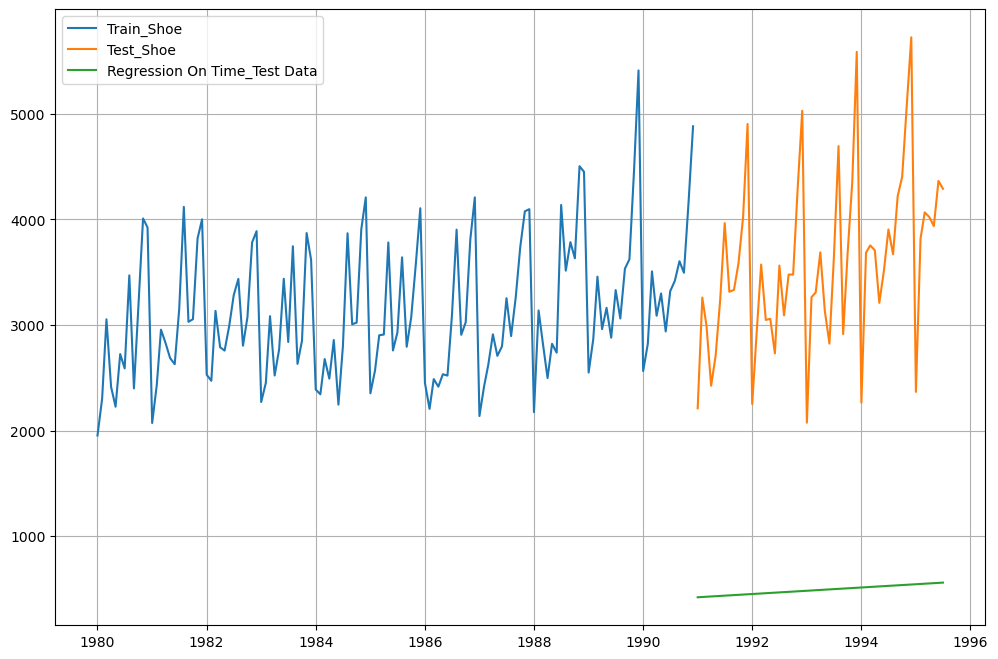

In [136]:
train_softdrink_predictions_model1         = lr1.predict(LinearRegression_train_softdrink[['time']])
LinearRegression_train_softdrink['RegOnTime'] = train_shoe_predictions_model1

test_softdrink_predictions_model1         = lr1.predict(LinearRegression_test_softdrink[['time']])
LinearRegression_test_softdrink['RegOnTime'] = test_softdrink_predictions_model1

plt.plot( train_softdrink['SoftDrinkProduction'], label='Train_Shoe')
plt.plot(test_softdrink['SoftDrinkProduction'], label='Test_Shoe')
plt.plot(LinearRegression_test_softdrink['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [137]:
from sklearn import metrics

In [138]:
rmse_model1_test_shoe = metrics.mean_squared_error(test_shoe['Shoe_Sales'],test_shoe_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Shoe Sales Test Data,  RMSE is %3.3f " %(rmse_model1_test_shoe))

For RegressionOnTime forecast on the Shoe Sales Test Data,  RMSE is 266.276 


In [139]:
resultsDf1 = pd.DataFrame({'Test RMSE': [rmse_model1_test_shoe]},index=['RegressionOnTime for Shoe Sales'])
resultsDf1

Test RMSE
RegressionOnTime for Shoe Sales  266.276472

In [140]:
rmse_model1_test_softdrink = metrics.mean_squared_error(test_softdrink['SoftDrinkProduction'],test_softdrink_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Softdrink production Test Data,  RMSE is %3.3f " %(rmse_model1_test_softdrink))

For RegressionOnTime forecast on the Softdrink production Test Data,  RMSE is 3202.844 


In [141]:
resultsDf2 = pd.DataFrame({'Test RMSE': [rmse_model1_test_softdrink]},index=['RegressionOnTime for Softdrink production'])
resultsDf2

Test RMSE
RegressionOnTime for Softdrink production  3202.844447

In [142]:
resultsDf = pd.concat([resultsDf, resultsDf1, resultsDf2])
resultsDf

Test RMSE
Alpha=0.60,SES on Shoe Sales                         196.404836
Alpha=0.11,SES on Softdrink Production               809.501640
Alpha=0.11,Beta = 0.0002,DES on Shoe Sales           266.161208
Alpha=0.59,Beta = 0.107,DES on Softdrink Produc...  1074.329153
Alpha=0.57,Beta = 0.0001,Gamma = 0.29,TES with ...   128.992526
Alpha=0.14,Beta = 0.039,Gamma = 0.26,TES with A...   458.965392
Alpha=0.57,Beta = 0.0001,Gamma = 0.20,TES with ...    83.734048
Alpha=0.11,Beta = 0.049,Gamma = 0.23,TES with M...   447.722581
RegressionOnTime for Shoe Sales                      266.276472
RegressionOnTime for Softdrink production           3202.844447

#### Model 2: Naive Approach: y^t+1=yt

In [143]:
NaiveModel_train_shoe = train_shoe.copy()
NaiveModel_test_shoe = test_shoe.copy()

In [144]:
train_shoe.tail()

Shoe_Sales
YearMonth             
1990-08-01         285
1990-09-01         309
1990-10-01         322
1990-11-01         362
1990-12-01         471

In [145]:
NaiveModel_test_shoe['naive'] = np.asarray(train_shoe['Shoe_Sales'])[len(np.asarray(train_shoe['Shoe_Sales']))-1]
NaiveModel_test_shoe['naive'].head()

YearMonth
1991-01-01    471
1991-02-01    471
1991-03-01    471
1991-04-01    471
1991-05-01    471
Name: naive, dtype: int64

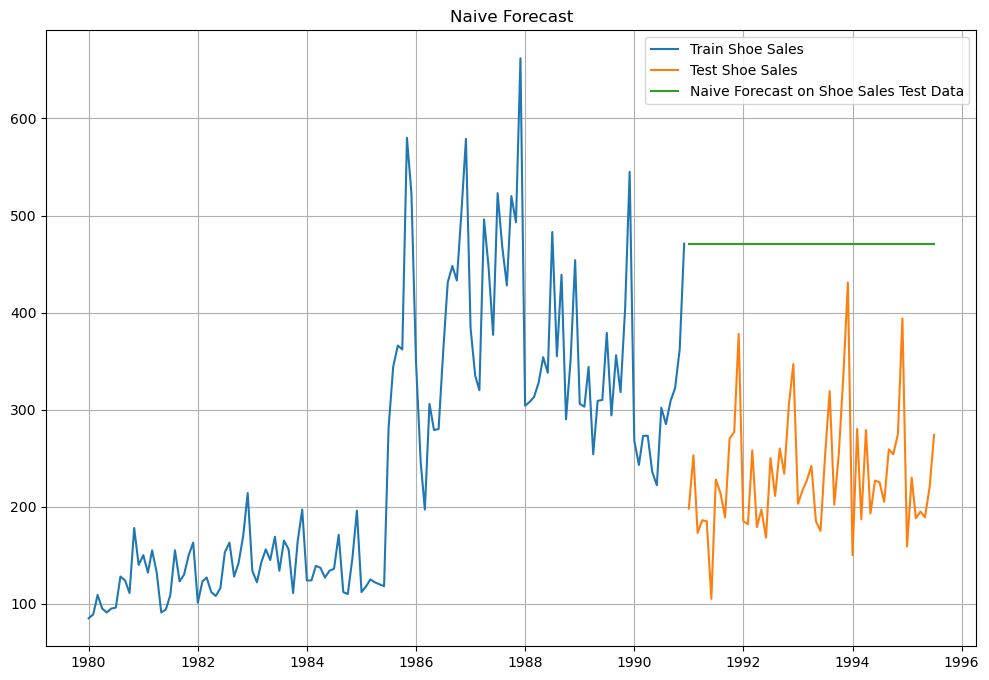

In [146]:
plt.plot(NaiveModel_train_shoe['Shoe_Sales'], label='Train Shoe Sales')
plt.plot(test_shoe['Shoe_Sales'], label='Test Shoe Sales')

plt.plot(NaiveModel_test_shoe['naive'], label='Naive Forecast on Shoe Sales Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [147]:
rmse_model2_test_shoe = metrics.mean_squared_error(test_shoe['Shoe_Sales'],NaiveModel_test_shoe['naive'],squared=False)
print("For Naive forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test_shoe))

For Naive forecast on the Test Data,  RMSE is 245.121


In [148]:
resultsDf3 = pd.DataFrame({'Test RMSE': [rmse_model2_test_shoe]},index=['NaiveModel on Shoe Sales'])

resultsDf = pd.concat([resultsDf, resultsDf3])
resultsDf

Test RMSE
Alpha=0.60,SES on Shoe Sales                         196.404836
Alpha=0.11,SES on Softdrink Production               809.501640
Alpha=0.11,Beta = 0.0002,DES on Shoe Sales           266.161208
Alpha=0.59,Beta = 0.107,DES on Softdrink Produc...  1074.329153
Alpha=0.57,Beta = 0.0001,Gamma = 0.29,TES with ...   128.992526
Alpha=0.14,Beta = 0.039,Gamma = 0.26,TES with A...   458.965392
Alpha=0.57,Beta = 0.0001,Gamma = 0.20,TES with ...    83.734048
Alpha=0.11,Beta = 0.049,Gamma = 0.23,TES with M...   447.722581
RegressionOnTime for Shoe Sales                      266.276472
RegressionOnTime for Softdrink production           3202.844447
NaiveModel on Shoe Sales                             245.121306

In [149]:
NaiveModel_train_softdrink = train_softdrink.copy()
NaiveModel_test_softdrink = test_softdrink.copy()

In [150]:
train_softdrink.tail()

SoftDrinkProduction
YearMonth                      
1990-08-01                 3418
1990-09-01                 3604
1990-10-01                 3495
1990-11-01                 4163
1990-12-01                 4882

In [151]:
NaiveModel_test_softdrink['naive'] = np.asarray(train_softdrink['SoftDrinkProduction'])[len(np.asarray(train_softdrink['SoftDrinkProduction']))-1]
NaiveModel_test_softdrink['naive'].head()

YearMonth
1991-01-01    4882
1991-02-01    4882
1991-03-01    4882
1991-04-01    4882
1991-05-01    4882
Name: naive, dtype: int64

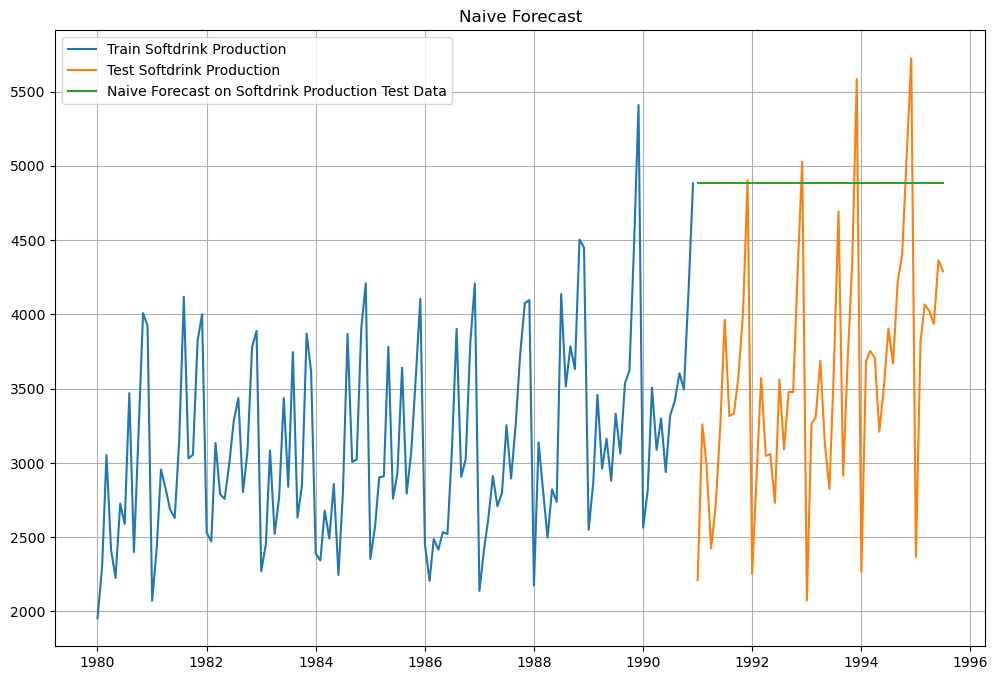

In [152]:
plt.plot(NaiveModel_train_softdrink['SoftDrinkProduction'], label='Train Softdrink Production')
plt.plot(test_softdrink['SoftDrinkProduction'], label='Test Softdrink Production')

plt.plot(NaiveModel_test_softdrink['naive'], label='Naive Forecast on Softdrink Production Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [153]:
rmse_model3_test_softdrink = metrics.mean_squared_error(test_softdrink['SoftDrinkProduction'],NaiveModel_test_softdrink['naive'],squared=False)
print("For Naive forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test_softdrink))

For Naive forecast on the Test Data,  RMSE is 1519.259


In [154]:
resultsDf4 = pd.DataFrame({'Test RMSE': [rmse_model3_test_softdrink]},index=['NaiveModel on Softdrink production'])

resultsDf = pd.concat([resultsDf, resultsDf4])
resultsDf

Test RMSE
Alpha=0.60,SES on Shoe Sales                         196.404836
Alpha=0.11,SES on Softdrink Production               809.501640
Alpha=0.11,Beta = 0.0002,DES on Shoe Sales           266.161208
Alpha=0.59,Beta = 0.107,DES on Softdrink Produc...  1074.329153
Alpha=0.57,Beta = 0.0001,Gamma = 0.29,TES with ...   128.992526
Alpha=0.14,Beta = 0.039,Gamma = 0.26,TES with A...   458.965392
Alpha=0.57,Beta = 0.0001,Gamma = 0.20,TES with ...    83.734048
Alpha=0.11,Beta = 0.049,Gamma = 0.23,TES with M...   447.722581
RegressionOnTime for Shoe Sales                      266.276472
RegressionOnTime for Softdrink production           3202.844447
NaiveModel on Shoe Sales                             245.121306
NaiveModel on Softdrink production                  1519.259233

#### Method 3: Simple Average

In [155]:
SimpleAverage_train_shoe = train_shoe.copy()
SimpleAverage_test_shoe = test_shoe.copy()

In [156]:
SimpleAverage_test_shoe['mean_forecast'] = train_shoe['Shoe_Sales'].mean()
SimpleAverage_test_shoe.head()

Shoe_Sales  mean_forecast
YearMonth                            
1991-01-01         198     250.575758
1991-02-01         253     250.575758
1991-03-01         173     250.575758
1991-04-01         186     250.575758
1991-05-01         185     250.575758

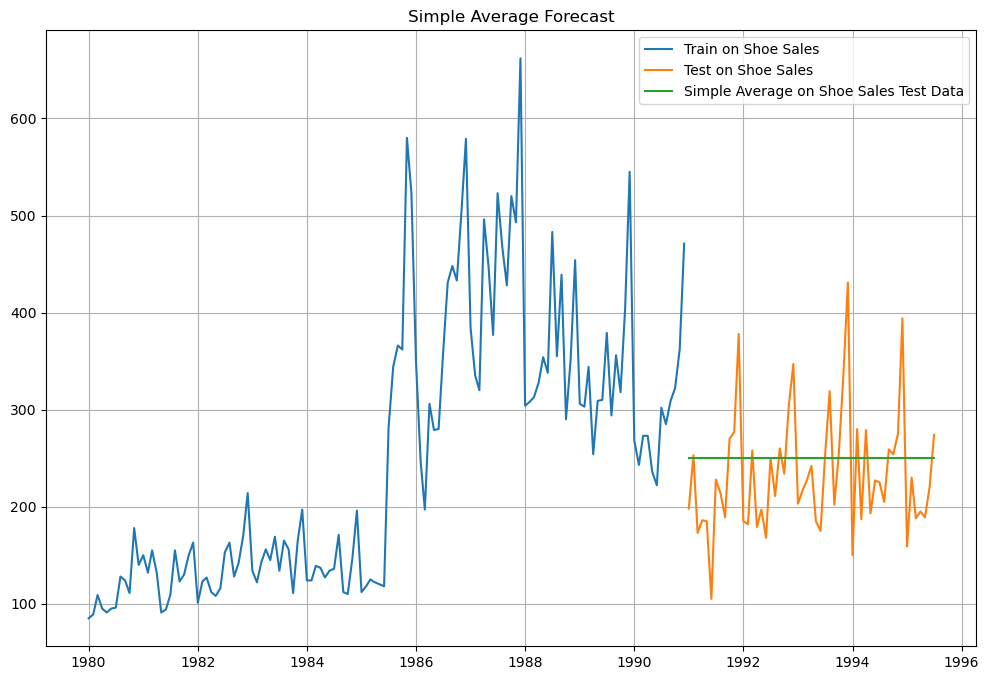

In [157]:
plt.plot(SimpleAverage_train_shoe['Shoe_Sales'], label='Train on Shoe Sales')
plt.plot(SimpleAverage_test_shoe['Shoe_Sales'], label='Test on Shoe Sales')

plt.plot(SimpleAverage_test_shoe['mean_forecast'], label='Simple Average on Shoe Sales Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [158]:
rmse_model4_test_shoe = metrics.mean_squared_error(test_shoe['Shoe_Sales'],SimpleAverage_test_shoe['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_shoe))

For Simple Average forecast on the Test Data,  RMSE is 63.985


In [159]:
SimpleAverage_train_softdrink = train_softdrink.copy()
SimpleAverage_test_softdrink = test_softdrink.copy()

In [160]:
SimpleAverage_test_softdrink['mean_forecast'] = train_softdrink['SoftDrinkProduction'].mean()
SimpleAverage_test_softdrink.head()

SoftDrinkProduction  mean_forecast
YearMonth                                     
1991-01-01                 2211    3124.166667
1991-02-01                 3260    3124.166667
1991-03-01                 2992    3124.166667
1991-04-01                 2425    3124.166667
1991-05-01                 2707    3124.166667

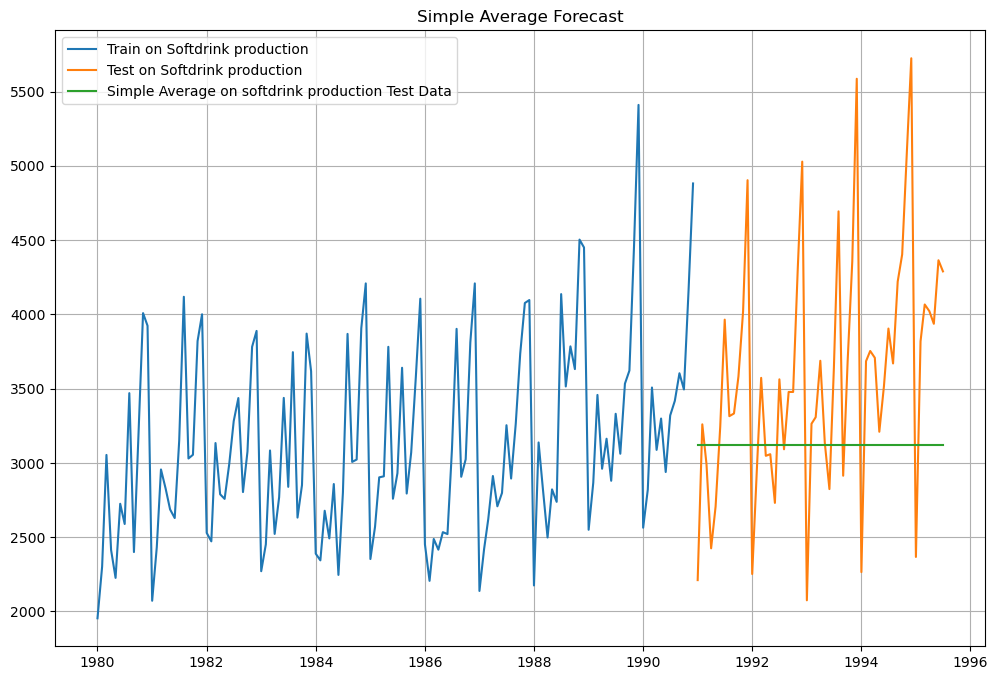

In [161]:
plt.plot(SimpleAverage_train_softdrink['SoftDrinkProduction'], label='Train on Softdrink production')
plt.plot(SimpleAverage_test_softdrink['SoftDrinkProduction'], label='Test on Softdrink production')

plt.plot(SimpleAverage_test_softdrink['mean_forecast'], label='Simple Average on softdrink production Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [162]:
rmse_model4_test_softdrink = metrics.mean_squared_error(test_softdrink['SoftDrinkProduction'],SimpleAverage_test_softdrink['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_softdrink))

For Simple Average forecast on the Test Data,  RMSE is 934.353


In [163]:
resultsDf5 = pd.DataFrame({'Test RMSE': [rmse_model4_test_shoe]},index=['Simple Average on Shoe Sales'])

resultsDf = pd.concat([resultsDf, resultsDf5])
resultsDf

Test RMSE
Alpha=0.60,SES on Shoe Sales                         196.404836
Alpha=0.11,SES on Softdrink Production               809.501640
Alpha=0.11,Beta = 0.0002,DES on Shoe Sales           266.161208
Alpha=0.59,Beta = 0.107,DES on Softdrink Produc...  1074.329153
Alpha=0.57,Beta = 0.0001,Gamma = 0.29,TES with ...   128.992526
Alpha=0.14,Beta = 0.039,Gamma = 0.26,TES with A...   458.965392
Alpha=0.57,Beta = 0.0001,Gamma = 0.20,TES with ...    83.734048
Alpha=0.11,Beta = 0.049,Gamma = 0.23,TES with M...   447.722581
RegressionOnTime for Shoe Sales                      266.276472
RegressionOnTime for Softdrink production           3202.844447
NaiveModel on Shoe Sales                             245.121306
NaiveModel on Softdrink production                  1519.259233
Simple Average on Shoe Sales                          63.984570

In [164]:
resultsDf6 = pd.DataFrame({'Test RMSE': [rmse_model4_test_softdrink]},index=['Simple Average on Softdrink Production'])

resultsDf = pd.concat([resultsDf, resultsDf6])
resultsDf

Test RMSE
Alpha=0.60,SES on Shoe Sales                         196.404836
Alpha=0.11,SES on Softdrink Production               809.501640
Alpha=0.11,Beta = 0.0002,DES on Shoe Sales           266.161208
Alpha=0.59,Beta = 0.107,DES on Softdrink Produc...  1074.329153
Alpha=0.57,Beta = 0.0001,Gamma = 0.29,TES with ...   128.992526
Alpha=0.14,Beta = 0.039,Gamma = 0.26,TES with A...   458.965392
Alpha=0.57,Beta = 0.0001,Gamma = 0.20,TES with ...    83.734048
Alpha=0.11,Beta = 0.049,Gamma = 0.23,TES with M...   447.722581
RegressionOnTime for Shoe Sales                      266.276472
RegressionOnTime for Softdrink production           3202.844447
NaiveModel on Shoe Sales                             245.121306
NaiveModel on Softdrink production                  1519.259233
Simple Average on Shoe Sales                          63.984570
Simple Average on Softdrink Production               934.353358

#### Method 4 : Moving Average

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.
For Moving Average, we are going to average over the entire data.

In [165]:
MovingAverage_shoe = df_shoe_sales.copy()
MovingAverage_shoe.head()

Shoe_Sales
YearMonth             
1980-01-01          85
1980-02-01          89
1980-03-01         109
1980-04-01          95
1980-05-01          91

In [166]:
MovingAverage_softdrink = df_softdrink.copy()
MovingAverage_softdrink.head()

SoftDrinkProduction
YearMonth                      
1980-01-01                 1954
1980-02-01                 2302
1980-03-01                 3054
1980-04-01                 2414
1980-05-01                 2226

Trailing Moving Averages

In [167]:
MovingAverage_shoe['Trailing_2'] = MovingAverage_shoe['Shoe_Sales'].rolling(2).mean()
MovingAverage_shoe['Trailing_4'] = MovingAverage_shoe['Shoe_Sales'].rolling(4).mean()
MovingAverage_shoe['Trailing_6'] = MovingAverage_shoe['Shoe_Sales'].rolling(6).mean()
MovingAverage_shoe['Trailing_9'] = MovingAverage_shoe['Shoe_Sales'].rolling(9).mean()

MovingAverage_shoe.head()

Shoe_Sales  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                             
1980-01-01          85         NaN         NaN         NaN         NaN
1980-02-01          89        87.0         NaN         NaN         NaN
1980-03-01         109        99.0         NaN         NaN         NaN
1980-04-01          95       102.0        94.5         NaN         NaN
1980-05-01          91        93.0        96.0         NaN         NaN

In [168]:
MovingAverage_softdrink['Trailing_2'] = MovingAverage_softdrink['SoftDrinkProduction'].rolling(2).mean()
MovingAverage_softdrink['Trailing_4'] = MovingAverage_softdrink['SoftDrinkProduction'].rolling(4).mean()
MovingAverage_softdrink['Trailing_6'] = MovingAverage_softdrink['SoftDrinkProduction'].rolling(6).mean()
MovingAverage_softdrink['Trailing_9'] = MovingAverage_softdrink['SoftDrinkProduction'].rolling(9).mean()

MovingAverage_softdrink.head()

SoftDrinkProduction  Trailing_2  Trailing_4  Trailing_6  \
YearMonth                                                             
1980-01-01                 1954         NaN         NaN         NaN   
1980-02-01                 2302      2128.0         NaN         NaN   
1980-03-01                 3054      2678.0         NaN         NaN   
1980-04-01                 2414      2734.0      2431.0         NaN   
1980-05-01                 2226      2320.0      2499.0         NaN   

            Trailing_9  
YearMonth               
1980-01-01         NaN  
1980-02-01         NaN  
1980-03-01         NaN  
1980-04-01         NaN  
1980-05-01         NaN

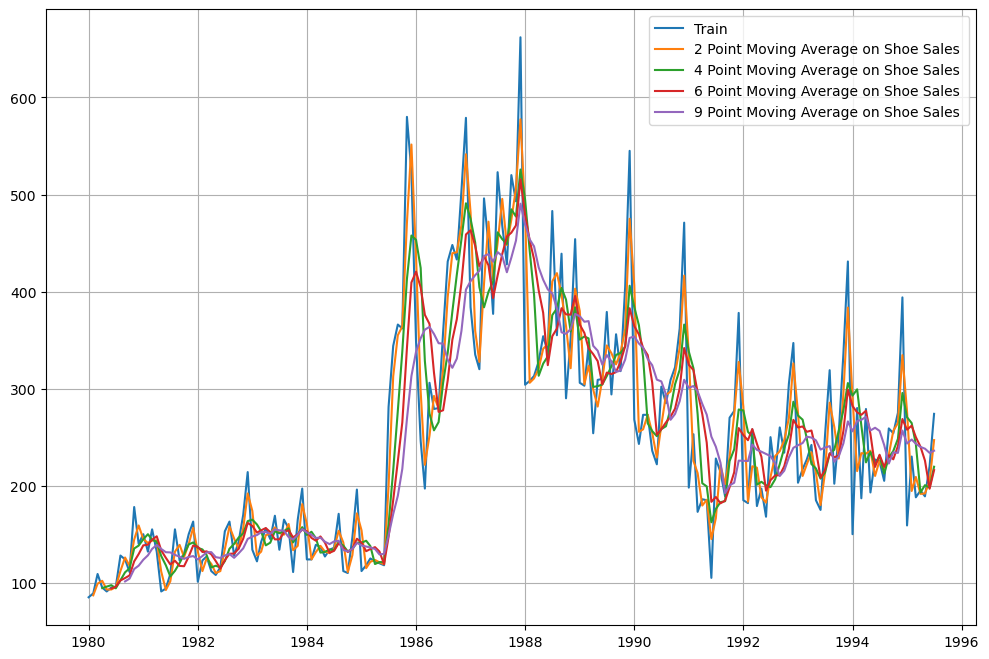

In [169]:
## Plotting on the whole data

plt.plot(MovingAverage_shoe['Shoe_Sales'], label='Train')
plt.plot(MovingAverage_shoe['Trailing_2'], label='2 Point Moving Average on Shoe Sales')
plt.plot(MovingAverage_shoe['Trailing_4'], label='4 Point Moving Average on Shoe Sales')
plt.plot(MovingAverage_shoe['Trailing_6'],label = '6 Point Moving Average on Shoe Sales')
plt.plot(MovingAverage_shoe['Trailing_9'],label = '9 Point Moving Average on Shoe Sales ')

plt.legend(loc = 'best')
plt.grid();

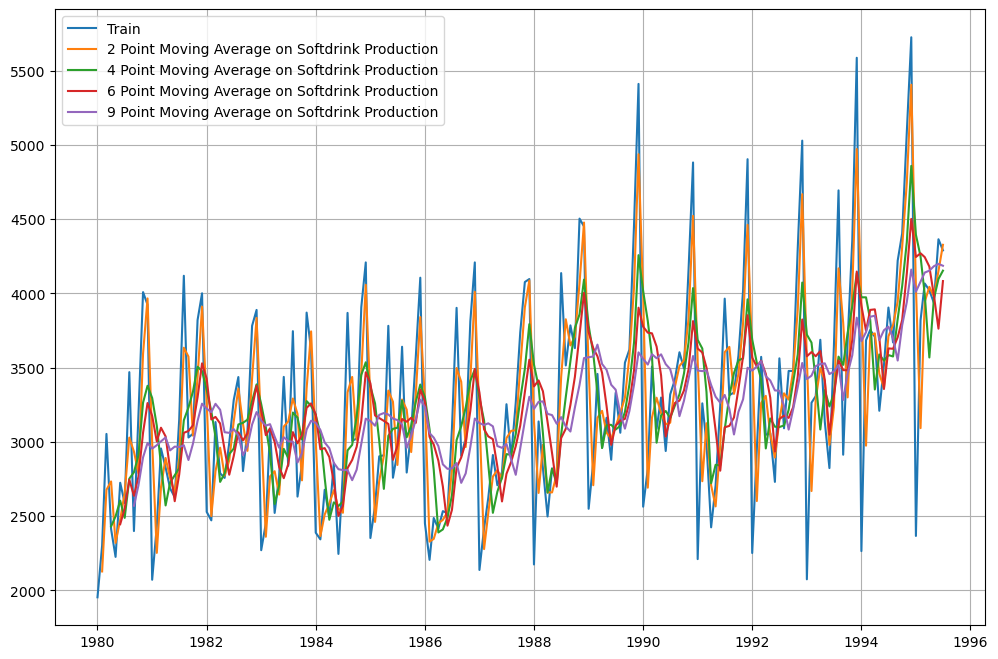

In [170]:
## Plotting on the whole data

plt.plot(MovingAverage_softdrink['SoftDrinkProduction'], label='Train')
plt.plot(MovingAverage_softdrink['Trailing_2'], label='2 Point Moving Average on Softdrink Production')
plt.plot(MovingAverage_softdrink['Trailing_4'], label='4 Point Moving Average on Softdrink Production')
plt.plot(MovingAverage_softdrink['Trailing_6'],label = '6 Point Moving Average on Softdrink Production')
plt.plot(MovingAverage_softdrink['Trailing_9'],label = '9 Point Moving Average on Softdrink Production')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [171]:
#Creating train and test set 
trailing_MovingAverage_shoe_train=MovingAverage_shoe[MovingAverage_shoe.index<'1991'] 
trailing_MovingAverage_shoe_test=MovingAverage_shoe[MovingAverage_shoe.index>='1991']

In [172]:
trailing_MovingAverage_softdrink_train=MovingAverage_softdrink[MovingAverage_softdrink.index<'1991'] 
trailing_MovingAverage_softdrink_test=MovingAverage_softdrink[MovingAverage_softdrink.index>='1991']

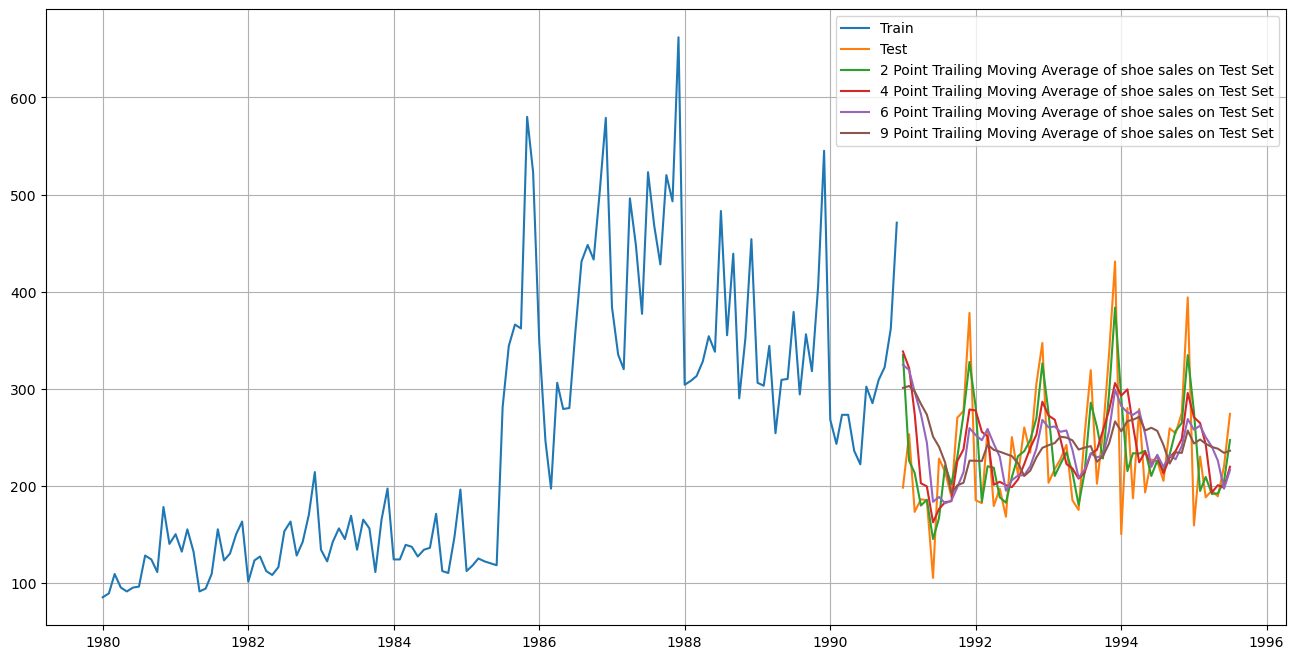

In [173]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_shoe_train['Shoe_Sales'], label='Train')
plt.plot(trailing_MovingAverage_shoe_test['Shoe_Sales'], label='Test')


plt.plot(trailing_MovingAverage_shoe_test['Trailing_2'], label='2 Point Trailing Moving Average of shoe sales on Test Set')
plt.plot(trailing_MovingAverage_shoe_test['Trailing_4'], label='4 Point Trailing Moving Average of shoe sales on Test Set')
plt.plot(trailing_MovingAverage_shoe_test['Trailing_6'],label = '6 Point Trailing Moving Average of shoe sales on Test Set')
plt.plot(trailing_MovingAverage_shoe_test['Trailing_9'],label = '9 Point Trailing Moving Average of shoe sales on Test Set')

plt.legend(loc = 'best')
plt.grid();

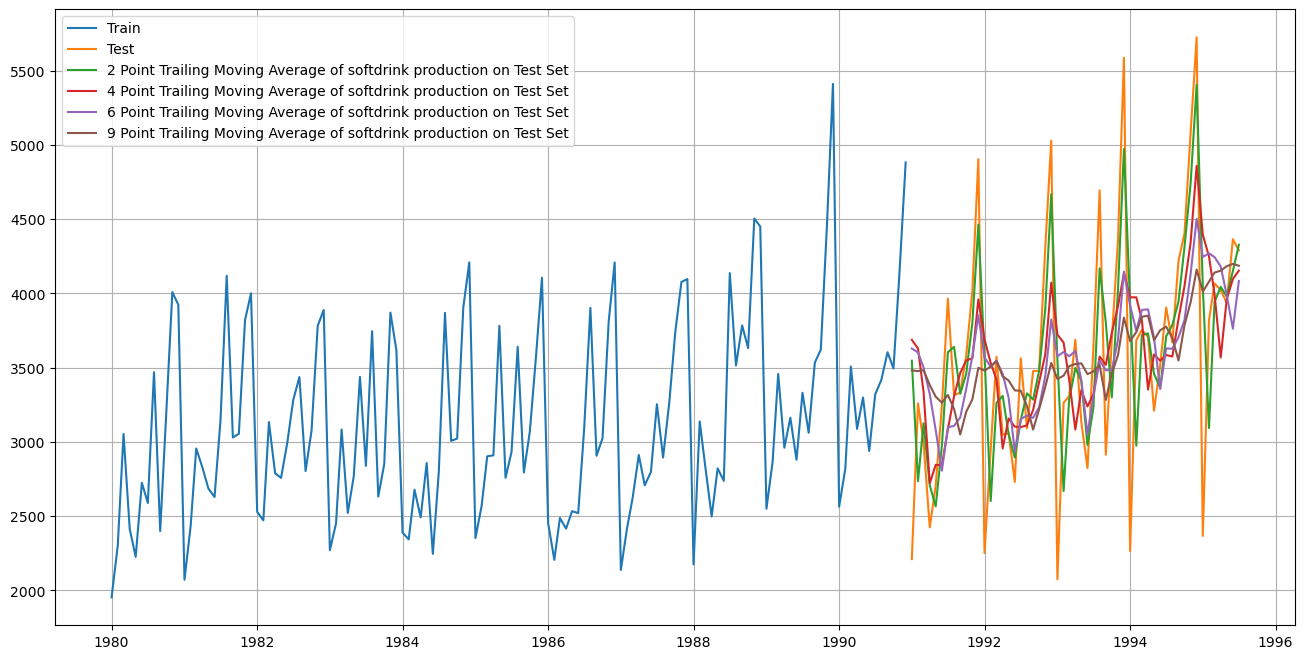

In [174]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_softdrink_train['SoftDrinkProduction'], label='Train')
plt.plot(trailing_MovingAverage_softdrink_test['SoftDrinkProduction'], label='Test')


plt.plot(trailing_MovingAverage_softdrink_test['Trailing_2'], label='2 Point Trailing Moving Average of softdrink production on Test Set')
plt.plot(trailing_MovingAverage_softdrink_test['Trailing_4'], label='4 Point Trailing Moving Average of softdrink production on Test Set')
plt.plot(trailing_MovingAverage_softdrink_test['Trailing_6'],label = '6 Point Trailing Moving Average of softdrink production on Test Set')
plt.plot(trailing_MovingAverage_softdrink_test['Trailing_9'],label = '9 Point Trailing Moving Average of softdrink production on Test Set')

plt.legend(loc = 'best')
plt.grid();

Model Evaluation
Done only on the test data.

In [175]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model5_test_2_shoe = metrics.mean_squared_error(test_shoe['Shoe_Sales'],trailing_MovingAverage_shoe_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model5_test_2_shoe))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model5_test_4_shoe = metrics.mean_squared_error(test_shoe['Shoe_Sales'],trailing_MovingAverage_shoe_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model5_test_4_shoe))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model5_test_6_shoe = metrics.mean_squared_error(test_shoe['Shoe_Sales'],trailing_MovingAverage_shoe_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model5_test_6_shoe))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model5_test_9_shoe = metrics.mean_squared_error(test_shoe['Shoe_Sales'],trailing_MovingAverage_shoe_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model5_test_9_shoe))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 45.949
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 57.873
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 63.457
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 67.724


In [176]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model5_test_2_softdrink = metrics.mean_squared_error(test_softdrink['SoftDrinkProduction'],trailing_MovingAverage_softdrink_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model5_test_2_softdrink))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model5_test_4_softdrink = metrics.mean_squared_error(test_softdrink['SoftDrinkProduction'],trailing_MovingAverage_softdrink_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model5_test_4_softdrink))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model5_test_6_softdrink = metrics.mean_squared_error(test_softdrink['SoftDrinkProduction'],trailing_MovingAverage_softdrink_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model5_test_6_softdrink))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model5_test_9_softdrink = metrics.mean_squared_error(test_softdrink['SoftDrinkProduction'],trailing_MovingAverage_softdrink_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model5_test_9_softdrink))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 556.725
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 687.182
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 710.514
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 735.890


In [177]:
resultsDf7 = pd.DataFrame({'Test RMSE': [rmse_model5_test_2_shoe,rmse_model5_test_4_shoe
                                          ,rmse_model5_test_6_shoe,rmse_model5_test_9_shoe,
                                         rmse_model5_test_2_softdrink,rmse_model5_test_4_softdrink,
                                         rmse_model5_test_6_softdrink,rmse_model5_test_9_softdrink]}
                           ,index=['2pointTrailingMovingAverage of Shoe Sales','4pointTrailingMovingAverage of Shoe Sales'
                                   ,'6pointTrailingMovingAverage of Shoe Sales','9pointTrailingMovingAverage of Shoe Sales'
                                  ,'2pointTrailingMovingAverage of Softdrink production','4pointTrailingMovingAverage of Softdrink production'
                                  ,'6pointTrailingMovingAverage of Softdrink production','9pointTrailingMovingAverage of Softdrink production'])

resultsDf = pd.concat([resultsDf, resultsDf7])
resultsDf

Test RMSE
Alpha=0.60,SES on Shoe Sales                         196.404836
Alpha=0.11,SES on Softdrink Production               809.501640
Alpha=0.11,Beta = 0.0002,DES on Shoe Sales           266.161208
Alpha=0.59,Beta = 0.107,DES on Softdrink Produc...  1074.329153
Alpha=0.57,Beta = 0.0001,Gamma = 0.29,TES with ...   128.992526
Alpha=0.14,Beta = 0.039,Gamma = 0.26,TES with A...   458.965392
Alpha=0.57,Beta = 0.0001,Gamma = 0.20,TES with ...    83.734048
Alpha=0.11,Beta = 0.049,Gamma = 0.23,TES with M...   447.722581
RegressionOnTime for Shoe Sales                      266.276472
RegressionOnTime for Softdrink production           3202.844447
NaiveModel on Shoe Sales                             245.121306
NaiveModel on Softdrink production                  1519.259233
Simple Average on Shoe Sales                          63.984570
Simple Average on Softdrink Production               934.353358
2pointTrailingMovingAverage of Shoe Sales             45.948736
4pointTrailingMovingAverage of Shoe Sales             57.872686
6pointTrailingMovingAverage of Shoe Sales             63.456893
9pointTrailingMovingAverage of Shoe Sales             67.723648
2pointTrailingMovingAverage of Softdrink produc...   556.725418
4pointTrailingMovingAverage of Softdrink produc...   687.181726
6pointTrailingMovingAverage of Softdrink produc...   710.513877
9pointTrailingMovingAverage of Softdrink produc...   735.889827

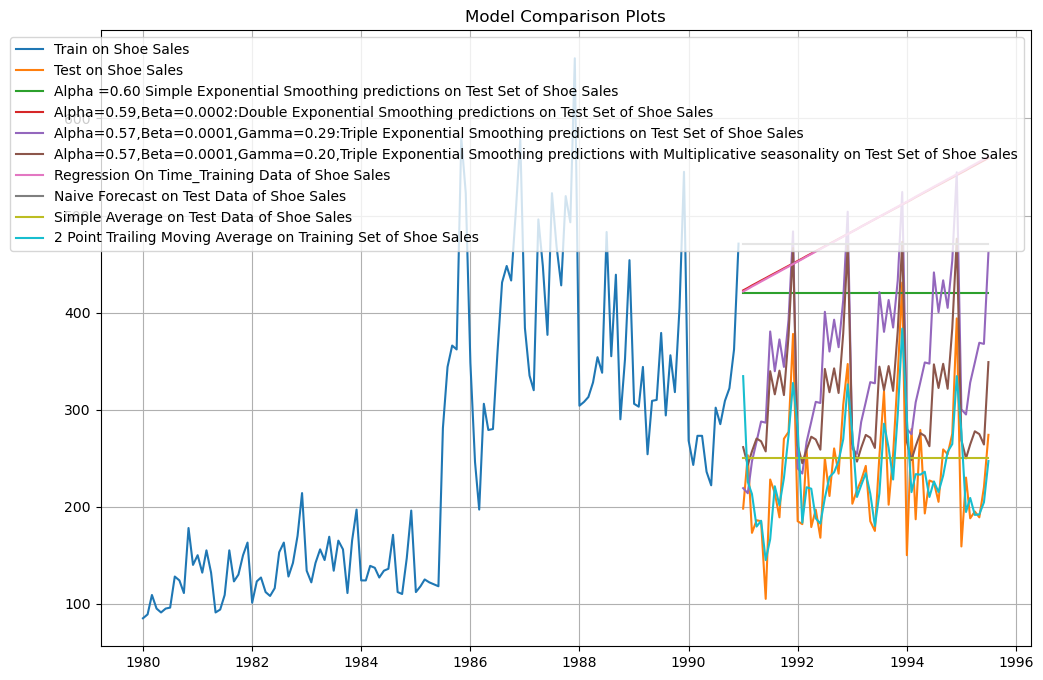

In [178]:
## Plotting on both Training and Test data

plt.plot(train_shoe['Shoe_Sales'], label='Train on Shoe Sales')
plt.plot(test_shoe['Shoe_Sales'], label='Test on Shoe Sales')

plt.plot(SES_predict_shoe, label='Alpha =0.60 Simple Exponential Smoothing predictions on Test Set of Shoe Sales')
plt.plot(DES_predict_shoe, label='Alpha=0.59,Beta=0.0002:Double Exponential Smoothing predictions on Test Set of Shoe Sales')
plt.plot(TES_predict_shoe, label='Alpha=0.57,Beta=0.0001,Gamma=0.29:Triple Exponential Smoothing predictions on Test Set of Shoe Sales')
plt.plot(TES_predict_am_shoe, label='Alpha=0.57,Beta=0.0001,Gamma=0.20,Triple Exponential Smoothing predictions with Multiplicative seasonality on Test Set of Shoe Sales')

plt.plot(LinearRegression_test_shoe['RegOnTime'], label='Regression On Time_Training Data of Shoe Sales')

plt.plot(NaiveModel_test_shoe['naive'], label='Naive Forecast on Test Data of Shoe Sales')

plt.plot(SimpleAverage_test_shoe['mean_forecast'], label='Simple Average on Test Data of Shoe Sales')

plt.plot(trailing_MovingAverage_shoe_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set of Shoe Sales')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

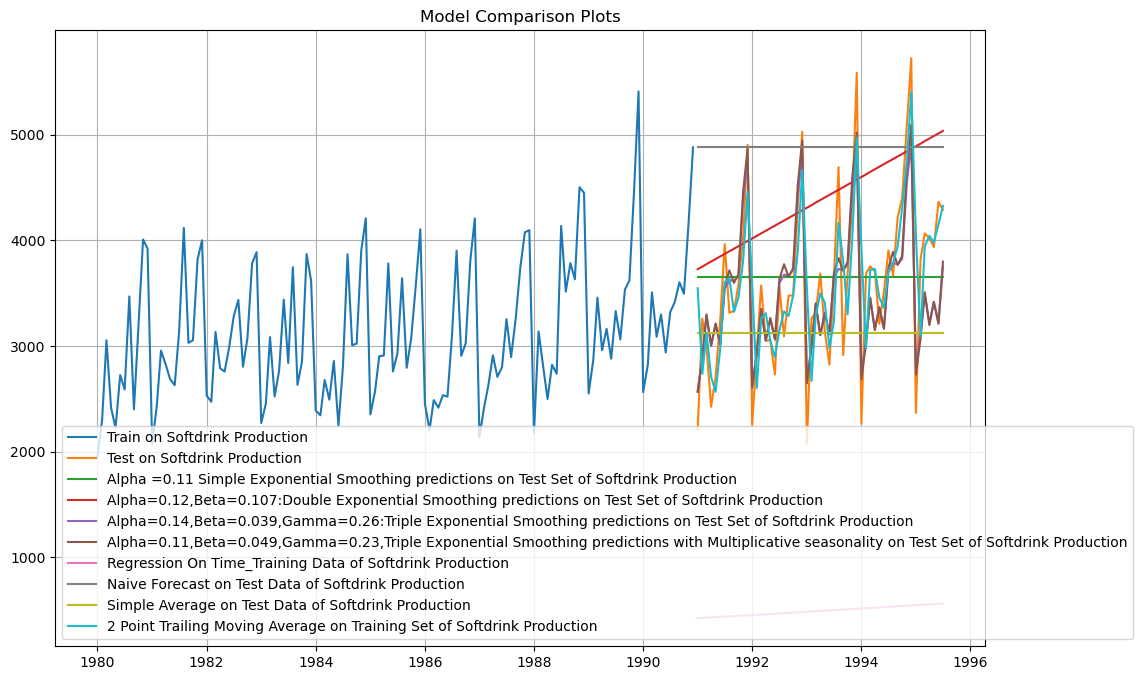

In [179]:
## Plotting on both Training and Test data

plt.plot(train_softdrink['SoftDrinkProduction'], label='Train on Softdrink Production')
plt.plot(test_softdrink['SoftDrinkProduction'], label='Test on Softdrink Production')

plt.plot(SES_predict_softdrink, label='Alpha =0.11 Simple Exponential Smoothing predictions on Test Set of Softdrink Production')
plt.plot(DES_predict_softdrink, label='Alpha=0.12,Beta=0.107:Double Exponential Smoothing predictions on Test Set of Softdrink Production')
plt.plot(TES_predict_softdrink, label='Alpha=0.14,Beta=0.039,Gamma=0.26:Triple Exponential Smoothing predictions on Test Set of Softdrink Production')
plt.plot(TES_predict_am_softdrink, label='Alpha=0.11,Beta=0.049,Gamma=0.23,Triple Exponential Smoothing predictions with Multiplicative seasonality on Test Set of Softdrink Production')

plt.plot(LinearRegression_test_softdrink['RegOnTime'], label='Regression On Time_Training Data of Softdrink Production')

plt.plot(NaiveModel_test_softdrink['naive'], label='Naive Forecast on Test Data of Softdrink Production')

plt.plot(SimpleAverage_test_softdrink['mean_forecast'], label='Simple Average on Test Data of Softdrink Production')

plt.plot(trailing_MovingAverage_softdrink_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set of Softdrink Production')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

# Q5) Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.

# Note: Stationarity should be checked at alpha = 0.05.


In [180]:
from statsmodels.tsa.stattools import adfuller

In [181]:
dftest_shoe_sales = adfuller(df_shoe_sales,regression='ct')
print('DF test statistic is %3.3f' %dftest_shoe_sales[0])
print('DF test p-value is' ,dftest_shoe_sales[1])
print('Number of lags used' ,dftest_shoe_sales[2])

DF test statistic is -1.577
DF test p-value is 0.8014186234536556
Number of lags used 13


In [182]:
dftest_shoe_sales = adfuller(df_shoe_sales.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest_shoe_sales[0])
print('DF test p-value is' ,dftest_shoe_sales[1])
print('Number of lags used' ,dftest_shoe_sales[2])

DF test statistic is -3.532
DF test p-value is 0.03611703400136044
Number of lags used 12


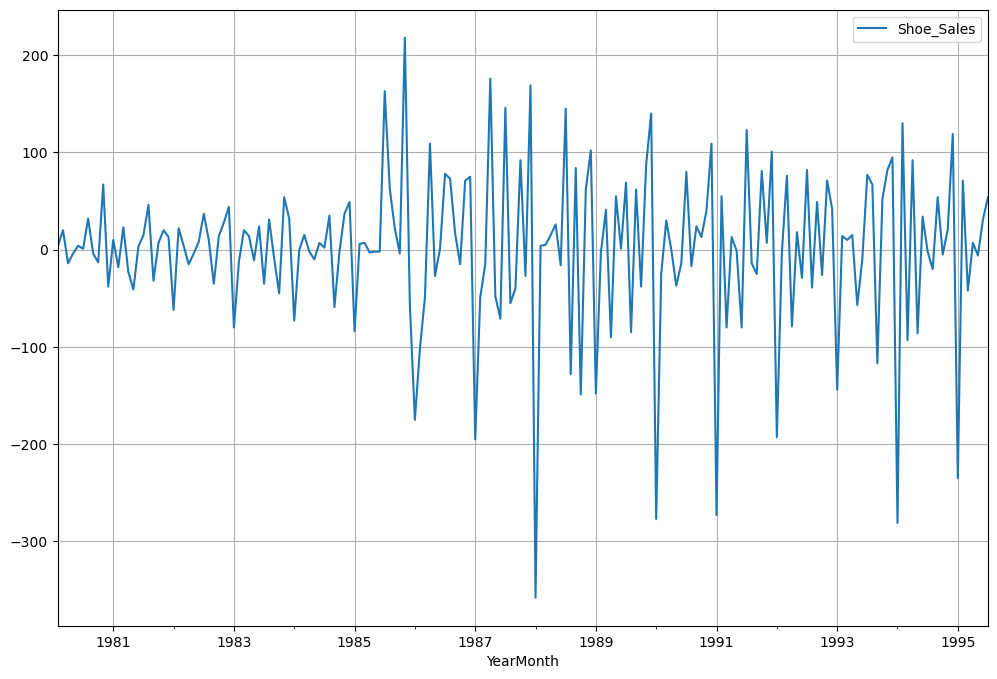

In [183]:
df_shoe_sales.diff().dropna().plot(grid=True);

In [184]:
dftest_softdrink = adfuller(df_softdrink,regression='ct')
print('DF test statistic is %3.3f' %dftest_softdrink[0])
print('DF test p-value is' ,dftest_softdrink[1])
print('Number of lags used' ,dftest_softdrink[2])

DF test statistic is -0.425
DF test p-value is 0.9861019765758294
Number of lags used 12


In [185]:
dftest_softdrink = adfuller(df_softdrink.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest_softdrink[0])
print('DF test p-value is' ,dftest_softdrink[1])
print('Number of lags used' ,dftest_softdrink[2])

DF test statistic is -9.481
DF test p-value is 3.0537092925354833e-14
Number of lags used 11


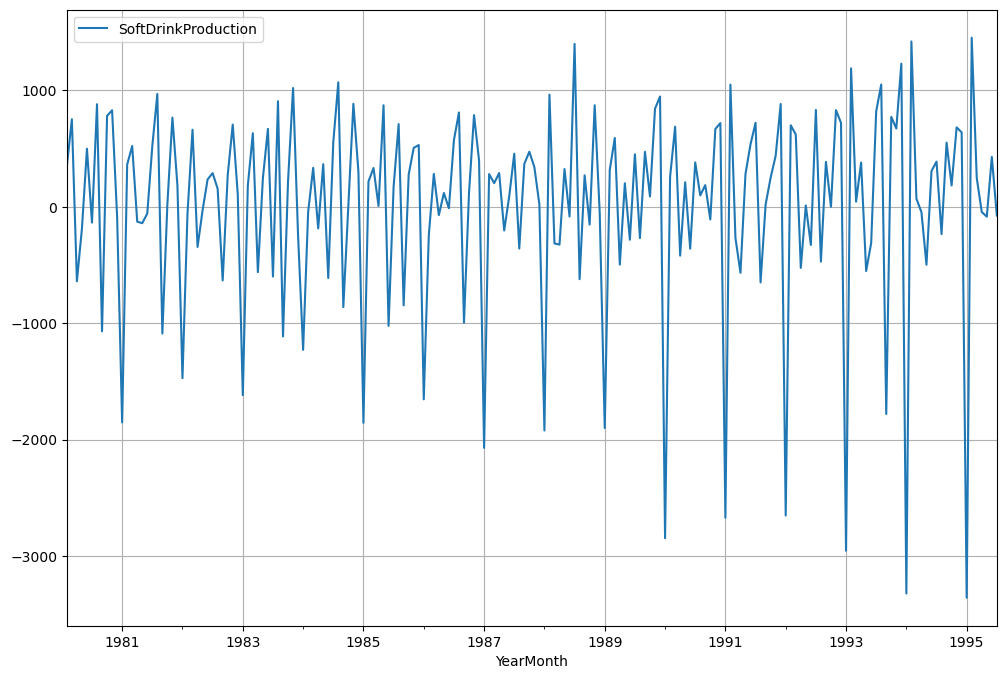

In [186]:
df_softdrink.diff().dropna().plot(grid=True);

# Q6) Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

Let us look at the ACF and PACF plot once more to understand the seasonal parameter for the SARIMA model.

Check the ACF and PACF of the training data

In [187]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

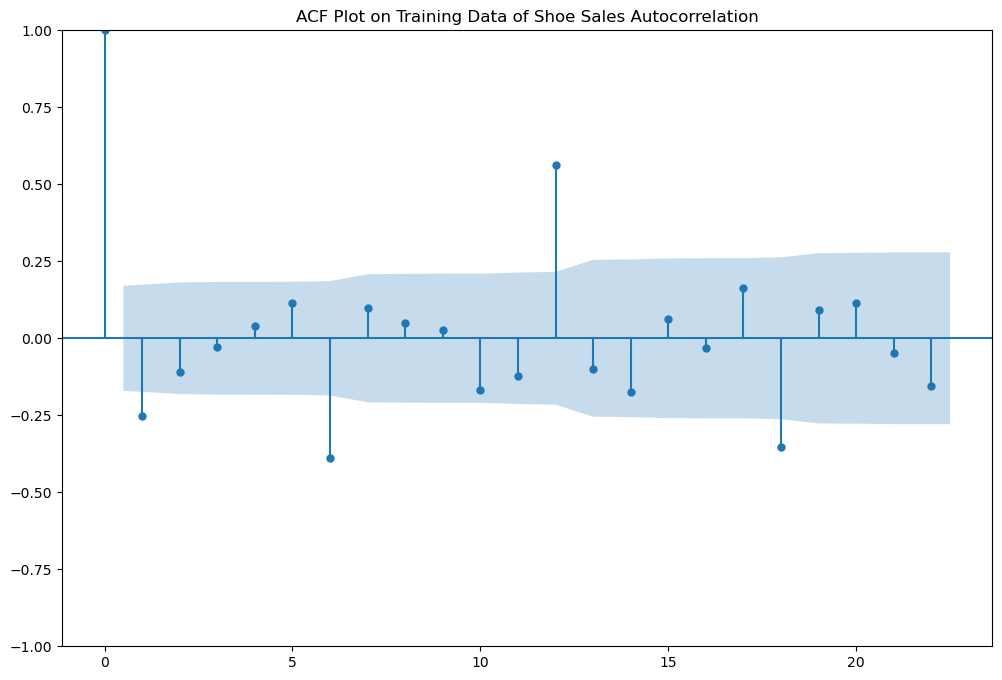

In [188]:
plot_acf(train_shoe.diff(),title='ACF Plot on Training Data of Shoe Sales Autocorrelation',missing='drop');

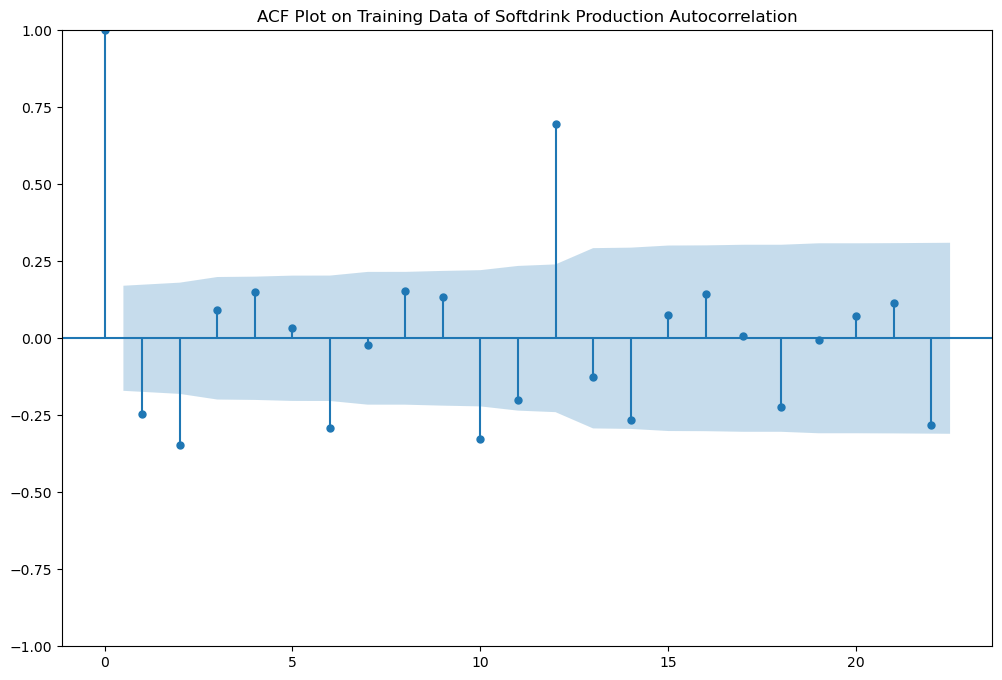

In [189]:
plot_acf(train_softdrink.diff(),title='ACF Plot on Training Data of Softdrink Production Autocorrelation',missing='drop');

C:\Users\priya\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


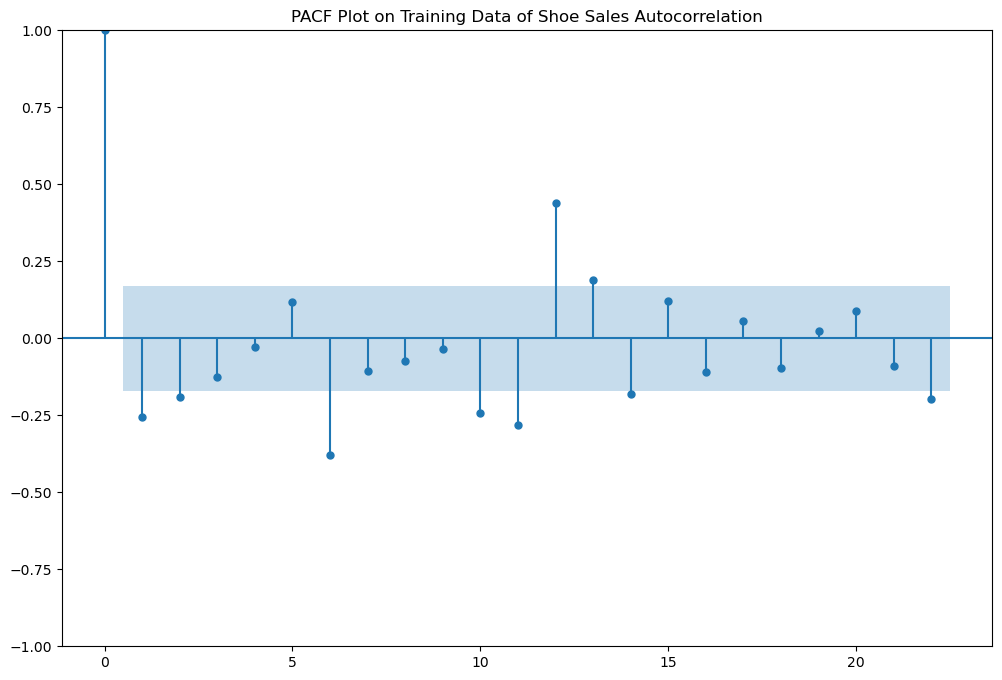

In [190]:
plot_pacf(train_shoe.diff().dropna(),title='PACF Plot on Training Data of Shoe Sales Autocorrelation');

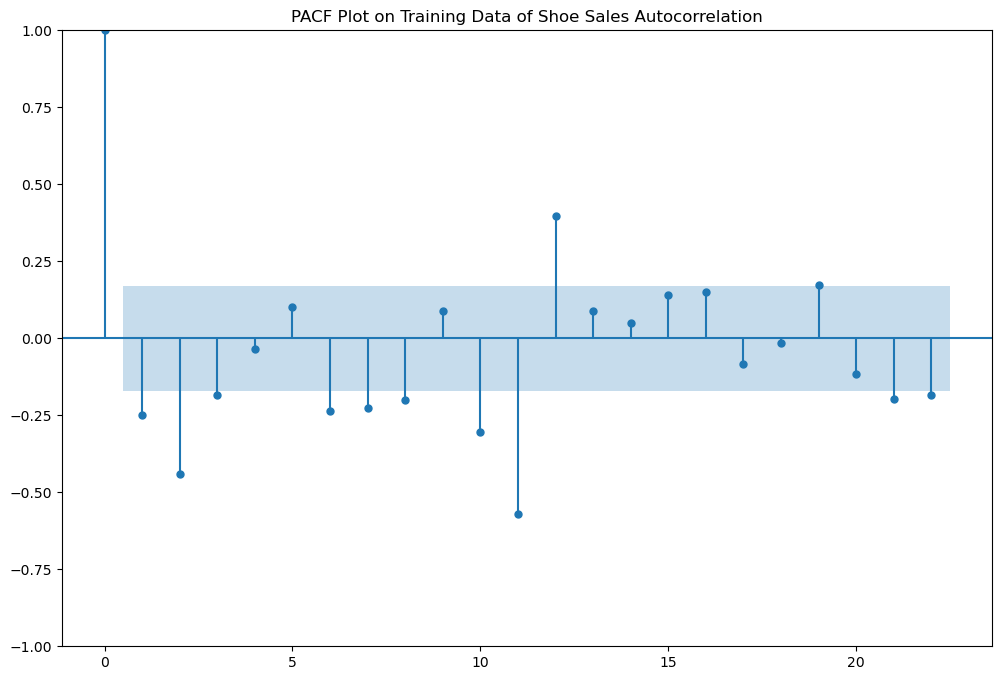

In [191]:
plot_pacf(train_softdrink.diff().dropna(),title='PACF Plot on Training Data of Shoe Sales Autocorrelation');

In [192]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [193]:
# Creating an empty Dataframe with column names only
ARIMA_AIC_shoe = pd.DataFrame(columns=['shoe_param', 'AIC'])
ARIMA_AIC_shoe

Empty DataFrame
Columns: [shoe_param, AIC]
Index: []

In [194]:
# Creating an empty Dataframe with column names only
ARIMA_AIC_softdrink = pd.DataFrame(columns=['softdrink_param', 'AIC'])
ARIMA_AIC_softdrink

Empty DataFrame
Columns: [softdrink_param, AIC]
Index: []

In [195]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model_shoe = ARIMA(train_shoe['Shoe_Sales'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model_shoe.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC_shoe = ARIMA_AIC_shoe.append({'shoe_param':param, 'AIC': ARIMA_model_shoe.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1508.2837722095956
ARIMA(0, 1, 1) - AIC:1497.0503224187928
ARIMA(0, 1, 2) - AIC:1494.9646053663419


C:\Users\priya\AppData\Local\Temp\ipykernel_9048\409129087.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_shoe = ARIMA_AIC_shoe.append({'shoe_param':param, 'AIC': ARIMA_model_shoe.aic}, ignore_index=True)
C:\Users\priya\AppData\Local\Temp\ipykernel_9048\409129087.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_shoe = ARIMA_AIC_shoe.append({'shoe_param':param, 'AIC': ARIMA_model_shoe.aic}, ignore_index=True)
C:\Users\priya\AppData\Local\Temp\ipykernel_9048\409129087.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_shoe = ARIMA_AIC_shoe.append({'shoe_param':param, 'AIC': ARIMA_model_shoe.aic}, ignore_index=True)


ARIMA(0, 1, 3) - AIC:1495.1484738738811
ARIMA(1, 1, 0) - AIC:1501.64312420119
ARIMA(1, 1, 1) - AIC:1492.4871865078987


C:\Users\priya\AppData\Local\Temp\ipykernel_9048\409129087.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_shoe = ARIMA_AIC_shoe.append({'shoe_param':param, 'AIC': ARIMA_model_shoe.aic}, ignore_index=True)
C:\Users\priya\AppData\Local\Temp\ipykernel_9048\409129087.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_shoe = ARIMA_AIC_shoe.append({'shoe_param':param, 'AIC': ARIMA_model_shoe.aic}, ignore_index=True)
C:\Users\priya\AppData\Local\Temp\ipykernel_9048\409129087.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_shoe = ARIMA_AIC_shoe.append({'shoe_param':param, 'AIC': ARIMA_model_shoe.aic}, ignore_index=True)


ARIMA(1, 1, 2) - AIC:1494.423859457674


C:\Users\priya\AppData\Local\Temp\ipykernel_9048\409129087.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_shoe = ARIMA_AIC_shoe.append({'shoe_param':param, 'AIC': ARIMA_model_shoe.aic}, ignore_index=True)


ARIMA(1, 1, 3) - AIC:1496.3858782558214
ARIMA(2, 1, 0) - AIC:1498.9504830259416


C:\Users\priya\AppData\Local\Temp\ipykernel_9048\409129087.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_shoe = ARIMA_AIC_shoe.append({'shoe_param':param, 'AIC': ARIMA_model_shoe.aic}, ignore_index=True)
C:\Users\priya\AppData\Local\Temp\ipykernel_9048\409129087.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_shoe = ARIMA_AIC_shoe.append({'shoe_param':param, 'AIC': ARIMA_model_shoe.aic}, ignore_index=True)


ARIMA(2, 1, 1) - AIC:1494.431498303531


C:\Users\priya\AppData\Local\Temp\ipykernel_9048\409129087.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_shoe = ARIMA_AIC_shoe.append({'shoe_param':param, 'AIC': ARIMA_model_shoe.aic}, ignore_index=True)


ARIMA(2, 1, 2) - AIC:1496.4107391772498


C:\Users\priya\AppData\Local\Temp\ipykernel_9048\409129087.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_shoe = ARIMA_AIC_shoe.append({'shoe_param':param, 'AIC': ARIMA_model_shoe.aic}, ignore_index=True)
C:\Users\priya\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\priya\AppData\Local\Temp\ipykernel_9048\409129087.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_shoe = ARIMA_AIC_shoe.append({'shoe_param':param, 'AIC': ARIMA_model_shoe.aic}, ignore_index=True)
C:\Users\priya\AppData\Local\Temp\ipykernel_9048\409129087.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fu

ARIMA(2, 1, 3) - AIC:1482.725695516334
ARIMA(3, 1, 0) - AIC:1498.9303094228535
ARIMA(3, 1, 1) - AIC:1496.3468641048835


C:\Users\priya\AppData\Local\Temp\ipykernel_9048\409129087.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_shoe = ARIMA_AIC_shoe.append({'shoe_param':param, 'AIC': ARIMA_model_shoe.aic}, ignore_index=True)
C:\Users\priya\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\priya\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 2) - AIC:1495.6558545467901


C:\Users\priya\AppData\Local\Temp\ipykernel_9048\409129087.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_shoe = ARIMA_AIC_shoe.append({'shoe_param':param, 'AIC': ARIMA_model_shoe.aic}, ignore_index=True)


ARIMA(3, 1, 3) - AIC:1482.5670080729235


C:\Users\priya\AppData\Local\Temp\ipykernel_9048\409129087.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_shoe = ARIMA_AIC_shoe.append({'shoe_param':param, 'AIC': ARIMA_model_shoe.aic}, ignore_index=True)


In [196]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC_shoe.sort_values(by='AIC',ascending=True).head()

shoe_param          AIC
15  (3, 1, 3)  1482.567008
11  (2, 1, 3)  1482.725696
5   (1, 1, 1)  1492.487187
6   (1, 1, 2)  1494.423859
9   (2, 1, 1)  1494.431498

In [197]:
for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model_softdrink = ARIMA(train_softdrink['SoftDrinkProduction'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model_softdrink.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC_softdrink = ARIMA_AIC_softdrink.append({'softdrink_param':param, 'AIC': ARIMA_model_softdrink.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:2103.7338336875
ARIMA(0, 1, 1) - AIC:2069.5996302114518


C:\Users\priya\AppData\Local\Temp\ipykernel_9048\4080819759.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_softdrink = ARIMA_AIC_softdrink.append({'softdrink_param':param, 'AIC': ARIMA_model_softdrink.aic}, ignore_index=True)
C:\Users\priya\AppData\Local\Temp\ipykernel_9048\4080819759.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_softdrink = ARIMA_AIC_softdrink.append({'softdrink_param':param, 'AIC': ARIMA_model_softdrink.aic}, ignore_index=True)


ARIMA(0, 1, 2) - AIC:2056.4892632434876
ARIMA(0, 1, 3) - AIC:2056.831789419003


C:\Users\priya\AppData\Local\Temp\ipykernel_9048\4080819759.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_softdrink = ARIMA_AIC_softdrink.append({'softdrink_param':param, 'AIC': ARIMA_model_softdrink.aic}, ignore_index=True)
C:\Users\priya\AppData\Local\Temp\ipykernel_9048\4080819759.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_softdrink = ARIMA_AIC_softdrink.append({'softdrink_param':param, 'AIC': ARIMA_model_softdrink.aic}, ignore_index=True)


ARIMA(1, 1, 0) - AIC:2097.8721216490417
ARIMA(1, 1, 1) - AIC:2061.523083934958


C:\Users\priya\AppData\Local\Temp\ipykernel_9048\4080819759.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_softdrink = ARIMA_AIC_softdrink.append({'softdrink_param':param, 'AIC': ARIMA_model_softdrink.aic}, ignore_index=True)
C:\Users\priya\AppData\Local\Temp\ipykernel_9048\4080819759.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_softdrink = ARIMA_AIC_softdrink.append({'softdrink_param':param, 'AIC': ARIMA_model_softdrink.aic}, ignore_index=True)


ARIMA(1, 1, 2) - AIC:2056.715682068915


C:\Users\priya\AppData\Local\Temp\ipykernel_9048\4080819759.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_softdrink = ARIMA_AIC_softdrink.append({'softdrink_param':param, 'AIC': ARIMA_model_softdrink.aic}, ignore_index=True)


ARIMA(1, 1, 3) - AIC:2058.712159036542
ARIMA(2, 1, 0) - AIC:2073.234860536023


C:\Users\priya\AppData\Local\Temp\ipykernel_9048\4080819759.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_softdrink = ARIMA_AIC_softdrink.append({'softdrink_param':param, 'AIC': ARIMA_model_softdrink.aic}, ignore_index=True)
C:\Users\priya\AppData\Local\Temp\ipykernel_9048\4080819759.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_softdrink = ARIMA_AIC_softdrink.append({'softdrink_param':param, 'AIC': ARIMA_model_softdrink.aic}, ignore_index=True)


ARIMA(2, 1, 1) - AIC:2059.100671813575


C:\Users\priya\AppData\Local\Temp\ipykernel_9048\4080819759.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_softdrink = ARIMA_AIC_softdrink.append({'softdrink_param':param, 'AIC': ARIMA_model_softdrink.aic}, ignore_index=True)


ARIMA(2, 1, 2) - AIC:2058.7127020994744


C:\Users\priya\AppData\Local\Temp\ipykernel_9048\4080819759.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_softdrink = ARIMA_AIC_softdrink.append({'softdrink_param':param, 'AIC': ARIMA_model_softdrink.aic}, ignore_index=True)
C:\Users\priya\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\priya\AppData\Local\Temp\ipykernel_9048\4080819759.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_softdrink = ARIMA_AIC_softdrink.append({'softdrink_param':param, 'AIC': ARIMA_model_softdrink.aic}, ignore_index=True)
C:\Users\priya\AppData\Local\Temp\ipykernel_9048\4080819759.py:6: FutureWarning: The frame.append method is depreca

ARIMA(2, 1, 3) - AIC:2057.09085107644
ARIMA(3, 1, 0) - AIC:2070.3653671411857
ARIMA(3, 1, 1) - AIC:2058.304546024676


C:\Users\priya\AppData\Local\Temp\ipykernel_9048\4080819759.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_softdrink = ARIMA_AIC_softdrink.append({'softdrink_param':param, 'AIC': ARIMA_model_softdrink.aic}, ignore_index=True)


ARIMA(3, 1, 2) - AIC:2060.6799656998037


C:\Users\priya\AppData\Local\Temp\ipykernel_9048\4080819759.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_softdrink = ARIMA_AIC_softdrink.append({'softdrink_param':param, 'AIC': ARIMA_model_softdrink.aic}, ignore_index=True)


ARIMA(3, 1, 3) - AIC:2059.606776042402


C:\Users\priya\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\priya\AppData\Local\Temp\ipykernel_9048\4080819759.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_softdrink = ARIMA_AIC_softdrink.append({'softdrink_param':param, 'AIC': ARIMA_model_softdrink.aic}, ignore_index=True)


In [198]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC_softdrink.sort_values(by='AIC',ascending=True).head()

softdrink_param          AIC
2        (0, 1, 2)  2056.489263
6        (1, 1, 2)  2056.715682
3        (0, 1, 3)  2056.831789
11       (2, 1, 3)  2057.090851
13       (3, 1, 1)  2058.304546

In [200]:
auto_ARIMA_shoe = ARIMA(train_shoe, order=(3,1,3))

results_auto_ARIMA_shoe = auto_ARIMA_shoe.fit()

print(results_auto_ARIMA_shoe.summary())

C:\Users\priya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\priya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\priya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Shoe_Sales   No. Observations:                  132
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -734.284
Date:                Thu, 04 Jan 2024   AIC                           1482.567
Time:                        09:51:15   BIC                           1502.693
Sample:                    01-01-1980   HQIC                          1490.745
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4946      0.143      3.465      0.001       0.215       0.774
ar.L2         -0.9944      0.029    -33.990      0.000      -1.052      -0.937
ar.L3          0.5018      0.125      4.009      0.0

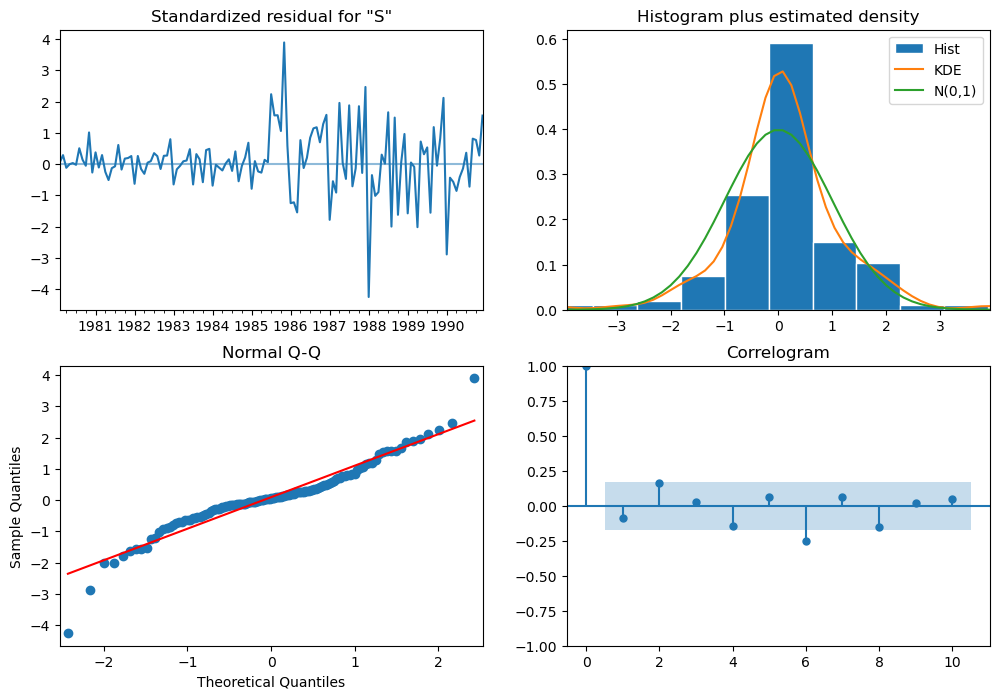

In [201]:
results_auto_ARIMA_shoe.plot_diagnostics();

In [202]:
auto_ARIMA_softdrink = ARIMA(train_softdrink, order=(3,1,3))

results_auto_ARIMA_softdrink = auto_ARIMA_softdrink.fit()

print(results_auto_ARIMA_softdrink.summary())

C:\Users\priya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\priya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\priya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                SARIMAX Results                                
Dep. Variable:     SoftDrinkProduction   No. Observations:                  132
Model:                  ARIMA(3, 1, 3)   Log Likelihood               -1022.803
Date:                 Thu, 04 Jan 2024   AIC                           2059.607
Time:                         09:53:31   BIC                           2079.733
Sample:                     01-01-1980   HQIC                          2067.785
                          - 12-01-1990                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6768      0.330      2.051      0.040       0.030       1.324
ar.L2          0.2814      0.464      0.606      0.545      -0.629       1.192
ar.L3         -0.0665      0.194     -0.343 

C:\Users\priya\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


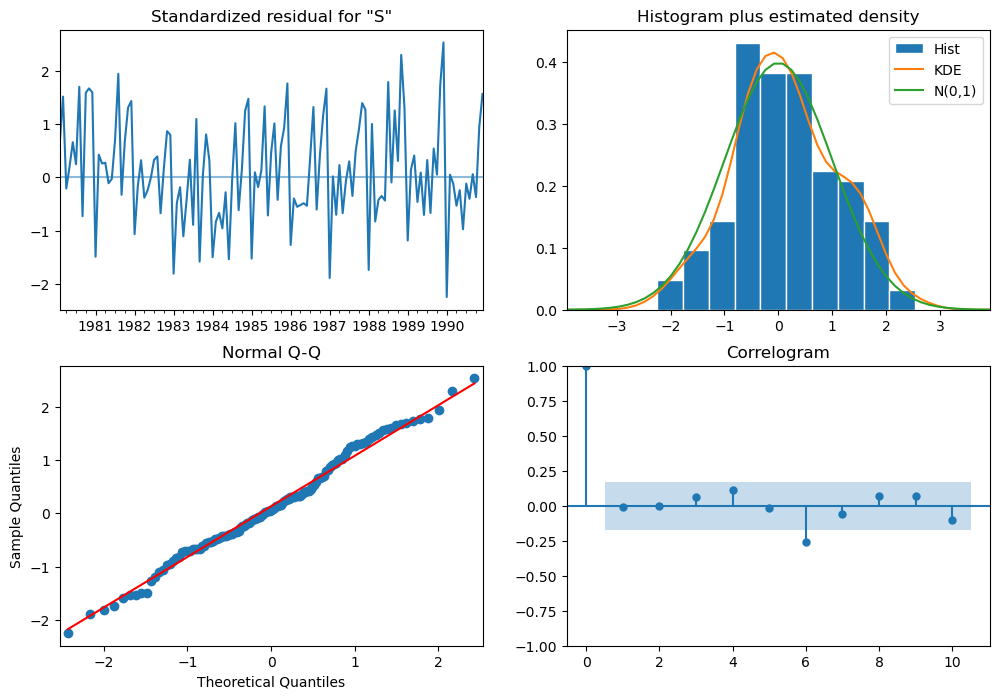

In [203]:
results_auto_ARIMA_softdrink.plot_diagnostics();